In [12]:
import warnings
import pandas as pd
from tqdm.notebook import tqdm
from pathlib import Path
import logging
import pickle
import numpy as np

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

# %cd Nature

# Download data

In [3]:
meta_df = pd.read_csv('m1_patchseq_meta_data.csv', delimiter='\t')
meta_df.head()

,Number,Cell,Slice,Date,Sample,Mouse,Mouse date of birth,Mouse age,Mouse gender,Mouse genotype,...,Length (bp),Yield (pg/µl),User,Hold Time (min),Soma depth (µm),Soma depth (4x),Cortical thickness (4x),Cortical thickness (µm),Traced,Exclusion reasons
0,1,20171204_sample_2,20171204_slice_2,2017-12-04,sample 2,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,1955,95.19,Fede,8.0,736.7,271.0,535.8,1478.808,y,NaN
1,2,20171204_sample_4,20171204_slice_4,2017-12-04,sample 4,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,1887,80.22,Fede,9.0,726.2,285.7,545.9,1506.684,y,NaN
2,3,20171204_sample_5,20171204_slice_5,2017-12-04,sample 5,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,1869,439.16,Fede,8.0,659.8,241.8,530.4,1463.904,y,NaN
3,4,20171204_sample_6,20171204_slice_6,2017-12-04,sample 6,mouse_GTOKH,2017-10-29,36,M,Pvalb-Cre/wt; Ai9/wt,...,1999,211.71,Fede,8.0,571.7,210.0,501.1,1383.036,y,NaN
4,5,20171207_sample_1,20171207_slice_1,2017-12-07,sample 1,mouse_UGZSW,2017-09-18,80,F,Sst-IRES-Cre/wt; Ai9/wt,...,1884,986.46,Fede,10.0,772.4,288.9,477.1,1316.796,y,NaN


In [8]:
Path('swc').mkdir(exist_ok=True)

In [4]:
def download_swc(sample_id):
    url_base = "https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/"
    swc_url = f'{url_base}{sample_id}.SWC'
    !wget {swc_url} -P swc -nc

In [18]:
for sample_id in tqdm(meta_df['Cell']):
    download_swc(sample_id)

  0%|          | 0/1329 [00:00<?, ?it/s]

--2021-07-05 17:19:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171204_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:19:49 ERROR 404: Not Found.



  0%|          | 1/1329 [00:02<44:54,  2.03s/it]

--2021-07-05 17:19:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171204_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:19:50 ERROR 404: Not Found.



  0%|          | 2/1329 [00:04<44:10,  2.00s/it]

--2021-07-05 17:19:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171204_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:19:53 ERROR 404: Not Found.



  0%|          | 3/1329 [00:06<44:35,  2.02s/it]

--2021-07-05 17:19:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171204_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:19:56 ERROR 404: Not Found.



  0%|          | 4/1329 [00:09<53:08,  2.41s/it]

--2021-07-05 17:19:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171207_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:19:58 ERROR 404: Not Found.



  0%|          | 5/1329 [00:11<50:47,  2.30s/it]

--2021-07-05 17:19:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171207_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:00 ERROR 404: Not Found.



  0%|          | 6/1329 [00:13<48:54,  2.22s/it]

--2021-07-05 17:20:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171207_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:02 ERROR 404: Not Found.



  1%|          | 7/1329 [00:15<48:22,  2.20s/it]

--2021-07-05 17:20:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171207_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:04 ERROR 404: Not Found.



  1%|          | 8/1329 [00:17<48:23,  2.20s/it]

--2021-07-05 17:20:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171219_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:06 ERROR 404: Not Found.



  1%|          | 9/1329 [00:19<48:29,  2.20s/it]

--2021-07-05 17:20:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171219_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:09 ERROR 404: Not Found.



  1%|          | 10/1329 [00:22<51:28,  2.34s/it]

--2021-07-05 17:20:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171219_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:11 ERROR 404: Not Found.



  1%|          | 11/1329 [00:24<49:59,  2.28s/it]

--2021-07-05 17:20:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171219_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:13 ERROR 404: Not Found.



  1%|          | 12/1329 [00:26<48:46,  2.22s/it]

--2021-07-05 17:20:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171219_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:15 ERROR 404: Not Found.



  1%|          | 13/1329 [00:28<47:37,  2.17s/it]

--2021-07-05 17:20:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171219_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:17 ERROR 404: Not Found.



  1%|          | 14/1329 [00:30<46:43,  2.13s/it]

--2021-07-05 17:20:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20171219_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:19 ERROR 404: Not Found.



  1%|          | 15/1329 [00:32<46:05,  2.10s/it]

--2021-07-05 17:20:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180102_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:21 ERROR 404: Not Found.



  1%|          | 16/1329 [00:34<45:29,  2.08s/it]

--2021-07-05 17:20:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180102_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:23 ERROR 404: Not Found.



  1%|▏         | 17/1329 [00:36<44:45,  2.05s/it]

--2021-07-05 17:20:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180102_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:25 ERROR 404: Not Found.



  1%|▏         | 18/1329 [00:38<44:37,  2.04s/it]

--2021-07-05 17:20:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180102_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:27 ERROR 404: Not Found.



  1%|▏         | 19/1329 [00:40<44:14,  2.03s/it]

--2021-07-05 17:20:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180102_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:29 ERROR 404: Not Found.



  2%|▏         | 20/1329 [00:42<44:01,  2.02s/it]

--2021-07-05 17:20:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:31 ERROR 404: Not Found.



  2%|▏         | 21/1329 [00:44<43:50,  2.01s/it]

--2021-07-05 17:20:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:33 ERROR 404: Not Found.



  2%|▏         | 22/1329 [00:46<43:50,  2.01s/it]

--2021-07-05 17:20:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:36 ERROR 404: Not Found.



  2%|▏         | 23/1329 [00:49<45:19,  2.08s/it]

--2021-07-05 17:20:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:38 ERROR 404: Not Found.



  2%|▏         | 24/1329 [00:51<44:44,  2.06s/it]

--2021-07-05 17:20:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:40 ERROR 404: Not Found.



  2%|▏         | 25/1329 [00:53<44:02,  2.03s/it]

--2021-07-05 17:20:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:41 ERROR 404: Not Found.



  2%|▏         | 26/1329 [00:54<43:17,  1.99s/it]

--2021-07-05 17:20:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:44 ERROR 404: Not Found.



  2%|▏         | 27/1329 [00:57<45:53,  2.11s/it]

--2021-07-05 17:20:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180103_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:46 ERROR 404: Not Found.



  2%|▏         | 28/1329 [00:59<45:23,  2.09s/it]

--2021-07-05 17:20:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180104_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:48 ERROR 404: Not Found.



  2%|▏         | 29/1329 [01:01<45:56,  2.12s/it]

--2021-07-05 17:20:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180104_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:50 ERROR 404: Not Found.



  2%|▏         | 30/1329 [01:03<46:29,  2.15s/it]

--2021-07-05 17:20:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180104_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:53 ERROR 404: Not Found.



  2%|▏         | 31/1329 [01:06<48:24,  2.24s/it]

--2021-07-05 17:20:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180104_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:55 ERROR 404: Not Found.



  2%|▏         | 32/1329 [01:08<49:49,  2.30s/it]

--2021-07-05 17:20:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180104_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:20:57 ERROR 404: Not Found.



  2%|▏         | 33/1329 [01:10<49:06,  2.27s/it]

--2021-07-05 17:20:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180105_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:00 ERROR 404: Not Found.



  3%|▎         | 34/1329 [01:13<48:15,  2.24s/it]

--2021-07-05 17:21:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180105_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:02 ERROR 404: Not Found.



  3%|▎         | 35/1329 [01:15<47:59,  2.23s/it]

--2021-07-05 17:21:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180105_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:04 ERROR 404: Not Found.



  3%|▎         | 36/1329 [01:17<48:23,  2.25s/it]

--2021-07-05 17:21:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:06 ERROR 404: Not Found.



  3%|▎         | 37/1329 [01:19<48:01,  2.23s/it]

--2021-07-05 17:21:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:08 ERROR 404: Not Found.



  3%|▎         | 38/1329 [01:21<46:32,  2.16s/it]

--2021-07-05 17:21:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:15 ERROR 404: Not Found.



  3%|▎         | 39/1329 [01:28<1:17:55,  3.62s/it]

--2021-07-05 17:21:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:17 ERROR 404: Not Found.



  3%|▎         | 40/1329 [01:30<1:07:19,  3.13s/it]

--2021-07-05 17:21:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:19 ERROR 404: Not Found.



  3%|▎         | 41/1329 [01:32<59:57,  2.79s/it]  

--2021-07-05 17:21:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:21 ERROR 404: Not Found.



  3%|▎         | 42/1329 [01:34<54:54,  2.56s/it]

--2021-07-05 17:21:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:23 ERROR 404: Not Found.



  3%|▎         | 43/1329 [01:36<51:08,  2.39s/it]

--2021-07-05 17:21:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:25 ERROR 404: Not Found.



  3%|▎         | 44/1329 [01:38<49:46,  2.32s/it]

--2021-07-05 17:21:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180108_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:28 ERROR 404: Not Found.



  3%|▎         | 45/1329 [01:41<48:40,  2.27s/it]

--2021-07-05 17:21:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180109_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:30 ERROR 404: Not Found.



  3%|▎         | 46/1329 [01:43<47:50,  2.24s/it]

--2021-07-05 17:21:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180109_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:33 ERROR 404: Not Found.



  4%|▎         | 47/1329 [01:46<51:36,  2.42s/it]

--2021-07-05 17:21:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180109_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:35 ERROR 404: Not Found.



  4%|▎         | 48/1329 [01:48<49:27,  2.32s/it]

--2021-07-05 17:21:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180110_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:54 ERROR 404: Not Found.



  4%|▎         | 49/1329 [02:07<2:40:13,  7.51s/it]

--2021-07-05 17:21:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180110_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:21:57 ERROR 404: Not Found.



  4%|▍         | 50/1329 [02:10<2:08:08,  6.01s/it]

--2021-07-05 17:21:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180110_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:00 ERROR 404: Not Found.



  4%|▍         | 51/1329 [02:13<1:49:15,  5.13s/it]

--2021-07-05 17:22:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180110_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:02 ERROR 404: Not Found.



  4%|▍         | 52/1329 [02:15<1:29:19,  4.20s/it]

--2021-07-05 17:22:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180110_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:05 ERROR 404: Not Found.



  4%|▍         | 53/1329 [02:18<1:21:36,  3.84s/it]

--2021-07-05 17:22:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180110_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:09 ERROR 404: Not Found.



  4%|▍         | 54/1329 [02:22<1:20:45,  3.80s/it]

--2021-07-05 17:22:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180110_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:11 ERROR 404: Not Found.



  4%|▍         | 55/1329 [02:24<1:09:07,  3.26s/it]

--2021-07-05 17:22:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180111_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:15 ERROR 404: Not Found.



  4%|▍         | 56/1329 [02:28<1:15:15,  3.55s/it]

--2021-07-05 17:22:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180115_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:17 ERROR 404: Not Found.



  4%|▍         | 57/1329 [02:30<1:07:25,  3.18s/it]

--2021-07-05 17:22:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180115_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:21 ERROR 404: Not Found.



  4%|▍         | 58/1329 [02:34<1:11:27,  3.37s/it]

--2021-07-05 17:22:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180115_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:24 ERROR 404: Not Found.



  4%|▍         | 59/1329 [02:37<1:06:39,  3.15s/it]

--2021-07-05 17:22:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180115_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:28 ERROR 404: Not Found.



  5%|▍         | 60/1329 [02:41<1:16:27,  3.62s/it]

--2021-07-05 17:22:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180115_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:30 ERROR 404: Not Found.



  5%|▍         | 61/1329 [02:44<1:07:33,  3.20s/it]

--2021-07-05 17:22:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180115_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:32 ERROR 404: Not Found.



  5%|▍         | 62/1329 [02:45<59:46,  2.83s/it]  

--2021-07-05 17:22:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180118_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:35 ERROR 404: Not Found.



  5%|▍         | 63/1329 [02:48<56:14,  2.67s/it]

--2021-07-05 17:22:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180118_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:37 ERROR 404: Not Found.



  5%|▍         | 64/1329 [02:50<52:09,  2.47s/it]

--2021-07-05 17:22:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180118_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:39 ERROR 404: Not Found.



  5%|▍         | 65/1329 [02:52<49:05,  2.33s/it]

--2021-07-05 17:22:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180118_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:41 ERROR 404: Not Found.



  5%|▍         | 66/1329 [02:54<49:25,  2.35s/it]

--2021-07-05 17:22:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180118_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:43 ERROR 404: Not Found.



  5%|▌         | 67/1329 [02:56<45:57,  2.19s/it]

--2021-07-05 17:22:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180118_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:45 ERROR 404: Not Found.



  5%|▌         | 68/1329 [02:58<44:21,  2.11s/it]

--2021-07-05 17:22:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180123_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:47 ERROR 404: Not Found.



  5%|▌         | 69/1329 [03:00<44:17,  2.11s/it]

--2021-07-05 17:22:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180123_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:49 ERROR 404: Not Found.



  5%|▌         | 70/1329 [03:02<44:31,  2.12s/it]

--2021-07-05 17:22:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180123_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:51 ERROR 404: Not Found.



  5%|▌         | 71/1329 [03:04<44:38,  2.13s/it]

--2021-07-05 17:22:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180123_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:22:53 ERROR 404: Not Found.



  5%|▌         | 72/1329 [03:06<42:58,  2.05s/it]

--2021-07-05 17:22:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180123_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:00 ERROR 404: Not Found.



  5%|▌         | 73/1329 [03:13<1:14:06,  3.54s/it]

--2021-07-05 17:23:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180208_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:02 ERROR 404: Not Found.



  6%|▌         | 74/1329 [03:15<1:04:40,  3.09s/it]

--2021-07-05 17:23:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180208_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:04 ERROR 404: Not Found.



  6%|▌         | 75/1329 [03:17<56:31,  2.70s/it]  

--2021-07-05 17:23:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180208_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:06 ERROR 404: Not Found.



  6%|▌         | 76/1329 [03:19<51:08,  2.45s/it]

--2021-07-05 17:23:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180208_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:08 ERROR 404: Not Found.



  6%|▌         | 77/1329 [03:21<48:06,  2.31s/it]

--2021-07-05 17:23:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180208_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:10 ERROR 404: Not Found.



  6%|▌         | 78/1329 [03:23<46:46,  2.24s/it]

--2021-07-05 17:23:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180213_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:12 ERROR 404: Not Found.



  6%|▌         | 79/1329 [03:25<45:48,  2.20s/it]

File ‘swc/20180213_sample_5.SWC’ already there; not retrieving.



  6%|▌         | 80/1329 [03:26<40:21,  1.94s/it]

--2021-07-05 17:23:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180215_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2255440 (2.2M) [application/octet-stream]
Saving to: ‘swc/20180215_sample_1.SWC’

20180215_sample_1.S 100%[===================>]   2.15M  1.53MB/s    in 1.4s    

2021-07-05 17:23:17 (1.53 MB/s) - ‘swc/20180215_sample_1.SWC’ saved [2255440/2255440]



  6%|▌         | 81/1329 [03:30<52:03,  2.50s/it]

--2021-07-05 17:23:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180220_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:19 ERROR 404: Not Found.



  6%|▌         | 82/1329 [03:32<49:45,  2.39s/it]

--2021-07-05 17:23:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180220_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:21 ERROR 404: Not Found.



  6%|▌         | 83/1329 [03:34<47:22,  2.28s/it]

--2021-07-05 17:23:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180225_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:23 ERROR 404: Not Found.



  6%|▋         | 84/1329 [03:36<45:33,  2.20s/it]

--2021-07-05 17:23:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180225_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:25 ERROR 404: Not Found.



  6%|▋         | 85/1329 [03:38<44:03,  2.12s/it]

--2021-07-05 17:23:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180225_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:27 ERROR 404: Not Found.



  6%|▋         | 86/1329 [03:40<41:56,  2.02s/it]

--2021-07-05 17:23:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180225_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:29 ERROR 404: Not Found.



  7%|▋         | 87/1329 [03:42<41:09,  1.99s/it]

--2021-07-05 17:23:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180225_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:31 ERROR 404: Not Found.



  7%|▋         | 88/1329 [03:44<40:41,  1.97s/it]

--2021-07-05 17:23:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180225_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:33 ERROR 404: Not Found.



  7%|▋         | 89/1329 [03:46<39:58,  1.93s/it]

--2021-07-05 17:23:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180228_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:35 ERROR 404: Not Found.



  7%|▋         | 90/1329 [03:48<39:15,  1.90s/it]

--2021-07-05 17:23:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180306_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625583 (1.5M) [application/octet-stream]
Saving to: ‘swc/20180306_sample_1.SWC’

20180306_sample_1.S 100%[===================>]   1.55M   304KB/s    in 5.4s    

2021-07-05 17:23:42 (293 KB/s) - ‘swc/20180306_sample_1.SWC’ saved [1625583/1625583]



  7%|▋         | 91/1329 [03:55<1:14:28,  3.61s/it]

--2021-07-05 17:23:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180306_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:44 ERROR 404: Not Found.



  7%|▋         | 92/1329 [03:57<1:03:54,  3.10s/it]

--2021-07-05 17:23:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180306_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:46 ERROR 404: Not Found.



  7%|▋         | 93/1329 [03:59<57:07,  2.77s/it]  

--2021-07-05 17:23:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180306_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:48 ERROR 404: Not Found.



  7%|▋         | 94/1329 [04:01<53:10,  2.58s/it]

--2021-07-05 17:23:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180309_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:51 ERROR 404: Not Found.



  7%|▋         | 95/1329 [04:04<51:04,  2.48s/it]

--2021-07-05 17:23:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180309_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:53 ERROR 404: Not Found.



  7%|▋         | 96/1329 [04:06<48:29,  2.36s/it]

--2021-07-05 17:23:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180309_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:54 ERROR 404: Not Found.



  7%|▋         | 97/1329 [04:07<45:21,  2.21s/it]

--2021-07-05 17:23:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180309_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:56 ERROR 404: Not Found.



  7%|▋         | 98/1329 [04:09<42:44,  2.08s/it]

--2021-07-05 17:23:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180313_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:23:58 ERROR 404: Not Found.



  7%|▋         | 99/1329 [04:11<40:52,  1.99s/it]

--2021-07-05 17:23:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180313_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:24:12 ERROR 404: Not Found.



  8%|▊         | 100/1329 [04:25<1:54:34,  5.59s/it]

--2021-07-05 17:24:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180313_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:24:31 ERROR 404: Not Found.



  8%|▊         | 101/1329 [04:44<3:17:21,  9.64s/it]

--2021-07-05 17:24:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180313_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:24:34 ERROR 404: Not Found.



  8%|▊         | 102/1329 [04:47<2:34:00,  7.53s/it]

--2021-07-05 17:24:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180313_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:24:59 ERROR 404: Not Found.



  8%|▊         | 103/1329 [05:12<4:23:48, 12.91s/it]

--2021-07-05 17:25:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180313_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:01 ERROR 404: Not Found.



  8%|▊         | 104/1329 [05:14<3:16:44,  9.64s/it]

--2021-07-05 17:25:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180315_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:03 ERROR 404: Not Found.



  8%|▊         | 105/1329 [05:16<2:30:12,  7.36s/it]

--2021-07-05 17:25:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180315_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:05 ERROR 404: Not Found.



  8%|▊         | 106/1329 [05:18<1:57:51,  5.78s/it]

--2021-07-05 17:25:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180315_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:07 ERROR 404: Not Found.



  8%|▊         | 107/1329 [05:20<1:35:21,  4.68s/it]

--2021-07-05 17:25:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180315_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:10 ERROR 404: Not Found.



  8%|▊         | 108/1329 [05:23<1:19:53,  3.93s/it]

--2021-07-05 17:25:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180321_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:12 ERROR 404: Not Found.



  8%|▊         | 109/1329 [05:25<1:08:08,  3.35s/it]

--2021-07-05 17:25:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180321_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:14 ERROR 404: Not Found.



  8%|▊         | 110/1329 [05:27<59:58,  2.95s/it]  

--2021-07-05 17:25:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180321_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:16 ERROR 404: Not Found.



  8%|▊         | 111/1329 [05:29<55:08,  2.72s/it]

--2021-07-05 17:25:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180321_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:18 ERROR 404: Not Found.



  8%|▊         | 112/1329 [05:31<51:51,  2.56s/it]

--2021-07-05 17:25:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180321_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:20 ERROR 404: Not Found.



  9%|▊         | 113/1329 [05:33<48:50,  2.41s/it]

--2021-07-05 17:25:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180322_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:22 ERROR 404: Not Found.



  9%|▊         | 114/1329 [05:35<45:42,  2.26s/it]

--2021-07-05 17:25:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180322_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:24 ERROR 404: Not Found.



  9%|▊         | 115/1329 [05:37<45:56,  2.27s/it]

--2021-07-05 17:25:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180322_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:26 ERROR 404: Not Found.



  9%|▊         | 116/1329 [05:39<44:07,  2.18s/it]

--2021-07-05 17:25:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180322_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:29 ERROR 404: Not Found.



  9%|▉         | 117/1329 [05:42<45:38,  2.26s/it]

--2021-07-05 17:25:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180322_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:31 ERROR 404: Not Found.



  9%|▉         | 118/1329 [05:44<44:18,  2.20s/it]

--2021-07-05 17:25:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180322_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:33 ERROR 404: Not Found.



  9%|▉         | 119/1329 [05:46<43:59,  2.18s/it]

--2021-07-05 17:25:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180322_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:35 ERROR 404: Not Found.



  9%|▉         | 120/1329 [05:48<42:54,  2.13s/it]

--2021-07-05 17:25:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180327_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457352 (1.4M) [application/octet-stream]
Saving to: ‘swc/20180327_sample_1.SWC’

20180327_sample_1.S 100%[===================>]   1.39M  37.1KB/s    in 18s     

2021-07-05 17:25:55 (80.5 KB/s) - ‘swc/20180327_sample_1.SWC’ saved [1457352/1457352]



  9%|▉         | 121/1329 [06:08<2:31:46,  7.54s/it]

--2021-07-05 17:25:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180327_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:57 ERROR 404: Not Found.



  9%|▉         | 122/1329 [06:10<1:58:16,  5.88s/it]

--2021-07-05 17:25:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180327_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:25:59 ERROR 404: Not Found.



  9%|▉         | 123/1329 [06:12<1:34:35,  4.71s/it]

--2021-07-05 17:26:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180327_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1480771 (1.4M) [application/octet-stream]
Saving to: ‘swc/20180327_sample_4.SWC’

20180327_sample_4.S 100%[===================>]   1.41M  1.24MB/s    in 1.1s    

2021-07-05 17:26:02 (1.24 MB/s) - ‘swc/20180327_sample_4.SWC’ saved [1480771/1480771]



  9%|▉         | 124/1329 [06:15<1:26:34,  4.31s/it]

--2021-07-05 17:26:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180327_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1564554 (1.5M) [application/octet-stream]
Saving to: ‘swc/20180327_sample_5.SWC’

20180327_sample_5.S 100%[===================>]   1.49M  1003KB/s    in 1.5s    

2021-07-05 17:26:06 (1003 KB/s) - ‘swc/20180327_sample_5.SWC’ saved [1564554/1564554]



  9%|▉         | 125/1329 [06:19<1:24:07,  4.19s/it]

--2021-07-05 17:26:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180327_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:08 ERROR 404: Not Found.



  9%|▉         | 126/1329 [06:21<1:10:54,  3.54s/it]

--2021-07-05 17:26:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:10 ERROR 404: Not Found.



 10%|▉         | 127/1329 [06:23<1:01:42,  3.08s/it]

--2021-07-05 17:26:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:13 ERROR 404: Not Found.



 10%|▉         | 128/1329 [06:26<56:35,  2.83s/it]  

--2021-07-05 17:26:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:15 ERROR 404: Not Found.



 10%|▉         | 129/1329 [06:28<53:18,  2.67s/it]

--2021-07-05 17:26:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:17 ERROR 404: Not Found.



 10%|▉         | 130/1329 [06:30<51:13,  2.56s/it]

--2021-07-05 17:26:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:19 ERROR 404: Not Found.



 10%|▉         | 131/1329 [06:32<47:58,  2.40s/it]

--2021-07-05 17:26:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:21 ERROR 404: Not Found.



 10%|▉         | 132/1329 [06:34<45:09,  2.26s/it]

--2021-07-05 17:26:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:23 ERROR 404: Not Found.



 10%|█         | 133/1329 [06:36<44:49,  2.25s/it]

--2021-07-05 17:26:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180329_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:26 ERROR 404: Not Found.



 10%|█         | 134/1329 [06:39<46:42,  2.35s/it]

--2021-07-05 17:26:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180403_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:28 ERROR 404: Not Found.



 10%|█         | 135/1329 [06:41<45:37,  2.29s/it]

--2021-07-05 17:26:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180403_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:30 ERROR 404: Not Found.



 10%|█         | 136/1329 [06:43<44:15,  2.23s/it]

--2021-07-05 17:26:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180403_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:32 ERROR 404: Not Found.



 10%|█         | 137/1329 [06:45<42:16,  2.13s/it]

--2021-07-05 17:26:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180404_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:34 ERROR 404: Not Found.



 10%|█         | 138/1329 [06:47<40:20,  2.03s/it]

--2021-07-05 17:26:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180404_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2548732 (2.4M) [application/octet-stream]
Saving to: ‘swc/20180404_sample_2.SWC’

20180404_sample_2.S 100%[===================>]   2.43M   294KB/s    in 8.7s    

2021-07-05 17:26:45 (288 KB/s) - ‘swc/20180404_sample_2.SWC’ saved [2548732/2548732]



 10%|█         | 139/1329 [06:58<1:33:36,  4.72s/it]

--2021-07-05 17:26:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180404_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:47 ERROR 404: Not Found.



 11%|█         | 140/1329 [07:00<1:17:15,  3.90s/it]

--2021-07-05 17:26:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180404_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:26:49 ERROR 404: Not Found.



 11%|█         | 141/1329 [07:02<1:04:45,  3.27s/it]

--2021-07-05 17:26:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180404_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1739639 (1.7M) [application/octet-stream]
Saving to: ‘swc/20180404_sample_5.SWC’

20180404_sample_5.S 100%[===================>]   1.66M   170KB/s    in 9.4s    

2021-07-05 17:27:00 (182 KB/s) - ‘swc/20180404_sample_5.SWC’ saved [1739639/1739639]



 11%|█         | 142/1329 [07:13<1:52:35,  5.69s/it]

--2021-07-05 17:27:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180404_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:02 ERROR 404: Not Found.



 11%|█         | 143/1329 [07:15<1:29:44,  4.54s/it]

--2021-07-05 17:27:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180405_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:04 ERROR 404: Not Found.



 11%|█         | 144/1329 [07:17<1:13:35,  3.73s/it]

--2021-07-05 17:27:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180405_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:05 ERROR 404: Not Found.



 11%|█         | 145/1329 [07:18<1:01:58,  3.14s/it]

--2021-07-05 17:27:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180405_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:07 ERROR 404: Not Found.



 11%|█         | 146/1329 [07:20<53:54,  2.73s/it]  

--2021-07-05 17:27:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180410_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:09 ERROR 404: Not Found.



 11%|█         | 147/1329 [07:22<48:36,  2.47s/it]

--2021-07-05 17:27:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180410_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:11 ERROR 404: Not Found.



 11%|█         | 148/1329 [07:24<44:31,  2.26s/it]

--2021-07-05 17:27:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180410_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:13 ERROR 404: Not Found.



 11%|█         | 149/1329 [07:26<42:08,  2.14s/it]

--2021-07-05 17:27:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180410_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:14 ERROR 404: Not Found.



 11%|█▏        | 150/1329 [07:28<39:52,  2.03s/it]

--2021-07-05 17:27:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180410_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:16 ERROR 404: Not Found.



 11%|█▏        | 151/1329 [07:29<38:31,  1.96s/it]

--2021-07-05 17:27:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180410_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1918128 (1.8M) [application/octet-stream]
Saving to: ‘swc/20180410_sample_9.SWC’

20180410_sample_9.S 100%[===================>]   1.83M  1.15MB/s    in 1.6s    

2021-07-05 17:27:20 (1.15 MB/s) - ‘swc/20180410_sample_9.SWC’ saved [1918128/1918128]



 11%|█▏        | 152/1329 [07:33<49:08,  2.51s/it]

--2021-07-05 17:27:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180411_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:22 ERROR 404: Not Found.



 12%|█▏        | 153/1329 [07:35<46:35,  2.38s/it]

--2021-07-05 17:27:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180411_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:24 ERROR 404: Not Found.



 12%|█▏        | 154/1329 [07:37<44:28,  2.27s/it]

--2021-07-05 17:27:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180411_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3063761 (2.9M) [application/octet-stream]
Saving to: ‘swc/20180411_sample_4.SWC’

20180411_sample_4.S 100%[===================>]   2.92M  1.63MB/s    in 1.8s    

2021-07-05 17:27:29 (1.63 MB/s) - ‘swc/20180411_sample_4.SWC’ saved [3063761/3063761]



 12%|█▏        | 155/1329 [07:42<1:00:07,  3.07s/it]

--2021-07-05 17:27:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180411_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671885 (1.6M) [application/octet-stream]
Saving to: ‘swc/20180411_sample_5.SWC’

20180411_sample_5.S 100%[===================>]   1.59M   644KB/s    in 2.5s    

2021-07-05 17:27:34 (644 KB/s) - ‘swc/20180411_sample_5.SWC’ saved [1671885/1671885]



 12%|█▏        | 156/1329 [07:47<1:09:02,  3.53s/it]

--2021-07-05 17:27:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180412_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:36 ERROR 404: Not Found.



 12%|█▏        | 157/1329 [07:49<1:01:00,  3.12s/it]

--2021-07-05 17:27:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180412_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:38 ERROR 404: Not Found.



 12%|█▏        | 158/1329 [07:51<54:58,  2.82s/it]  

--2021-07-05 17:27:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180412_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:40 ERROR 404: Not Found.



 12%|█▏        | 159/1329 [07:53<51:17,  2.63s/it]

--2021-07-05 17:27:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180412_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:42 ERROR 404: Not Found.



 12%|█▏        | 160/1329 [07:55<48:46,  2.50s/it]

--2021-07-05 17:27:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180412_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:44 ERROR 404: Not Found.



 12%|█▏        | 161/1329 [07:57<45:50,  2.35s/it]

--2021-07-05 17:27:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180413_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:46 ERROR 404: Not Found.



 12%|█▏        | 162/1329 [07:59<43:39,  2.25s/it]

--2021-07-05 17:27:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180413_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:48 ERROR 404: Not Found.



 12%|█▏        | 163/1329 [08:01<41:13,  2.12s/it]

--2021-07-05 17:27:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180413_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:50 ERROR 404: Not Found.



 12%|█▏        | 164/1329 [08:03<39:51,  2.05s/it]

--2021-07-05 17:27:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573662 (560K) [application/octet-stream]
Saving to: ‘swc/20180417_sample_1.SWC’

20180417_sample_1.S 100%[===================>] 560.22K   501KB/s    in 1.1s    

2021-07-05 17:27:54 (501 KB/s) - ‘swc/20180417_sample_1.SWC’ saved [573662/573662]



 12%|█▏        | 165/1329 [08:07<48:44,  2.51s/it]

--2021-07-05 17:27:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:56 ERROR 404: Not Found.



 12%|█▏        | 166/1329 [08:09<45:55,  2.37s/it]

--2021-07-05 17:27:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:27:58 ERROR 404: Not Found.



 13%|█▎        | 167/1329 [08:11<43:54,  2.27s/it]

--2021-07-05 17:27:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:00 ERROR 404: Not Found.



 13%|█▎        | 168/1329 [08:13<42:59,  2.22s/it]

--2021-07-05 17:28:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:02 ERROR 404: Not Found.



 13%|█▎        | 169/1329 [08:15<42:43,  2.21s/it]

--2021-07-05 17:28:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:04 ERROR 404: Not Found.



 13%|█▎        | 170/1329 [08:17<40:38,  2.10s/it]

--2021-07-05 17:28:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:06 ERROR 404: Not Found.



 13%|█▎        | 171/1329 [08:19<40:18,  2.09s/it]

--2021-07-05 17:28:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:08 ERROR 404: Not Found.



 13%|█▎        | 172/1329 [08:21<40:17,  2.09s/it]

--2021-07-05 17:28:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180417_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:10 ERROR 404: Not Found.



 13%|█▎        | 173/1329 [08:23<41:22,  2.15s/it]

--2021-07-05 17:28:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180418_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:12 ERROR 404: Not Found.



 13%|█▎        | 174/1329 [08:25<40:14,  2.09s/it]

--2021-07-05 17:28:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180418_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:14 ERROR 404: Not Found.



 13%|█▎        | 175/1329 [08:27<39:09,  2.04s/it]

--2021-07-05 17:28:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180418_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:16 ERROR 404: Not Found.



 13%|█▎        | 176/1329 [08:29<38:41,  2.01s/it]

--2021-07-05 17:28:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180418_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:18 ERROR 404: Not Found.



 13%|█▎        | 177/1329 [08:31<39:57,  2.08s/it]

--2021-07-05 17:28:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180418_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:20 ERROR 404: Not Found.



 13%|█▎        | 178/1329 [08:33<38:16,  2.00s/it]

--2021-07-05 17:28:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180420_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:22 ERROR 404: Not Found.



 13%|█▎        | 179/1329 [08:35<37:59,  1.98s/it]

--2021-07-05 17:28:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180420_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:24 ERROR 404: Not Found.



 14%|█▎        | 180/1329 [08:37<37:25,  1.95s/it]

--2021-07-05 17:28:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180420_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:26 ERROR 404: Not Found.



 14%|█▎        | 181/1329 [08:39<37:43,  1.97s/it]

--2021-07-05 17:28:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180424_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:28 ERROR 404: Not Found.



 14%|█▎        | 182/1329 [08:41<37:27,  1.96s/it]

--2021-07-05 17:28:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180424_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:30 ERROR 404: Not Found.



 14%|█▍        | 183/1329 [08:43<37:54,  1.98s/it]

--2021-07-05 17:28:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180424_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:32 ERROR 404: Not Found.



 14%|█▍        | 184/1329 [08:45<38:20,  2.01s/it]

--2021-07-05 17:28:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180424_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:39 ERROR 404: Not Found.



 14%|█▍        | 185/1329 [08:52<1:07:17,  3.53s/it]

--2021-07-05 17:28:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180425_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:41 ERROR 404: Not Found.



 14%|█▍        | 186/1329 [08:54<59:05,  3.10s/it]  

--2021-07-05 17:28:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180425_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:43 ERROR 404: Not Found.



 14%|█▍        | 187/1329 [08:56<53:00,  2.79s/it]

--2021-07-05 17:28:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180425_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:45 ERROR 404: Not Found.



 14%|█▍        | 188/1329 [08:58<48:12,  2.53s/it]

--2021-07-05 17:28:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180425_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:47 ERROR 404: Not Found.



 14%|█▍        | 189/1329 [09:00<44:01,  2.32s/it]

--2021-07-05 17:28:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180425_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:49 ERROR 404: Not Found.



 14%|█▍        | 190/1329 [09:02<40:52,  2.15s/it]

--2021-07-05 17:28:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180425_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:51 ERROR 404: Not Found.



 14%|█▍        | 191/1329 [09:04<39:07,  2.06s/it]

--2021-07-05 17:28:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180425_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:52 ERROR 404: Not Found.



 14%|█▍        | 192/1329 [09:05<37:21,  1.97s/it]

--2021-07-05 17:28:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180426_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:54 ERROR 404: Not Found.



 15%|█▍        | 193/1329 [09:07<36:08,  1.91s/it]

--2021-07-05 17:28:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180426_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:56 ERROR 404: Not Found.



 15%|█▍        | 194/1329 [09:09<35:51,  1.90s/it]

--2021-07-05 17:28:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180426_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:28:58 ERROR 404: Not Found.



 15%|█▍        | 195/1329 [09:11<35:15,  1.87s/it]

--2021-07-05 17:28:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180426_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:00 ERROR 404: Not Found.



 15%|█▍        | 196/1329 [09:13<36:38,  1.94s/it]

--2021-07-05 17:29:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180426_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:02 ERROR 404: Not Found.



 15%|█▍        | 197/1329 [09:15<37:52,  2.01s/it]

--2021-07-05 17:29:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180426_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:04 ERROR 404: Not Found.



 15%|█▍        | 198/1329 [09:17<37:46,  2.00s/it]

--2021-07-05 17:29:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180501_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:06 ERROR 404: Not Found.



 15%|█▍        | 199/1329 [09:19<36:34,  1.94s/it]

--2021-07-05 17:29:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180501_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:08 ERROR 404: Not Found.



 15%|█▌        | 200/1329 [09:21<35:56,  1.91s/it]

--2021-07-05 17:29:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180501_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:10 ERROR 404: Not Found.



 15%|█▌        | 201/1329 [09:23<35:19,  1.88s/it]

--2021-07-05 17:29:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180501_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:12 ERROR 404: Not Found.



 15%|█▌        | 202/1329 [09:25<35:40,  1.90s/it]

--2021-07-05 17:29:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180501_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:13 ERROR 404: Not Found.



 15%|█▌        | 203/1329 [09:27<35:50,  1.91s/it]

--2021-07-05 17:29:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180501_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:15 ERROR 404: Not Found.



 15%|█▌        | 204/1329 [09:28<35:00,  1.87s/it]

--2021-07-05 17:29:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180501_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:17 ERROR 404: Not Found.



 15%|█▌        | 205/1329 [09:30<34:40,  1.85s/it]

--2021-07-05 17:29:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180502_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:19 ERROR 404: Not Found.



 16%|█▌        | 206/1329 [09:33<37:50,  2.02s/it]

--2021-07-05 17:29:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180502_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:21 ERROR 404: Not Found.



 16%|█▌        | 207/1329 [09:34<37:31,  2.01s/it]

--2021-07-05 17:29:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180502_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:23 ERROR 404: Not Found.



 16%|█▌        | 208/1329 [09:36<37:11,  1.99s/it]

--2021-07-05 17:29:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180502_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:25 ERROR 404: Not Found.



 16%|█▌        | 209/1329 [09:38<36:27,  1.95s/it]

--2021-07-05 17:29:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180508_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:27 ERROR 404: Not Found.



 16%|█▌        | 210/1329 [09:40<36:22,  1.95s/it]

--2021-07-05 17:29:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180508_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:29 ERROR 404: Not Found.



 16%|█▌        | 211/1329 [09:42<36:49,  1.98s/it]

--2021-07-05 17:29:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180508_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:31 ERROR 404: Not Found.



 16%|█▌        | 212/1329 [09:44<36:45,  1.97s/it]

--2021-07-05 17:29:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180508_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:33 ERROR 404: Not Found.



 16%|█▌        | 213/1329 [09:46<35:42,  1.92s/it]

--2021-07-05 17:29:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180509_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:35 ERROR 404: Not Found.



 16%|█▌        | 214/1329 [09:48<34:52,  1.88s/it]

--2021-07-05 17:29:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180509_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:37 ERROR 404: Not Found.



 16%|█▌        | 215/1329 [09:50<36:24,  1.96s/it]

--2021-07-05 17:29:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180509_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:39 ERROR 404: Not Found.



 16%|█▋        | 216/1329 [09:52<36:15,  1.96s/it]

--2021-07-05 17:29:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180509_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:41 ERROR 404: Not Found.



 16%|█▋        | 217/1329 [09:54<36:10,  1.95s/it]

--2021-07-05 17:29:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180509_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:43 ERROR 404: Not Found.



 16%|█▋        | 218/1329 [09:56<35:24,  1.91s/it]

--2021-07-05 17:29:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180509_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:45 ERROR 404: Not Found.



 16%|█▋        | 219/1329 [09:58<35:07,  1.90s/it]

--2021-07-05 17:29:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180509_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:29:47 ERROR 404: Not Found.



 17%|█▋        | 220/1329 [10:00<36:21,  1.97s/it]

--2021-07-05 17:29:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180510_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2151332 (2.1M) [application/octet-stream]
Saving to: ‘swc/20180510_sample_2.SWC’

20180510_sample_2.S 100%[===================>]   2.05M   150KB/s    in 13s     

2021-07-05 17:30:02 (167 KB/s) - ‘swc/20180510_sample_2.SWC’ saved [2151332/2151332]



 17%|█▋        | 221/1329 [10:15<1:48:30,  5.88s/it]

--2021-07-05 17:30:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180510_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:04 ERROR 404: Not Found.



 17%|█▋        | 222/1329 [10:17<1:27:10,  4.73s/it]

--2021-07-05 17:30:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180510_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:06 ERROR 404: Not Found.



 17%|█▋        | 223/1329 [10:19<1:11:35,  3.88s/it]

--2021-07-05 17:30:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180510_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:08 ERROR 404: Not Found.



 17%|█▋        | 224/1329 [10:21<1:00:44,  3.30s/it]

--2021-07-05 17:30:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180510_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:09 ERROR 404: Not Found.



 17%|█▋        | 225/1329 [10:22<52:28,  2.85s/it]  

--2021-07-05 17:30:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180515_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 839669 (820K) [application/octet-stream]
Saving to: ‘swc/20180515_sample_1.SWC’

20180515_sample_1.S 100%[===================>] 819.99K   253KB/s    in 3.2s    

2021-07-05 17:30:15 (253 KB/s) - ‘swc/20180515_sample_1.SWC’ saved [839669/839669]



 17%|█▋        | 226/1329 [10:28<1:07:27,  3.67s/it]

--2021-07-05 17:30:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180515_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:17 ERROR 404: Not Found.



 17%|█▋        | 227/1329 [10:30<57:20,  3.12s/it]  

--2021-07-05 17:30:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180522_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:19 ERROR 404: Not Found.



 17%|█▋        | 228/1329 [10:32<49:50,  2.72s/it]

--2021-07-05 17:30:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180522_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:20 ERROR 404: Not Found.



 17%|█▋        | 229/1329 [10:33<44:37,  2.43s/it]

--2021-07-05 17:30:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180522_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:22 ERROR 404: Not Found.



 17%|█▋        | 230/1329 [10:35<41:04,  2.24s/it]

--2021-07-05 17:30:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180522_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:24 ERROR 404: Not Found.



 17%|█▋        | 231/1329 [10:37<38:30,  2.10s/it]

--2021-07-05 17:30:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180522_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:26 ERROR 404: Not Found.



 17%|█▋        | 232/1329 [10:39<38:11,  2.09s/it]

--2021-07-05 17:30:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180522_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:28 ERROR 404: Not Found.



 18%|█▊        | 233/1329 [10:41<38:06,  2.09s/it]

--2021-07-05 17:30:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180522_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:30 ERROR 404: Not Found.



 18%|█▊        | 234/1329 [10:43<37:27,  2.05s/it]

--2021-07-05 17:30:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180524_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:32 ERROR 404: Not Found.



 18%|█▊        | 235/1329 [10:45<37:11,  2.04s/it]

--2021-07-05 17:30:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180524_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:34 ERROR 404: Not Found.



 18%|█▊        | 236/1329 [10:47<36:55,  2.03s/it]

--2021-07-05 17:30:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180524_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1086699 (1.0M) [application/octet-stream]
Saving to: ‘swc/20180524_sample_9.SWC’

20180524_sample_9.S 100%[===================>]   1.04M   808KB/s    in 1.3s    

2021-07-05 17:30:38 (808 KB/s) - ‘swc/20180524_sample_9.SWC’ saved [1086699/1086699]



 18%|█▊        | 237/1329 [10:51<46:02,  2.53s/it]

--2021-07-05 17:30:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180529_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:39 ERROR 404: Not Found.



 18%|█▊        | 238/1329 [10:53<41:54,  2.30s/it]

--2021-07-05 17:30:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180608_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:41 ERROR 404: Not Found.



 18%|█▊        | 239/1329 [10:54<39:21,  2.17s/it]

--2021-07-05 17:30:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180608_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:43 ERROR 404: Not Found.



 18%|█▊        | 240/1329 [10:56<38:52,  2.14s/it]

--2021-07-05 17:30:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180608_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:45 ERROR 404: Not Found.



 18%|█▊        | 241/1329 [10:59<38:24,  2.12s/it]

--2021-07-05 17:30:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180608_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:47 ERROR 404: Not Found.



 18%|█▊        | 242/1329 [11:00<37:37,  2.08s/it]

--2021-07-05 17:30:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180619_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:49 ERROR 404: Not Found.



 18%|█▊        | 243/1329 [11:02<36:14,  2.00s/it]

--2021-07-05 17:30:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180619_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:51 ERROR 404: Not Found.



 18%|█▊        | 244/1329 [11:04<35:09,  1.94s/it]

--2021-07-05 17:30:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180619_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:53 ERROR 404: Not Found.



 18%|█▊        | 245/1329 [11:06<36:15,  2.01s/it]

--2021-07-05 17:30:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180621_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:55 ERROR 404: Not Found.



 19%|█▊        | 246/1329 [11:08<35:52,  1.99s/it]

--2021-07-05 17:30:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180621_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:57 ERROR 404: Not Found.



 19%|█▊        | 247/1329 [11:10<35:32,  1.97s/it]

--2021-07-05 17:30:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180621_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:30:59 ERROR 404: Not Found.



 19%|█▊        | 248/1329 [11:12<34:31,  1.92s/it]

--2021-07-05 17:31:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180621_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:01 ERROR 404: Not Found.



 19%|█▊        | 249/1329 [11:14<34:00,  1.89s/it]

--2021-07-05 17:31:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180621_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:03 ERROR 404: Not Found.



 19%|█▉        | 250/1329 [11:16<36:00,  2.00s/it]

--2021-07-05 17:31:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180621_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 787810 (769K) [application/octet-stream]
Saving to: ‘swc/20180621_sample_7.SWC’

20180621_sample_7.S 100%[===================>] 769.35K   676KB/s    in 1.1s    

2021-07-05 17:31:06 (676 KB/s) - ‘swc/20180621_sample_7.SWC’ saved [787810/787810]



 19%|█▉        | 251/1329 [11:20<43:52,  2.44s/it]

--2021-07-05 17:31:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180621_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:08 ERROR 404: Not Found.



 19%|█▉        | 252/1329 [11:21<40:40,  2.27s/it]

--2021-07-05 17:31:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180628_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 705099 (689K) [application/octet-stream]
Saving to: ‘swc/20180628_sample_2.SWC’

20180628_sample_2.S 100%[===================>] 688.57K   608KB/s    in 1.1s    

2021-07-05 17:31:11 (608 KB/s) - ‘swc/20180628_sample_2.SWC’ saved [705099/705099]



 19%|█▉        | 253/1329 [11:25<45:25,  2.53s/it]

--2021-07-05 17:31:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180628_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:14 ERROR 404: Not Found.



 19%|█▉        | 254/1329 [11:27<42:51,  2.39s/it]

--2021-07-05 17:31:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180628_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:15 ERROR 404: Not Found.



 19%|█▉        | 255/1329 [11:29<40:17,  2.25s/it]

--2021-07-05 17:31:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180628_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:17 ERROR 404: Not Found.



 19%|█▉        | 256/1329 [11:30<37:46,  2.11s/it]

--2021-07-05 17:31:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180628_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:19 ERROR 404: Not Found.



 19%|█▉        | 257/1329 [11:32<35:56,  2.01s/it]

--2021-07-05 17:31:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180703_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:21 ERROR 404: Not Found.



 19%|█▉        | 258/1329 [11:34<35:03,  1.96s/it]

--2021-07-05 17:31:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180703_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:23 ERROR 404: Not Found.



 19%|█▉        | 259/1329 [11:36<35:22,  1.98s/it]

--2021-07-05 17:31:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180703_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:25 ERROR 404: Not Found.



 20%|█▉        | 260/1329 [11:38<35:27,  1.99s/it]

--2021-07-05 17:31:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180704_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:27 ERROR 404: Not Found.



 20%|█▉        | 261/1329 [11:40<34:54,  1.96s/it]

--2021-07-05 17:31:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180704_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:29 ERROR 404: Not Found.



 20%|█▉        | 262/1329 [11:42<33:54,  1.91s/it]

--2021-07-05 17:31:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180704_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:30 ERROR 404: Not Found.



 20%|█▉        | 263/1329 [11:43<33:08,  1.87s/it]

--2021-07-05 17:31:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180704_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:32 ERROR 404: Not Found.



 20%|█▉        | 264/1329 [11:45<34:05,  1.92s/it]

--2021-07-05 17:31:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180704_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1821391 (1.7M) [application/octet-stream]
Saving to: ‘swc/20180704_sample_5.SWC’

20180704_sample_5.S 100%[===================>]   1.74M  1.23MB/s    in 1.4s    

2021-07-05 17:31:36 (1.23 MB/s) - ‘swc/20180704_sample_5.SWC’ saved [1821391/1821391]



 20%|█▉        | 265/1329 [11:49<43:50,  2.47s/it]

--2021-07-05 17:31:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180705_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1476428 (1.4M) [application/octet-stream]
Saving to: ‘swc/20180705_sample_1.SWC’

20180705_sample_1.S 100%[===================>]   1.41M   512KB/s    in 2.8s    

2021-07-05 17:31:41 (512 KB/s) - ‘swc/20180705_sample_1.SWC’ saved [1476428/1476428]



 20%|██        | 266/1329 [11:54<57:00,  3.22s/it]

--2021-07-05 17:31:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180705_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:43 ERROR 404: Not Found.



 20%|██        | 267/1329 [11:56<50:11,  2.84s/it]

--2021-07-05 17:31:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180709_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:45 ERROR 404: Not Found.



 20%|██        | 268/1329 [11:58<45:10,  2.55s/it]

--2021-07-05 17:31:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180709_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:47 ERROR 404: Not Found.



 20%|██        | 269/1329 [12:00<41:13,  2.33s/it]

--2021-07-05 17:31:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180709_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:49 ERROR 404: Not Found.



 20%|██        | 270/1329 [12:02<38:36,  2.19s/it]

--2021-07-05 17:31:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180709_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:51 ERROR 404: Not Found.



 20%|██        | 271/1329 [12:04<37:56,  2.15s/it]

--2021-07-05 17:31:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180710_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:53 ERROR 404: Not Found.



 20%|██        | 272/1329 [12:06<37:31,  2.13s/it]

--2021-07-05 17:31:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180710_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:55 ERROR 404: Not Found.



 21%|██        | 273/1329 [12:08<36:42,  2.09s/it]

--2021-07-05 17:31:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180710_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:57 ERROR 404: Not Found.



 21%|██        | 274/1329 [12:10<35:06,  2.00s/it]

--2021-07-05 17:31:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180710_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:31:58 ERROR 404: Not Found.



 21%|██        | 275/1329 [12:11<33:47,  1.92s/it]

--2021-07-05 17:31:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180711_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1770497 (1.7M) [application/octet-stream]
Saving to: ‘swc/20180711_sample_1.SWC’

20180711_sample_1.S 100%[===================>]   1.69M  1.21MB/s    in 1.4s    

2021-07-05 17:32:02 (1.21 MB/s) - ‘swc/20180711_sample_1.SWC’ saved [1770497/1770497]



 21%|██        | 276/1329 [12:15<43:10,  2.46s/it]

--2021-07-05 17:32:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180711_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:04 ERROR 404: Not Found.



 21%|██        | 277/1329 [12:17<40:41,  2.32s/it]

--2021-07-05 17:32:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180711_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1592339 (1.5M) [application/octet-stream]
Saving to: ‘swc/20180711_sample_3.SWC’

20180711_sample_3.S 100%[===================>]   1.52M   330KB/s    in 4.8s    

2021-07-05 17:32:11 (322 KB/s) - ‘swc/20180711_sample_3.SWC’ saved [1592339/1592339]



 21%|██        | 278/1329 [12:24<1:05:55,  3.76s/it]

--2021-07-05 17:32:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180711_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:13 ERROR 404: Not Found.



 21%|██        | 279/1329 [12:26<55:38,  3.18s/it]  

--2021-07-05 17:32:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:15 ERROR 404: Not Found.



 21%|██        | 280/1329 [12:28<48:33,  2.78s/it]

--2021-07-05 17:32:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:17 ERROR 404: Not Found.



 21%|██        | 281/1329 [12:30<43:29,  2.49s/it]

--2021-07-05 17:32:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:19 ERROR 404: Not Found.



 21%|██        | 282/1329 [12:32<41:13,  2.36s/it]

--2021-07-05 17:32:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:21 ERROR 404: Not Found.



 21%|██▏       | 283/1329 [12:34<39:36,  2.27s/it]

--2021-07-05 17:32:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:23 ERROR 404: Not Found.



 21%|██▏       | 284/1329 [12:36<37:46,  2.17s/it]

--2021-07-05 17:32:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_13.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:25 ERROR 404: Not Found.



 21%|██▏       | 285/1329 [12:38<36:27,  2.10s/it]

--2021-07-05 17:32:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1150829 (1.1M) [application/octet-stream]
Saving to: ‘swc/20180712_sample_14.SWC’

20180712_sample_14. 100%[===================>]   1.10M   185KB/s    in 6.8s    

2021-07-05 17:32:34 (166 KB/s) - ‘swc/20180712_sample_14.SWC’ saved [1150829/1150829]



 22%|██▏       | 286/1329 [12:47<1:12:37,  4.18s/it]

--2021-07-05 17:32:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180712_sample_15.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:35 ERROR 404: Not Found.



 22%|██▏       | 287/1329 [12:48<59:53,  3.45s/it]  

--2021-07-05 17:32:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180717_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:38 ERROR 404: Not Found.



 22%|██▏       | 288/1329 [12:51<53:24,  3.08s/it]

--2021-07-05 17:32:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180717_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:40 ERROR 404: Not Found.



 22%|██▏       | 289/1329 [12:53<47:50,  2.76s/it]

--2021-07-05 17:32:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180717_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2012723 (1.9M) [application/octet-stream]
Saving to: ‘swc/20180717_sample_3.SWC’

20180717_sample_3.S 100%[===================>]   1.92M  1.40MB/s    in 1.4s    

2021-07-05 17:32:43 (1.40 MB/s) - ‘swc/20180717_sample_3.SWC’ saved [2012723/2012723]



 22%|██▏       | 290/1329 [12:56<51:43,  2.99s/it]

--2021-07-05 17:32:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180717_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 995008 (972K) [application/octet-stream]
Saving to: ‘swc/20180717_sample_4.SWC’

20180717_sample_4.S 100%[===================>] 971.69K   488KB/s    in 2.0s    

2021-07-05 17:32:47 (488 KB/s) - ‘swc/20180717_sample_4.SWC’ saved [995008/995008]



 22%|██▏       | 291/1329 [13:00<56:57,  3.29s/it]

--2021-07-05 17:32:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180717_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:49 ERROR 404: Not Found.



 22%|██▏       | 292/1329 [13:02<50:09,  2.90s/it]

--2021-07-05 17:32:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180717_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:51 ERROR 404: Not Found.



 22%|██▏       | 293/1329 [13:04<44:39,  2.59s/it]

--2021-07-05 17:32:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180718_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:53 ERROR 404: Not Found.



 22%|██▏       | 294/1329 [13:06<40:25,  2.34s/it]

--2021-07-05 17:32:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180718_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:55 ERROR 404: Not Found.



 22%|██▏       | 295/1329 [13:08<37:14,  2.16s/it]

--2021-07-05 17:32:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180718_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:32:56 ERROR 404: Not Found.



 22%|██▏       | 296/1329 [13:09<36:04,  2.09s/it]

--2021-07-05 17:32:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180719_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1935399 (1.8M) [application/octet-stream]
Saving to: ‘swc/20180719_sample_1.SWC’

20180719_sample_1.S 100%[===================>]   1.85M   367KB/s    in 8.5s    

2021-07-05 17:33:07 (222 KB/s) - ‘swc/20180719_sample_1.SWC’ saved [1935399/1935399]



 22%|██▏       | 297/1329 [13:21<1:22:14,  4.78s/it]

--2021-07-05 17:33:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180719_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:09 ERROR 404: Not Found.



 22%|██▏       | 298/1329 [13:22<1:07:26,  3.92s/it]

--2021-07-05 17:33:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180720_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:11 ERROR 404: Not Found.



 22%|██▏       | 299/1329 [13:24<57:09,  3.33s/it]  

--2021-07-05 17:33:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180720_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:13 ERROR 404: Not Found.



 23%|██▎       | 300/1329 [13:26<50:01,  2.92s/it]

--2021-07-05 17:33:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180720_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689250 (673K) [application/octet-stream]
Saving to: ‘swc/20180720_sample_5.SWC’

20180720_sample_5.S 100%[===================>] 673.10K   720KB/s    in 0.9s    

2021-07-05 17:33:16 (720 KB/s) - ‘swc/20180720_sample_5.SWC’ saved [689250/689250]



 23%|██▎       | 301/1329 [13:30<51:16,  2.99s/it]

--2021-07-05 17:33:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180725_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:19 ERROR 404: Not Found.



 23%|██▎       | 302/1329 [13:32<47:12,  2.76s/it]

--2021-07-05 17:33:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180725_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:21 ERROR 404: Not Found.



 23%|██▎       | 303/1329 [13:34<43:14,  2.53s/it]

--2021-07-05 17:33:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180725_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:23 ERROR 404: Not Found.



 23%|██▎       | 304/1329 [13:36<40:07,  2.35s/it]

--2021-07-05 17:33:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180725_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:24 ERROR 404: Not Found.



 23%|██▎       | 305/1329 [13:37<37:04,  2.17s/it]

--2021-07-05 17:33:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180725_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330454 (323K) [application/octet-stream]
Saving to: ‘swc/20180725_sample_9.SWC’

20180725_sample_9.S 100%[===================>] 322.71K   494KB/s    in 0.7s    

2021-07-05 17:33:27 (494 KB/s) - ‘swc/20180725_sample_9.SWC’ saved [330454/330454]



 23%|██▎       | 306/1329 [13:40<40:05,  2.35s/it]

--2021-07-05 17:33:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180726_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:29 ERROR 404: Not Found.



 23%|██▎       | 307/1329 [13:42<38:09,  2.24s/it]

--2021-07-05 17:33:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180726_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:31 ERROR 404: Not Found.



 23%|██▎       | 308/1329 [13:44<36:37,  2.15s/it]

--2021-07-05 17:33:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180726_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:33 ERROR 404: Not Found.



 23%|██▎       | 309/1329 [13:46<34:38,  2.04s/it]

--2021-07-05 17:33:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180726_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:35 ERROR 404: Not Found.



 23%|██▎       | 310/1329 [13:48<33:18,  1.96s/it]

--2021-07-05 17:33:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180726_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:37 ERROR 404: Not Found.



 23%|██▎       | 311/1329 [13:50<34:05,  2.01s/it]

--2021-07-05 17:33:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180817_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2450290 (2.3M) [application/octet-stream]
Saving to: ‘swc/20180817_sample_2.SWC’

20180817_sample_2.S 100%[===================>]   2.34M  1.57MB/s    in 1.5s    

2021-07-05 17:33:40 (1.57 MB/s) - ‘swc/20180817_sample_2.SWC’ saved [2450290/2450290]



 23%|██▎       | 312/1329 [13:54<42:49,  2.53s/it]

--2021-07-05 17:33:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180817_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1175018 (1.1M) [application/octet-stream]
Saving to: ‘swc/20180817_sample_3.SWC’

20180817_sample_3.S 100%[===================>]   1.12M   766KB/s    in 1.5s    

2021-07-05 17:33:45 (766 KB/s) - ‘swc/20180817_sample_3.SWC’ saved [1175018/1175018]



 24%|██▎       | 313/1329 [13:58<51:04,  3.02s/it]

--2021-07-05 17:33:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180817_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1524476 (1.5M) [application/octet-stream]
Saving to: ‘swc/20180817_sample_4.SWC’

20180817_sample_4.S 100%[===================>]   1.45M  1.12MB/s    in 1.3s    

2021-07-05 17:33:48 (1.12 MB/s) - ‘swc/20180817_sample_4.SWC’ saved [1524476/1524476]



 24%|██▎       | 314/1329 [14:01<52:38,  3.11s/it]

--2021-07-05 17:33:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180817_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:50 ERROR 404: Not Found.



 24%|██▎       | 315/1329 [14:03<46:52,  2.77s/it]

--2021-07-05 17:33:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180817_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:52 ERROR 404: Not Found.



 24%|██▍       | 316/1329 [14:05<42:29,  2.52s/it]

--2021-07-05 17:33:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180817_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:33:54 ERROR 404: Not Found.



 24%|██▍       | 317/1329 [14:07<38:34,  2.29s/it]

--2021-07-05 17:33:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180820_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1560594 (1.5M) [application/octet-stream]
Saving to: ‘swc/20180820_sample_1.SWC’

20180820_sample_1.S 100%[===================>]   1.49M   200KB/s    in 9.4s    

2021-07-05 17:34:06 (162 KB/s) - ‘swc/20180820_sample_1.SWC’ saved [1560594/1560594]



 24%|██▍       | 318/1329 [14:19<1:27:34,  5.20s/it]

--2021-07-05 17:34:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180820_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:34:08 ERROR 404: Not Found.



 24%|██▍       | 319/1329 [14:21<1:12:04,  4.28s/it]

--2021-07-05 17:34:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180820_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:34:10 ERROR 404: Not Found.



 24%|██▍       | 320/1329 [14:23<1:01:22,  3.65s/it]

--2021-07-05 17:34:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180820_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1795955 (1.7M) [application/octet-stream]
Saving to: ‘swc/20180820_sample_4.SWC’

20180820_sample_4.S 100%[===================>]   1.71M  1.32MB/s    in 1.3s    

2021-07-05 17:34:14 (1.32 MB/s) - ‘swc/20180820_sample_4.SWC’ saved [1795955/1795955]



 24%|██▍       | 321/1329 [14:27<1:02:32,  3.72s/it]

--2021-07-05 17:34:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180820_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 745071 (728K) [application/octet-stream]
Saving to: ‘swc/20180820_sample_5.SWC’

20180820_sample_5.S 100%[===================>] 727.61K   678KB/s    in 1.1s    

2021-07-05 17:34:17 (678 KB/s) - ‘swc/20180820_sample_5.SWC’ saved [745071/745071]



 24%|██▍       | 322/1329 [14:30<1:00:35,  3.61s/it]

--2021-07-05 17:34:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180820_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:34:19 ERROR 404: Not Found.



 24%|██▍       | 323/1329 [14:32<52:13,  3.11s/it]  

--2021-07-05 17:34:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180820_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1990426 (1.9M) [application/octet-stream]
Saving to: ‘swc/20180820_sample_7.SWC’

20180820_sample_7.S 100%[===================>]   1.90M  1.29MB/s    in 1.5s    

2021-07-05 17:34:23 (1.29 MB/s) - ‘swc/20180820_sample_7.SWC’ saved [1990426/1990426]



 24%|██▍       | 324/1329 [14:36<55:28,  3.31s/it]

--2021-07-05 17:34:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180822_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1594362 (1.5M) [application/octet-stream]
Saving to: ‘swc/20180822_sample_1.SWC’

20180822_sample_1.S 100%[===================>]   1.52M  1.12MB/s    in 1.4s    

2021-07-05 17:34:27 (1.12 MB/s) - ‘swc/20180822_sample_1.SWC’ saved [1594362/1594362]



 24%|██▍       | 325/1329 [14:40<59:46,  3.57s/it]

--2021-07-05 17:34:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180822_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2025762 (1.9M) [application/octet-stream]
Saving to: ‘swc/20180822_sample_2.SWC’

20180822_sample_2.S 100%[===================>]   1.93M  1.51MB/s    in 1.3s    

2021-07-05 17:34:31 (1.51 MB/s) - ‘swc/20180822_sample_2.SWC’ saved [2025762/2025762]



 25%|██▍       | 326/1329 [14:44<1:00:00,  3.59s/it]

--2021-07-05 17:34:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180822_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043063 (1.9M) [application/octet-stream]
Saving to: ‘swc/20180822_sample_3.SWC’

20180822_sample_3.S 100%[===================>]   1.95M  1.43MB/s    in 1.4s    

2021-07-05 17:34:34 (1.43 MB/s) - ‘swc/20180822_sample_3.SWC’ saved [2043063/2043063]



 25%|██▍       | 327/1329 [14:47<1:00:28,  3.62s/it]

--2021-07-05 17:34:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180822_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 706725 (690K) [application/octet-stream]
Saving to: ‘swc/20180822_sample_4.SWC’

20180822_sample_4.S 100%[===================>] 690.16K   627KB/s    in 1.1s    

2021-07-05 17:34:38 (627 KB/s) - ‘swc/20180822_sample_4.SWC’ saved [706725/706725]



 25%|██▍       | 328/1329 [14:51<1:00:58,  3.66s/it]

--2021-07-05 17:34:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180822_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1401591 (1.3M) [application/octet-stream]
Saving to: ‘swc/20180822_sample_6.SWC’

20180822_sample_6.S 100%[===================>]   1.34M  1.16MB/s    in 1.2s    

2021-07-05 17:34:42 (1.16 MB/s) - ‘swc/20180822_sample_6.SWC’ saved [1401591/1401591]



 25%|██▍       | 329/1329 [14:55<1:01:56,  3.72s/it]

--2021-07-05 17:34:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180822_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2011220 (1.9M) [application/octet-stream]
Saving to: ‘swc/20180822_sample_7.SWC’

20180822_sample_7.S 100%[===================>]   1.92M   488KB/s    in 4.0s    

2021-07-05 17:34:49 (488 KB/s) - ‘swc/20180822_sample_7.SWC’ saved [2011220/2011220]



 25%|██▍       | 330/1329 [15:02<1:17:03,  4.63s/it]

--2021-07-05 17:34:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180828_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2811806 (2.7M) [application/octet-stream]
Saving to: ‘swc/20180828_sample_2.SWC’

20180828_sample_2.S 100%[===================>]   2.68M  1.74MB/s    in 1.5s    

2021-07-05 17:34:53 (1.74 MB/s) - ‘swc/20180828_sample_2.SWC’ saved [2811806/2811806]



 25%|██▍       | 331/1329 [15:06<1:13:01,  4.39s/it]

--2021-07-05 17:34:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180828_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1753932 (1.7M) [application/octet-stream]
Saving to: ‘swc/20180828_sample_3.SWC’

20180828_sample_3.S 100%[===================>]   1.67M  1.28MB/s    in 1.3s    

2021-07-05 17:34:56 (1.28 MB/s) - ‘swc/20180828_sample_3.SWC’ saved [1753932/1753932]



 25%|██▍       | 332/1329 [15:09<1:08:56,  4.15s/it]

--2021-07-05 17:34:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180828_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:34:58 ERROR 404: Not Found.



 25%|██▌       | 333/1329 [15:11<58:32,  3.53s/it]  

--2021-07-05 17:34:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180828_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3594506 (3.4M) [application/octet-stream]
Saving to: ‘swc/20180828_sample_5.SWC’

20180828_sample_5.S 100%[===================>]   3.43M  2.10MB/s    in 1.6s    

2021-07-05 17:35:02 (2.10 MB/s) - ‘swc/20180828_sample_5.SWC’ saved [3594506/3594506]



 25%|██▌       | 334/1329 [15:15<1:01:14,  3.69s/it]

--2021-07-05 17:35:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180828_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1476720 (1.4M) [application/octet-stream]
Saving to: ‘swc/20180828_sample_6.SWC’

20180828_sample_6.S 100%[===================>]   1.41M  1.11MB/s    in 1.3s    

2021-07-05 17:35:06 (1.11 MB/s) - ‘swc/20180828_sample_6.SWC’ saved [1476720/1476720]



 25%|██▌       | 335/1329 [15:19<1:01:03,  3.69s/it]

--2021-07-05 17:35:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180828_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:08 ERROR 404: Not Found.



 25%|██▌       | 336/1329 [15:21<52:34,  3.18s/it]  

--2021-07-05 17:35:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180828_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:10 ERROR 404: Not Found.



 25%|██▌       | 337/1329 [15:23<48:39,  2.94s/it]

--2021-07-05 17:35:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:13 ERROR 404: Not Found.



 25%|██▌       | 338/1329 [15:26<44:30,  2.69s/it]

--2021-07-05 17:35:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1163570 (1.1M) [application/octet-stream]
Saving to: ‘swc/20180829_sample_2.SWC’

20180829_sample_2.S 100%[===================>]   1.11M   821KB/s    in 1.4s    

2021-07-05 17:35:16 (821 KB/s) - ‘swc/20180829_sample_2.SWC’ saved [1163570/1163570]



 26%|██▌       | 339/1329 [15:29<49:47,  3.02s/it]

--2021-07-05 17:35:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:18 ERROR 404: Not Found.



 26%|██▌       | 340/1329 [15:31<45:06,  2.74s/it]

--2021-07-05 17:35:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:21 ERROR 404: Not Found.



 26%|██▌       | 341/1329 [15:34<42:14,  2.57s/it]

--2021-07-05 17:35:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:23 ERROR 404: Not Found.



 26%|██▌       | 342/1329 [15:36<39:54,  2.43s/it]

--2021-07-05 17:35:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1486656 (1.4M) [application/octet-stream]
Saving to: ‘swc/20180829_sample_6.SWC’

20180829_sample_6.S 100%[===================>]   1.42M  1.10MB/s    in 1.3s    

2021-07-05 17:35:26 (1.10 MB/s) - ‘swc/20180829_sample_6.SWC’ saved [1486656/1486656]



 26%|██▌       | 343/1329 [15:39<45:26,  2.77s/it]

--2021-07-05 17:35:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 964838 (942K) [application/octet-stream]
Saving to: ‘swc/20180829_sample_7.SWC’

20180829_sample_7.S 100%[===================>] 942.22K   742KB/s    in 1.3s    

2021-07-05 17:35:30 (742 KB/s) - ‘swc/20180829_sample_7.SWC’ saved [964838/964838]



 26%|██▌       | 344/1329 [15:43<49:29,  3.01s/it]

--2021-07-05 17:35:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180829_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:32 ERROR 404: Not Found.



 26%|██▌       | 345/1329 [15:45<44:53,  2.74s/it]

--2021-07-05 17:35:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180830_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2004066 (1.9M) [application/octet-stream]
Saving to: ‘swc/20180830_sample_1.SWC’

20180830_sample_1.S 100%[===================>]   1.91M  1.44MB/s    in 1.3s    

2021-07-05 17:35:36 (1.44 MB/s) - ‘swc/20180830_sample_1.SWC’ saved [2004066/2004066]



 26%|██▌       | 346/1329 [15:49<50:34,  3.09s/it]

--2021-07-05 17:35:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180830_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:38 ERROR 404: Not Found.



 26%|██▌       | 347/1329 [15:51<45:20,  2.77s/it]

--2021-07-05 17:35:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180830_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:40 ERROR 404: Not Found.



 26%|██▌       | 348/1329 [15:53<42:17,  2.59s/it]

--2021-07-05 17:35:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180830_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:42 ERROR 404: Not Found.



 26%|██▋       | 349/1329 [15:55<40:14,  2.46s/it]

--2021-07-05 17:35:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:35:44 ERROR 404: Not Found.



 26%|██▋       | 350/1329 [15:57<38:20,  2.35s/it]

--2021-07-05 17:35:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4456996 (4.2M) [application/octet-stream]
Saving to: ‘swc/20180904_sample_2.SWC’

20180904_sample_2.S 100%[===================>]   4.25M   802KB/s    in 5.9s    

2021-07-05 17:35:52 (739 KB/s) - ‘swc/20180904_sample_2.SWC’ saved [4456996/4456996]



 26%|██▋       | 351/1329 [16:05<1:06:40,  4.09s/it]

--2021-07-05 17:35:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3236011 (3.1M) [application/octet-stream]
Saving to: ‘swc/20180904_sample_3.SWC’

20180904_sample_3.S 100%[===================>]   3.09M  1.55MB/s    in 2.0s    

2021-07-05 17:35:57 (1.55 MB/s) - ‘swc/20180904_sample_3.SWC’ saved [3236011/3236011]



 26%|██▋       | 352/1329 [16:10<1:07:39,  4.16s/it]

--2021-07-05 17:35:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1224106 (1.2M) [application/octet-stream]
Saving to: ‘swc/20180904_sample_4.SWC’

20180904_sample_4.S 100%[===================>]   1.17M   725KB/s    in 1.6s    

2021-07-05 17:36:01 (725 KB/s) - ‘swc/20180904_sample_4.SWC’ saved [1224106/1224106]



 27%|██▋       | 353/1329 [16:14<1:07:22,  4.14s/it]

--2021-07-05 17:36:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3694820 (3.5M) [application/octet-stream]
Saving to: ‘swc/20180904_sample_5.SWC’

20180904_sample_5.S 100%[===================>]   3.52M  2.01MB/s    in 1.8s    

2021-07-05 17:36:05 (2.01 MB/s) - ‘swc/20180904_sample_5.SWC’ saved [3694820/3694820]



 27%|██▋       | 354/1329 [16:18<1:09:27,  4.27s/it]

--2021-07-05 17:36:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:08 ERROR 404: Not Found.



 27%|██▋       | 355/1329 [16:21<58:55,  3.63s/it]  

--2021-07-05 17:36:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2671673 (2.5M) [application/octet-stream]
Saving to: ‘swc/20180904_sample_7.SWC’

20180904_sample_7.S 100%[===================>]   2.55M   726KB/s    in 3.6s    

2021-07-05 17:36:13 (726 KB/s) - ‘swc/20180904_sample_7.SWC’ saved [2671673/2671673]



 27%|██▋       | 356/1329 [16:26<1:09:15,  4.27s/it]

--2021-07-05 17:36:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180904_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2694286 (2.6M) [application/octet-stream]
Saving to: ‘swc/20180904_sample_9.SWC’

20180904_sample_9.S 100%[===================>]   2.57M  1.84MB/s    in 1.4s    

2021-07-05 17:36:17 (1.84 MB/s) - ‘swc/20180904_sample_9.SWC’ saved [2694286/2694286]



 27%|██▋       | 357/1329 [16:30<1:06:38,  4.11s/it]

--2021-07-05 17:36:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180905_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:19 ERROR 404: Not Found.



 27%|██▋       | 358/1329 [16:32<56:28,  3.49s/it]  

--2021-07-05 17:36:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180905_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2381719 (2.3M) [application/octet-stream]
Saving to: ‘swc/20180905_sample_2.SWC’

20180905_sample_2.S 100%[===================>]   2.27M  1.43MB/s    in 1.6s    

2021-07-05 17:36:23 (1.43 MB/s) - ‘swc/20180905_sample_2.SWC’ saved [2381719/2381719]



 27%|██▋       | 359/1329 [16:36<58:03,  3.59s/it]

--2021-07-05 17:36:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180910_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:25 ERROR 404: Not Found.



 27%|██▋       | 360/1329 [16:38<50:43,  3.14s/it]

--2021-07-05 17:36:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180910_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:27 ERROR 404: Not Found.



 27%|██▋       | 361/1329 [16:40<46:10,  2.86s/it]

--2021-07-05 17:36:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180911_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:29 ERROR 404: Not Found.



 27%|██▋       | 362/1329 [16:42<42:48,  2.66s/it]

--2021-07-05 17:36:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180911_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:31 ERROR 404: Not Found.



 27%|██▋       | 363/1329 [16:44<39:56,  2.48s/it]

--2021-07-05 17:36:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180911_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 807759 (789K) [application/octet-stream]
Saving to: ‘swc/20180911_sample_3.SWC’

20180911_sample_3.S 100%[===================>] 788.83K   725KB/s    in 1.1s    

2021-07-05 17:36:35 (725 KB/s) - ‘swc/20180911_sample_3.SWC’ saved [807759/807759]



 27%|██▋       | 364/1329 [16:48<45:06,  2.80s/it]

--2021-07-05 17:36:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180911_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:37 ERROR 404: Not Found.



 27%|██▋       | 365/1329 [16:50<41:28,  2.58s/it]

--2021-07-05 17:36:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180911_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1263048 (1.2M) [application/octet-stream]
Saving to: ‘swc/20180911_sample_6.SWC’

20180911_sample_6.S 100%[===================>]   1.20M   927KB/s    in 1.3s    

2021-07-05 17:36:41 (927 KB/s) - ‘swc/20180911_sample_6.SWC’ saved [1263048/1263048]



 28%|██▊       | 366/1329 [16:54<46:09,  2.88s/it]

--2021-07-05 17:36:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180912_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541211 (1.5M) [application/octet-stream]
Saving to: ‘swc/20180912_sample_2.SWC’

20180912_sample_2.S 100%[===================>]   1.47M  1.21MB/s    in 1.2s    

2021-07-05 17:36:45 (1.21 MB/s) - ‘swc/20180912_sample_2.SWC’ saved [1541211/1541211]



 28%|██▊       | 367/1329 [16:58<51:38,  3.22s/it]

--2021-07-05 17:36:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180912_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:47 ERROR 404: Not Found.



 28%|██▊       | 368/1329 [17:00<45:39,  2.85s/it]

--2021-07-05 17:36:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180912_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:48 ERROR 404: Not Found.



 28%|██▊       | 369/1329 [17:01<40:24,  2.53s/it]

--2021-07-05 17:36:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180913_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:50 ERROR 404: Not Found.



 28%|██▊       | 370/1329 [17:03<36:46,  2.30s/it]

--2021-07-05 17:36:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180917_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:52 ERROR 404: Not Found.



 28%|██▊       | 371/1329 [17:05<36:26,  2.28s/it]

--2021-07-05 17:36:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180917_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:54 ERROR 404: Not Found.



 28%|██▊       | 372/1329 [17:07<34:50,  2.18s/it]

--2021-07-05 17:36:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180917_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:56 ERROR 404: Not Found.



 28%|██▊       | 373/1329 [17:09<33:05,  2.08s/it]

--2021-07-05 17:36:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180917_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:36:58 ERROR 404: Not Found.



 28%|██▊       | 374/1329 [17:11<31:33,  1.98s/it]

--2021-07-05 17:36:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180917_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:00 ERROR 404: Not Found.



 28%|██▊       | 375/1329 [17:13<31:19,  1.97s/it]

--2021-07-05 17:37:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180918_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 946095 (924K) [application/octet-stream]
Saving to: ‘swc/20180918_sample_1.SWC’

20180918_sample_1.S 100%[===================>] 923.92K   711KB/s    in 1.3s    

2021-07-05 17:37:04 (711 KB/s) - ‘swc/20180918_sample_1.SWC’ saved [946095/946095]



 28%|██▊       | 376/1329 [17:17<39:20,  2.48s/it]

--2021-07-05 17:37:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180918_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816117 (797K) [application/octet-stream]
Saving to: ‘swc/20180918_sample_2.SWC’

20180918_sample_2.S 100%[===================>] 796.99K   713KB/s    in 1.1s    

2021-07-05 17:37:07 (713 KB/s) - ‘swc/20180918_sample_2.SWC’ saved [816117/816117]



 28%|██▊       | 377/1329 [17:20<43:11,  2.72s/it]

--2021-07-05 17:37:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180918_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:09 ERROR 404: Not Found.



 28%|██▊       | 378/1329 [17:22<38:31,  2.43s/it]

--2021-07-05 17:37:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180920_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:10 ERROR 404: Not Found.



 29%|██▊       | 379/1329 [17:23<35:14,  2.23s/it]

--2021-07-05 17:37:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180920_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1432243 (1.4M) [application/octet-stream]
Saving to: ‘swc/20180920_sample_2.SWC’

20180920_sample_2.S 100%[===================>]   1.37M   930KB/s    in 1.5s    

2021-07-05 17:37:14 (930 KB/s) - ‘swc/20180920_sample_2.SWC’ saved [1432243/1432243]



 29%|██▊       | 380/1329 [17:27<41:12,  2.60s/it]

--2021-07-05 17:37:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180920_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:16 ERROR 404: Not Found.



 29%|██▊       | 381/1329 [17:29<37:09,  2.35s/it]

--2021-07-05 17:37:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180920_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1319653 (1.3M) [application/octet-stream]
Saving to: ‘swc/20180920_sample_4.SWC’

20180920_sample_4.S 100%[===================>]   1.26M   872KB/s    in 1.5s    

2021-07-05 17:37:19 (872 KB/s) - ‘swc/20180920_sample_4.SWC’ saved [1319653/1319653]



 29%|██▊       | 382/1329 [17:32<42:33,  2.70s/it]

--2021-07-05 17:37:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180921_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:21 ERROR 404: Not Found.



 29%|██▉       | 383/1329 [17:34<38:44,  2.46s/it]

--2021-07-05 17:37:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180921_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:23 ERROR 404: Not Found.



 29%|██▉       | 384/1329 [17:36<36:01,  2.29s/it]

--2021-07-05 17:37:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180921_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2293119 (2.2M) [application/octet-stream]
Saving to: ‘swc/20180921_sample_3.SWC’

20180921_sample_3.S 100%[===================>]   2.19M  1.61MB/s    in 1.4s    

2021-07-05 17:37:27 (1.61 MB/s) - ‘swc/20180921_sample_3.SWC’ saved [2293119/2293119]



 29%|██▉       | 385/1329 [17:40<42:32,  2.70s/it]

--2021-07-05 17:37:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180925_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1782177 (1.7M) [application/octet-stream]
Saving to: ‘swc/20180925_sample_9.SWC’

20180925_sample_9.S 100%[===================>]   1.70M  1.12MB/s    in 1.5s    

2021-07-05 17:37:30 (1.12 MB/s) - ‘swc/20180925_sample_9.SWC’ saved [1782177/1782177]



 29%|██▉       | 386/1329 [17:43<48:04,  3.06s/it]

--2021-07-05 17:37:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180926_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691303 (1.6M) [application/octet-stream]
Saving to: ‘swc/20180926_sample_1.SWC’

20180926_sample_1.S 100%[===================>]   1.61M  1.38MB/s    in 1.2s    

2021-07-05 17:37:34 (1.38 MB/s) - ‘swc/20180926_sample_1.SWC’ saved [1691303/1691303]



 29%|██▉       | 387/1329 [17:47<49:17,  3.14s/it]

--2021-07-05 17:37:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180926_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1415056 (1.3M) [application/octet-stream]
Saving to: ‘swc/20180926_sample_3.SWC’

20180926_sample_3.S 100%[===================>]   1.35M  1002KB/s    in 1.4s    

2021-07-05 17:37:37 (1002 KB/s) - ‘swc/20180926_sample_3.SWC’ saved [1415056/1415056]



 29%|██▉       | 388/1329 [17:50<50:39,  3.23s/it]

--2021-07-05 17:37:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180926_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:39 ERROR 404: Not Found.



 29%|██▉       | 389/1329 [17:52<45:36,  2.91s/it]

--2021-07-05 17:37:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180926_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935730 (914K) [application/octet-stream]
Saving to: ‘swc/20180926_sample_7.SWC’

20180926_sample_7.S 100%[===================>] 913.80K   720KB/s    in 1.3s    

2021-07-05 17:37:43 (720 KB/s) - ‘swc/20180926_sample_7.SWC’ saved [935730/935730]



 29%|██▉       | 390/1329 [17:56<47:58,  3.07s/it]

--2021-07-05 17:37:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180926_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:45 ERROR 404: Not Found.



 29%|██▉       | 391/1329 [17:58<44:12,  2.83s/it]

--2021-07-05 17:37:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:47 ERROR 404: Not Found.



 29%|██▉       | 392/1329 [18:00<40:49,  2.61s/it]

--2021-07-05 17:37:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:49 ERROR 404: Not Found.



 30%|██▉       | 393/1329 [18:02<38:01,  2.44s/it]

--2021-07-05 17:37:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:51 ERROR 404: Not Found.



 30%|██▉       | 394/1329 [18:04<35:42,  2.29s/it]

--2021-07-05 17:37:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:53 ERROR 404: Not Found.



 30%|██▉       | 395/1329 [18:06<33:20,  2.14s/it]

--2021-07-05 17:37:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:55 ERROR 404: Not Found.



 30%|██▉       | 396/1329 [18:08<31:48,  2.05s/it]

--2021-07-05 17:37:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:57 ERROR 404: Not Found.



 30%|██▉       | 397/1329 [18:10<32:24,  2.09s/it]

--2021-07-05 17:37:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:37:59 ERROR 404: Not Found.



 30%|██▉       | 398/1329 [18:12<32:16,  2.08s/it]

--2021-07-05 17:38:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20180927_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:01 ERROR 404: Not Found.



 30%|███       | 399/1329 [18:14<31:39,  2.04s/it]

--2021-07-05 17:38:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:03 ERROR 404: Not Found.



 30%|███       | 400/1329 [18:16<30:18,  1.96s/it]

--2021-07-05 17:38:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:05 ERROR 404: Not Found.



 30%|███       | 401/1329 [18:18<29:53,  1.93s/it]

--2021-07-05 17:38:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:07 ERROR 404: Not Found.



 30%|███       | 402/1329 [18:20<31:18,  2.03s/it]

--2021-07-05 17:38:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:09 ERROR 404: Not Found.



 30%|███       | 403/1329 [18:22<31:29,  2.04s/it]

--2021-07-05 17:38:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:11 ERROR 404: Not Found.



 30%|███       | 404/1329 [18:24<30:57,  2.01s/it]

--2021-07-05 17:38:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:13 ERROR 404: Not Found.



 30%|███       | 405/1329 [18:26<30:08,  1.96s/it]

--2021-07-05 17:38:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:15 ERROR 404: Not Found.



 31%|███       | 406/1329 [18:28<29:51,  1.94s/it]

--2021-07-05 17:38:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:17 ERROR 404: Not Found.



 31%|███       | 407/1329 [18:30<30:14,  1.97s/it]

--2021-07-05 17:38:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:19 ERROR 404: Not Found.



 31%|███       | 408/1329 [18:32<30:07,  1.96s/it]

--2021-07-05 17:38:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181002_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2671893 (2.5M) [application/octet-stream]
Saving to: ‘swc/20181002_sample_10.SWC’

20181002_sample_10. 100%[===================>]   2.55M  1.86MB/s    in 1.4s    

2021-07-05 17:38:22 (1.86 MB/s) - ‘swc/20181002_sample_10.SWC’ saved [2671893/2671893]



 31%|███       | 409/1329 [18:35<37:03,  2.42s/it]

--2021-07-05 17:38:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:24 ERROR 404: Not Found.



 31%|███       | 410/1329 [18:37<34:14,  2.24s/it]

--2021-07-05 17:38:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:26 ERROR 404: Not Found.



 31%|███       | 411/1329 [18:39<33:37,  2.20s/it]

--2021-07-05 17:38:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:28 ERROR 404: Not Found.



 31%|███       | 412/1329 [18:41<32:50,  2.15s/it]

--2021-07-05 17:38:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:30 ERROR 404: Not Found.



 31%|███       | 413/1329 [18:43<33:20,  2.18s/it]

--2021-07-05 17:38:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:32 ERROR 404: Not Found.



 31%|███       | 414/1329 [18:45<31:28,  2.06s/it]

--2021-07-05 17:38:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:34 ERROR 404: Not Found.



 31%|███       | 415/1329 [18:47<30:09,  1.98s/it]

--2021-07-05 17:38:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:36 ERROR 404: Not Found.



 31%|███▏      | 416/1329 [18:49<29:13,  1.92s/it]

--2021-07-05 17:38:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 904461 (883K) [application/octet-stream]
Saving to: ‘swc/20181003_sample_8.SWC’

20181003_sample_8.S 100%[===================>] 883.26K   684KB/s    in 1.3s    

2021-07-05 17:38:39 (684 KB/s) - ‘swc/20181003_sample_8.SWC’ saved [904461/904461]



 31%|███▏      | 417/1329 [18:52<35:22,  2.33s/it]

--2021-07-05 17:38:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:41 ERROR 404: Not Found.



 31%|███▏      | 418/1329 [18:54<33:12,  2.19s/it]

--2021-07-05 17:38:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181003_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:43 ERROR 404: Not Found.



 32%|███▏      | 419/1329 [18:56<31:35,  2.08s/it]

--2021-07-05 17:38:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181004_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:45 ERROR 404: Not Found.



 32%|███▏      | 420/1329 [18:58<31:09,  2.06s/it]

--2021-07-05 17:38:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181004_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:47 ERROR 404: Not Found.



 32%|███▏      | 421/1329 [19:00<30:39,  2.03s/it]

--2021-07-05 17:38:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181004_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1171211 (1.1M) [application/octet-stream]
Saving to: ‘swc/20181004_sample_5.SWC’

20181004_sample_5.S 100%[===================>]   1.12M   890KB/s    in 1.3s    

2021-07-05 17:38:50 (890 KB/s) - ‘swc/20181004_sample_5.SWC’ saved [1171211/1171211]



 32%|███▏      | 422/1329 [19:03<37:21,  2.47s/it]

--2021-07-05 17:38:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181004_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:52 ERROR 404: Not Found.



 32%|███▏      | 423/1329 [19:05<34:26,  2.28s/it]

--2021-07-05 17:38:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181004_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 843904 (824K) [application/octet-stream]
Saving to: ‘swc/20181004_sample_8.SWC’

20181004_sample_8.S 100%[===================>] 824.12K   745KB/s    in 1.1s    

2021-07-05 17:38:55 (745 KB/s) - ‘swc/20181004_sample_8.SWC’ saved [843904/843904]



 32%|███▏      | 424/1329 [19:08<39:09,  2.60s/it]

--2021-07-05 17:38:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181009_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:38:57 ERROR 404: Not Found.



 32%|███▏      | 425/1329 [19:10<35:41,  2.37s/it]

--2021-07-05 17:38:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181009_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 682515 (667K) [application/octet-stream]
Saving to: ‘swc/20181009_sample_3.SWC’

20181009_sample_3.S 100%[===================>] 666.52K   630KB/s    in 1.1s    

2021-07-05 17:39:00 (630 KB/s) - ‘swc/20181009_sample_3.SWC’ saved [682515/682515]



 32%|███▏      | 426/1329 [19:13<38:48,  2.58s/it]

--2021-07-05 17:39:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181009_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:02 ERROR 404: Not Found.



 32%|███▏      | 427/1329 [19:15<35:40,  2.37s/it]

--2021-07-05 17:39:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181009_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1538051 (1.5M) [application/octet-stream]
Saving to: ‘swc/20181009_sample_5.SWC’

20181009_sample_5.S 100%[===================>]   1.47M  1.10MB/s    in 1.3s    

2021-07-05 17:39:06 (1.10 MB/s) - ‘swc/20181009_sample_5.SWC’ saved [1538051/1538051]



 32%|███▏      | 428/1329 [19:19<40:53,  2.72s/it]

--2021-07-05 17:39:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181009_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:07 ERROR 404: Not Found.



 32%|███▏      | 429/1329 [19:20<36:47,  2.45s/it]

--2021-07-05 17:39:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181009_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 846500 (827K) [application/octet-stream]
Saving to: ‘swc/20181009_sample_7.SWC’

20181009_sample_7.S 100%[===================>] 826.66K   658KB/s    in 1.3s    

2021-07-05 17:39:11 (658 KB/s) - ‘swc/20181009_sample_7.SWC’ saved [846500/846500]



 32%|███▏      | 430/1329 [19:24<41:29,  2.77s/it]

--2021-07-05 17:39:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181010_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:13 ERROR 404: Not Found.



 32%|███▏      | 431/1329 [19:26<36:56,  2.47s/it]

--2021-07-05 17:39:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181010_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:15 ERROR 404: Not Found.



 33%|███▎      | 432/1329 [19:28<36:06,  2.42s/it]

--2021-07-05 17:39:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181010_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:17 ERROR 404: Not Found.



 33%|███▎      | 433/1329 [19:30<33:18,  2.23s/it]

--2021-07-05 17:39:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181010_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:19 ERROR 404: Not Found.



 33%|███▎      | 434/1329 [19:32<31:11,  2.09s/it]

--2021-07-05 17:39:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181010_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:20 ERROR 404: Not Found.



 33%|███▎      | 435/1329 [19:33<29:36,  1.99s/it]

--2021-07-05 17:39:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181010_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:22 ERROR 404: Not Found.



 33%|███▎      | 436/1329 [19:35<28:44,  1.93s/it]

--2021-07-05 17:39:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181010_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:24 ERROR 404: Not Found.



 33%|███▎      | 437/1329 [19:37<28:06,  1.89s/it]

--2021-07-05 17:39:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181011_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2442775 (2.3M) [application/octet-stream]
Saving to: ‘swc/20181011_sample_3.SWC’

20181011_sample_3.S 100%[===================>]   2.33M  1.72MB/s    in 1.4s    

2021-07-05 17:39:27 (1.72 MB/s) - ‘swc/20181011_sample_3.SWC’ saved [2442775/2442775]



 33%|███▎      | 438/1329 [19:40<35:34,  2.40s/it]

--2021-07-05 17:39:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181011_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:29 ERROR 404: Not Found.



 33%|███▎      | 439/1329 [19:42<33:16,  2.24s/it]

--2021-07-05 17:39:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181011_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:31 ERROR 404: Not Found.



 33%|███▎      | 440/1329 [19:44<31:38,  2.14s/it]

--2021-07-05 17:39:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181011_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:33 ERROR 404: Not Found.



 33%|███▎      | 441/1329 [19:46<30:21,  2.05s/it]

--2021-07-05 17:39:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181011_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:35 ERROR 404: Not Found.



 33%|███▎      | 442/1329 [19:48<29:13,  1.98s/it]

--2021-07-05 17:39:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:37 ERROR 404: Not Found.



 33%|███▎      | 443/1329 [19:50<28:28,  1.93s/it]

--2021-07-05 17:39:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:39 ERROR 404: Not Found.



 33%|███▎      | 444/1329 [19:52<29:50,  2.02s/it]

--2021-07-05 17:39:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:41 ERROR 404: Not Found.



 33%|███▎      | 445/1329 [19:54<29:20,  1.99s/it]

--2021-07-05 17:39:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1074484 (1.0M) [application/octet-stream]
Saving to: ‘swc/20181109_sample_5.SWC’

20181109_sample_5.S 100%[===================>]   1.02M   967KB/s    in 1.1s    

2021-07-05 17:39:44 (967 KB/s) - ‘swc/20181109_sample_5.SWC’ saved [1074484/1074484]



 34%|███▎      | 446/1329 [19:57<36:07,  2.45s/it]

--2021-07-05 17:39:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3332058 (3.2M) [application/octet-stream]
Saving to: ‘swc/20181109_sample_7.SWC’

20181109_sample_7.S 100%[===================>]   3.18M  2.09MB/s    in 1.5s    

2021-07-05 17:39:49 (2.09 MB/s) - ‘swc/20181109_sample_7.SWC’ saved [3332058/3332058]



 34%|███▎      | 447/1329 [20:02<44:13,  3.01s/it]

--2021-07-05 17:39:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:51 ERROR 404: Not Found.



 34%|███▎      | 448/1329 [20:04<39:28,  2.69s/it]

--2021-07-05 17:39:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:52 ERROR 404: Not Found.



 34%|███▍      | 449/1329 [20:06<35:40,  2.43s/it]

--2021-07-05 17:39:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181109_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:54 ERROR 404: Not Found.



 34%|███▍      | 450/1329 [20:07<32:49,  2.24s/it]

--2021-07-05 17:39:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181112_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:57 ERROR 404: Not Found.



 34%|███▍      | 451/1329 [20:10<35:13,  2.41s/it]

--2021-07-05 17:39:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181112_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:39:59 ERROR 404: Not Found.



 34%|███▍      | 452/1329 [20:12<33:15,  2.28s/it]

--2021-07-05 17:40:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181112_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:01 ERROR 404: Not Found.



 34%|███▍      | 453/1329 [20:14<31:05,  2.13s/it]

--2021-07-05 17:40:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181112_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1319374 (1.3M) [application/octet-stream]
Saving to: ‘swc/20181112_sample_6.SWC’

20181112_sample_6.S 100%[===================>]   1.26M  1.14MB/s    in 1.1s    

2021-07-05 17:40:04 (1.14 MB/s) - ‘swc/20181112_sample_6.SWC’ saved [1319374/1319374]



 34%|███▍      | 454/1329 [20:17<35:21,  2.42s/it]

--2021-07-05 17:40:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181112_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1915494 (1.8M) [application/octet-stream]
Saving to: ‘swc/20181112_sample_8.SWC’

20181112_sample_8.S 100%[===================>]   1.83M  1.40MB/s    in 1.3s    

2021-07-05 17:40:08 (1.40 MB/s) - ‘swc/20181112_sample_8.SWC’ saved [1915494/1915494]



 34%|███▍      | 455/1329 [20:21<40:53,  2.81s/it]

--2021-07-05 17:40:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181112_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:10 ERROR 404: Not Found.



 34%|███▍      | 456/1329 [20:23<37:09,  2.55s/it]

--2021-07-05 17:40:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181114_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:12 ERROR 404: Not Found.



 34%|███▍      | 457/1329 [20:25<34:50,  2.40s/it]

--2021-07-05 17:40:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181114_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:14 ERROR 404: Not Found.



 34%|███▍      | 458/1329 [20:27<33:40,  2.32s/it]

--2021-07-05 17:40:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181114_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:16 ERROR 404: Not Found.



 35%|███▍      | 459/1329 [20:29<31:53,  2.20s/it]

--2021-07-05 17:40:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181116_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:18 ERROR 404: Not Found.



 35%|███▍      | 460/1329 [20:31<30:13,  2.09s/it]

--2021-07-05 17:40:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181116_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:19 ERROR 404: Not Found.



 35%|███▍      | 461/1329 [20:32<28:41,  1.98s/it]

--2021-07-05 17:40:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181116_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:21 ERROR 404: Not Found.



 35%|███▍      | 462/1329 [20:34<28:09,  1.95s/it]

--2021-07-05 17:40:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181116_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2245842 (2.1M) [application/octet-stream]
Saving to: ‘swc/20181116_sample_5.SWC’

20181116_sample_5.S 100%[===================>]   2.14M  1.13MB/s    in 1.9s    

2021-07-05 17:40:25 (1.13 MB/s) - ‘swc/20181116_sample_5.SWC’ saved [2245842/2245842]



 35%|███▍      | 463/1329 [20:38<37:55,  2.63s/it]

--2021-07-05 17:40:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181116_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:27 ERROR 404: Not Found.



 35%|███▍      | 464/1329 [20:40<34:56,  2.42s/it]

--2021-07-05 17:40:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181116_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:30 ERROR 404: Not Found.



 35%|███▍      | 465/1329 [20:43<36:41,  2.55s/it]

--2021-07-05 17:40:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181116_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:33 ERROR 404: Not Found.



 35%|███▌      | 466/1329 [20:46<36:10,  2.51s/it]

--2021-07-05 17:40:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181121_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:35 ERROR 404: Not Found.



 35%|███▌      | 467/1329 [20:48<33:50,  2.36s/it]

--2021-07-05 17:40:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181121_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:36 ERROR 404: Not Found.



 35%|███▌      | 468/1329 [20:50<32:02,  2.23s/it]

--2021-07-05 17:40:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181121_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:38 ERROR 404: Not Found.



 35%|███▌      | 469/1329 [20:51<30:31,  2.13s/it]

--2021-07-05 17:40:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181121_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:41 ERROR 404: Not Found.



 35%|███▌      | 470/1329 [20:54<30:51,  2.16s/it]

--2021-07-05 17:40:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181121_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:43 ERROR 404: Not Found.



 35%|███▌      | 471/1329 [20:56<30:58,  2.17s/it]

--2021-07-05 17:40:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181121_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1761879 (1.7M) [application/octet-stream]
Saving to: ‘swc/20181121_sample_6.SWC’

20181121_sample_6.S 100%[===================>]   1.68M   596KB/s    in 2.9s    

2021-07-05 17:40:48 (596 KB/s) - ‘swc/20181121_sample_6.SWC’ saved [1761879/1761879]



 36%|███▌      | 472/1329 [21:01<45:06,  3.16s/it]

--2021-07-05 17:40:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181121_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:50 ERROR 404: Not Found.



 36%|███▌      | 473/1329 [21:03<39:04,  2.74s/it]

--2021-07-05 17:40:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181126_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:52 ERROR 404: Not Found.



 36%|███▌      | 474/1329 [21:05<36:13,  2.54s/it]

--2021-07-05 17:40:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181126_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:54 ERROR 404: Not Found.



 36%|███▌      | 475/1329 [21:07<33:44,  2.37s/it]

--2021-07-05 17:40:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181127_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:40:56 ERROR 404: Not Found.



 36%|███▌      | 476/1329 [21:09<31:50,  2.24s/it]

--2021-07-05 17:40:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181127_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 700498 (684K) [application/octet-stream]
Saving to: ‘swc/20181127_sample_3.SWC’

20181127_sample_3.S 100%[===================>] 684.08K   651KB/s    in 1.1s    

2021-07-05 17:40:59 (651 KB/s) - ‘swc/20181127_sample_3.SWC’ saved [700498/700498]



 36%|███▌      | 477/1329 [21:12<36:13,  2.55s/it]

--2021-07-05 17:41:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181127_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:01 ERROR 404: Not Found.



 36%|███▌      | 478/1329 [21:14<33:01,  2.33s/it]

--2021-07-05 17:41:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181127_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1154006 (1.1M) [application/octet-stream]
Saving to: ‘swc/20181127_sample_5.SWC’

20181127_sample_5.S 100%[===================>]   1.10M  1016KB/s    in 1.1s    

2021-07-05 17:41:05 (1016 KB/s) - ‘swc/20181127_sample_5.SWC’ saved [1154006/1154006]



 36%|███▌      | 479/1329 [21:18<39:12,  2.77s/it]

--2021-07-05 17:41:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181127_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1932206 (1.8M) [application/octet-stream]
Saving to: ‘swc/20181127_sample_7.SWC’

20181127_sample_7.S 100%[===================>]   1.84M  1.29MB/s    in 1.4s    

2021-07-05 17:41:08 (1.29 MB/s) - ‘swc/20181127_sample_7.SWC’ saved [1932206/1932206]



 36%|███▌      | 480/1329 [21:21<42:19,  2.99s/it]

--2021-07-05 17:41:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181129_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:10 ERROR 404: Not Found.



 36%|███▌      | 481/1329 [21:23<37:01,  2.62s/it]

--2021-07-05 17:41:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181129_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:12 ERROR 404: Not Found.



 36%|███▋      | 482/1329 [21:25<35:03,  2.48s/it]

--2021-07-05 17:41:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181129_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:14 ERROR 404: Not Found.



 36%|███▋      | 483/1329 [21:27<32:51,  2.33s/it]

--2021-07-05 17:41:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181129_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:16 ERROR 404: Not Found.



 36%|███▋      | 484/1329 [21:29<31:02,  2.20s/it]

--2021-07-05 17:41:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181129_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:18 ERROR 404: Not Found.



 36%|███▋      | 485/1329 [21:31<29:15,  2.08s/it]

--2021-07-05 17:41:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181129_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:20 ERROR 404: Not Found.



 37%|███▋      | 486/1329 [21:33<27:52,  1.98s/it]

--2021-07-05 17:41:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:22 ERROR 404: Not Found.



 37%|███▋      | 487/1329 [21:35<27:29,  1.96s/it]

--2021-07-05 17:41:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:24 ERROR 404: Not Found.



 37%|███▋      | 488/1329 [21:37<27:41,  1.98s/it]

--2021-07-05 17:41:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:26 ERROR 404: Not Found.



 37%|███▋      | 489/1329 [21:39<28:12,  2.02s/it]

--2021-07-05 17:41:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:28 ERROR 404: Not Found.



 37%|███▋      | 490/1329 [21:41<28:06,  2.01s/it]

--2021-07-05 17:41:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:30 ERROR 404: Not Found.



 37%|███▋      | 491/1329 [21:43<27:33,  1.97s/it]

--2021-07-05 17:41:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:31 ERROR 404: Not Found.



 37%|███▋      | 492/1329 [21:44<26:32,  1.90s/it]

--2021-07-05 17:41:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:33 ERROR 404: Not Found.



 37%|███▋      | 493/1329 [21:46<25:48,  1.85s/it]

--2021-07-05 17:41:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:35 ERROR 404: Not Found.



 37%|███▋      | 494/1329 [21:48<25:41,  1.85s/it]

--2021-07-05 17:41:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181203_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:37 ERROR 404: Not Found.



 37%|███▋      | 495/1329 [21:50<25:15,  1.82s/it]

--2021-07-05 17:41:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181205_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:39 ERROR 404: Not Found.



 37%|███▋      | 496/1329 [21:52<25:04,  1.81s/it]

--2021-07-05 17:41:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181205_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:40 ERROR 404: Not Found.



 37%|███▋      | 497/1329 [21:53<25:42,  1.85s/it]

--2021-07-05 17:41:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181207_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:43 ERROR 404: Not Found.



 37%|███▋      | 498/1329 [21:56<26:53,  1.94s/it]

--2021-07-05 17:41:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181207_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:45 ERROR 404: Not Found.



 38%|███▊      | 499/1329 [21:58<26:43,  1.93s/it]

--2021-07-05 17:41:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181207_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:46 ERROR 404: Not Found.



 38%|███▊      | 500/1329 [22:00<26:50,  1.94s/it]

--2021-07-05 17:41:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181207_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:48 ERROR 404: Not Found.



 38%|███▊      | 501/1329 [22:01<26:01,  1.89s/it]

--2021-07-05 17:41:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181207_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:50 ERROR 404: Not Found.



 38%|███▊      | 502/1329 [22:03<25:28,  1.85s/it]

--2021-07-05 17:41:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181207_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:52 ERROR 404: Not Found.



 38%|███▊      | 503/1329 [22:05<26:13,  1.90s/it]

--2021-07-05 17:41:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181207_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:54 ERROR 404: Not Found.



 38%|███▊      | 504/1329 [22:07<26:33,  1.93s/it]

--2021-07-05 17:41:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:56 ERROR 404: Not Found.



 38%|███▊      | 505/1329 [22:09<26:35,  1.94s/it]

--2021-07-05 17:41:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:41:58 ERROR 404: Not Found.



 38%|███▊      | 506/1329 [22:11<25:51,  1.89s/it]

--2021-07-05 17:41:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:00 ERROR 404: Not Found.



 38%|███▊      | 507/1329 [22:13<25:24,  1.85s/it]

--2021-07-05 17:42:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:07 ERROR 404: Not Found.



 38%|███▊      | 508/1329 [22:20<46:26,  3.39s/it]

--2021-07-05 17:42:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:08 ERROR 404: Not Found.



 38%|███▊      | 509/1329 [22:21<39:35,  2.90s/it]

--2021-07-05 17:42:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:10 ERROR 404: Not Found.



 38%|███▊      | 510/1329 [22:23<35:12,  2.58s/it]

--2021-07-05 17:42:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:12 ERROR 404: Not Found.



 38%|███▊      | 511/1329 [22:25<33:43,  2.47s/it]

--2021-07-05 17:42:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:14 ERROR 404: Not Found.



 39%|███▊      | 512/1329 [22:27<31:11,  2.29s/it]

--2021-07-05 17:42:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:16 ERROR 404: Not Found.



 39%|███▊      | 513/1329 [22:29<29:20,  2.16s/it]

--2021-07-05 17:42:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181208_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:18 ERROR 404: Not Found.



 39%|███▊      | 514/1329 [22:31<27:36,  2.03s/it]

--2021-07-05 17:42:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:20 ERROR 404: Not Found.



 39%|███▉      | 515/1329 [22:33<26:59,  1.99s/it]

--2021-07-05 17:42:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:22 ERROR 404: Not Found.



 39%|███▉      | 516/1329 [22:35<27:58,  2.07s/it]

--2021-07-05 17:42:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:24 ERROR 404: Not Found.



 39%|███▉      | 517/1329 [22:37<27:27,  2.03s/it]

--2021-07-05 17:42:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:26 ERROR 404: Not Found.



 39%|███▉      | 518/1329 [22:39<26:22,  1.95s/it]

--2021-07-05 17:42:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:27 ERROR 404: Not Found.



 39%|███▉      | 519/1329 [22:40<25:24,  1.88s/it]

--2021-07-05 17:42:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:30 ERROR 404: Not Found.



 39%|███▉      | 520/1329 [22:43<26:36,  1.97s/it]

--2021-07-05 17:42:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:32 ERROR 404: Not Found.



 39%|███▉      | 521/1329 [22:45<27:20,  2.03s/it]

--2021-07-05 17:42:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181211_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:34 ERROR 404: Not Found.



 39%|███▉      | 522/1329 [22:47<26:55,  2.00s/it]

--2021-07-05 17:42:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181213_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:35 ERROR 404: Not Found.



 39%|███▉      | 523/1329 [22:48<25:59,  1.93s/it]

--2021-07-05 17:42:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181213_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:37 ERROR 404: Not Found.



 39%|███▉      | 524/1329 [22:50<25:19,  1.89s/it]

--2021-07-05 17:42:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181213_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:39 ERROR 404: Not Found.



 40%|███▉      | 525/1329 [22:52<25:47,  1.93s/it]

--2021-07-05 17:42:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181213_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:41 ERROR 404: Not Found.



 40%|███▉      | 526/1329 [22:54<25:47,  1.93s/it]

--2021-07-05 17:42:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181213_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:43 ERROR 404: Not Found.



 40%|███▉      | 527/1329 [22:56<25:41,  1.92s/it]

--2021-07-05 17:42:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181213_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:45 ERROR 404: Not Found.



 40%|███▉      | 528/1329 [22:58<25:06,  1.88s/it]

--2021-07-05 17:42:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181213_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:47 ERROR 404: Not Found.



 40%|███▉      | 529/1329 [23:00<24:36,  1.85s/it]

--2021-07-05 17:42:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181214_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:49 ERROR 404: Not Found.



 40%|███▉      | 530/1329 [23:02<26:17,  1.97s/it]

--2021-07-05 17:42:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20181214_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:51 ERROR 404: Not Found.



 40%|███▉      | 531/1329 [23:04<26:08,  1.97s/it]

--2021-07-05 17:42:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190108_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2414836 (2.3M) [application/octet-stream]
Saving to: ‘swc/20190108_sample_1.SWC’

20190108_sample_1.S 100%[===================>]   2.30M  1.49MB/s    in 1.5s    

2021-07-05 17:42:55 (1.49 MB/s) - ‘swc/20190108_sample_1.SWC’ saved [2414836/2414836]



 40%|████      | 532/1329 [23:08<33:02,  2.49s/it]

--2021-07-05 17:42:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190108_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:56 ERROR 404: Not Found.



 40%|████      | 533/1329 [23:09<30:13,  2.28s/it]

--2021-07-05 17:42:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190108_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:42:58 ERROR 404: Not Found.



 40%|████      | 534/1329 [23:11<28:13,  2.13s/it]

--2021-07-05 17:42:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190108_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 475849 (465K) [application/octet-stream]
Saving to: ‘swc/20190108_sample_5.SWC’

20190108_sample_5.S 100%[===================>] 464.70K   554KB/s    in 0.8s    

2021-07-05 17:43:01 (554 KB/s) - ‘swc/20190108_sample_5.SWC’ saved [475849/475849]



 40%|████      | 535/1329 [23:14<31:46,  2.40s/it]

--2021-07-05 17:43:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190108_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:03 ERROR 404: Not Found.



 40%|████      | 536/1329 [23:16<31:12,  2.36s/it]

--2021-07-05 17:43:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190109_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:05 ERROR 404: Not Found.



 40%|████      | 537/1329 [23:18<28:55,  2.19s/it]

--2021-07-05 17:43:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190110_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:07 ERROR 404: Not Found.



 40%|████      | 538/1329 [23:20<28:23,  2.15s/it]

--2021-07-05 17:43:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190110_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:09 ERROR 404: Not Found.



 41%|████      | 539/1329 [23:22<27:40,  2.10s/it]

--2021-07-05 17:43:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190110_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2902834 (2.8M) [application/octet-stream]
Saving to: ‘swc/20190110_sample_4.SWC’

20190110_sample_4.S 100%[===================>]   2.77M  1.62MB/s    in 1.7s    

2021-07-05 17:43:13 (1.62 MB/s) - ‘swc/20190110_sample_4.SWC’ saved [2902834/2902834]



 41%|████      | 540/1329 [23:26<35:45,  2.72s/it]

--2021-07-05 17:43:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190110_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:15 ERROR 404: Not Found.



 41%|████      | 541/1329 [23:28<32:01,  2.44s/it]

--2021-07-05 17:43:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190110_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:17 ERROR 404: Not Found.



 41%|████      | 542/1329 [23:30<30:53,  2.36s/it]

--2021-07-05 17:43:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190117_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270339 (264K) [application/octet-stream]
Saving to: ‘swc/20190117_sample_1.SWC’

20190117_sample_1.S 100%[===================>] 264.00K   418KB/s    in 0.6s    

2021-07-05 17:43:20 (418 KB/s) - ‘swc/20190117_sample_1.SWC’ saved [270339/270339]



 41%|████      | 543/1329 [23:33<33:32,  2.56s/it]

--2021-07-05 17:43:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190117_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:22 ERROR 404: Not Found.



 41%|████      | 544/1329 [23:35<30:33,  2.34s/it]

--2021-07-05 17:43:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190117_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:24 ERROR 404: Not Found.



 41%|████      | 545/1329 [23:37<28:09,  2.15s/it]

--2021-07-05 17:43:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190117_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:26 ERROR 404: Not Found.



 41%|████      | 546/1329 [23:39<26:40,  2.04s/it]

--2021-07-05 17:43:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190117_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:27 ERROR 404: Not Found.



 41%|████      | 547/1329 [23:41<25:38,  1.97s/it]

--2021-07-05 17:43:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4338558 (4.1M) [application/octet-stream]
Saving to: ‘swc/20190122_sample_1.SWC’

20190122_sample_1.S 100%[===================>]   4.14M  2.00MB/s    in 2.1s    

2021-07-05 17:43:32 (2.00 MB/s) - ‘swc/20190122_sample_1.SWC’ saved [4338558/4338558]



 41%|████      | 548/1329 [23:45<35:53,  2.76s/it]

--2021-07-05 17:43:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:34 ERROR 404: Not Found.



 41%|████▏     | 549/1329 [23:47<32:16,  2.48s/it]

--2021-07-05 17:43:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1347841 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190122_sample_3.SWC’

20190122_sample_3.S 100%[===================>]   1.29M  1009KB/s    in 1.3s    

2021-07-05 17:43:37 (1009 KB/s) - ‘swc/20190122_sample_3.SWC’ saved [1347841/1347841]



 41%|████▏     | 550/1329 [23:50<35:33,  2.74s/it]

--2021-07-05 17:43:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1458458 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190122_sample_5.SWC’

20190122_sample_5.S 100%[===================>]   1.39M  1.08MB/s    in 1.3s    

2021-07-05 17:43:41 (1.08 MB/s) - ‘swc/20190122_sample_5.SWC’ saved [1458458/1458458]



 41%|████▏     | 551/1329 [23:54<38:03,  2.94s/it]

--2021-07-05 17:43:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:43 ERROR 404: Not Found.



 42%|████▏     | 552/1329 [23:56<33:49,  2.61s/it]

--2021-07-05 17:43:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3563633 (3.4M) [application/octet-stream]
Saving to: ‘swc/20190122_sample_9.SWC’

20190122_sample_9.S 100%[===================>]   3.40M  2.15MB/s    in 1.6s    

2021-07-05 17:43:46 (2.15 MB/s) - ‘swc/20190122_sample_9.SWC’ saved [3563633/3563633]



 42%|████▏     | 553/1329 [23:59<37:44,  2.92s/it]

--2021-07-05 17:43:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:48 ERROR 404: Not Found.



 42%|████▏     | 554/1329 [24:01<34:07,  2.64s/it]

--2021-07-05 17:43:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:50 ERROR 404: Not Found.



 42%|████▏     | 555/1329 [24:03<31:13,  2.42s/it]

--2021-07-05 17:43:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:52 ERROR 404: Not Found.



 42%|████▏     | 556/1329 [24:05<28:50,  2.24s/it]

--2021-07-05 17:43:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_13.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:54 ERROR 404: Not Found.



 42%|████▏     | 557/1329 [24:07<26:59,  2.10s/it]

--2021-07-05 17:43:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3738880 (3.6M) [application/octet-stream]
Saving to: ‘swc/20190122_sample_14.SWC’

20190122_sample_14. 100%[===================>]   3.57M  2.20MB/s    in 1.6s    

2021-07-05 17:43:58 (2.20 MB/s) - ‘swc/20190122_sample_14.SWC’ saved [3738880/3738880]



 42%|████▏     | 558/1329 [24:11<33:58,  2.64s/it]

--2021-07-05 17:43:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_16.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:43:59 ERROR 404: Not Found.



 42%|████▏     | 559/1329 [24:12<30:31,  2.38s/it]

--2021-07-05 17:44:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190122_sample_17.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:01 ERROR 404: Not Found.



 42%|████▏     | 560/1329 [24:14<28:19,  2.21s/it]

--2021-07-05 17:44:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190123_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:03 ERROR 404: Not Found.



 42%|████▏     | 561/1329 [24:16<26:37,  2.08s/it]

--2021-07-05 17:44:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190123_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:05 ERROR 404: Not Found.



 42%|████▏     | 562/1329 [24:18<26:11,  2.05s/it]

--2021-07-05 17:44:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190123_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:07 ERROR 404: Not Found.



 42%|████▏     | 563/1329 [24:20<25:33,  2.00s/it]

--2021-07-05 17:44:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190124_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:09 ERROR 404: Not Found.



 42%|████▏     | 564/1329 [24:22<24:38,  1.93s/it]

--2021-07-05 17:44:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190128_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112697 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190128_sample_2.SWC’

20190128_sample_2.S 100%[===================>]   1.06M   985KB/s    in 1.1s    

2021-07-05 17:44:12 (985 KB/s) - ‘swc/20190128_sample_2.SWC’ saved [1112697/1112697]



 43%|████▎     | 565/1329 [24:25<29:23,  2.31s/it]

--2021-07-05 17:44:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190128_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:14 ERROR 404: Not Found.



 43%|████▎     | 566/1329 [24:27<28:22,  2.23s/it]

--2021-07-05 17:44:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190128_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1844066 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190128_sample_4.SWC’

20190128_sample_4.S 100%[===================>]   1.76M  1.13MB/s    in 1.6s    

2021-07-05 17:44:18 (1.13 MB/s) - ‘swc/20190128_sample_4.SWC’ saved [1844066/1844066]



 43%|████▎     | 567/1329 [24:31<34:19,  2.70s/it]

--2021-07-05 17:44:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190128_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364899 (356K) [application/octet-stream]
Saving to: ‘swc/20190128_sample_6.SWC’

20190128_sample_6.S 100%[===================>] 356.35K   423KB/s    in 0.8s    

2021-07-05 17:44:21 (423 KB/s) - ‘swc/20190128_sample_6.SWC’ saved [364899/364899]



 43%|████▎     | 568/1329 [24:34<35:59,  2.84s/it]

--2021-07-05 17:44:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190128_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3734071 (3.6M) [application/octet-stream]
Saving to: ‘swc/20190128_sample_7.SWC’

20190128_sample_7.S 100%[===================>]   3.56M  1.70MB/s    in 2.1s    

2021-07-05 17:44:25 (1.70 MB/s) - ‘swc/20190128_sample_7.SWC’ saved [3734071/3734071]



 43%|████▎     | 569/1329 [24:38<41:54,  3.31s/it]

--2021-07-05 17:44:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190128_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:27 ERROR 404: Not Found.



 43%|████▎     | 570/1329 [24:40<37:13,  2.94s/it]

--2021-07-05 17:44:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190128_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1449272 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190128_sample_12.SWC’

20190128_sample_12. 100%[===================>]   1.38M  1.03MB/s    in 1.3s    

2021-07-05 17:44:31 (1.03 MB/s) - ‘swc/20190128_sample_12.SWC’ saved [1449272/1449272]



 43%|████▎     | 571/1329 [24:44<39:29,  3.13s/it]

--2021-07-05 17:44:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:33 ERROR 404: Not Found.



 43%|████▎     | 572/1329 [24:46<37:05,  2.94s/it]

--2021-07-05 17:44:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4906586 (4.7M) [application/octet-stream]
Saving to: ‘swc/20190130_sample_3.SWC’

20190130_sample_3.S 100%[===================>]   4.68M  1.01MB/s    in 4.7s    

2021-07-05 17:44:41 (1.01 MB/s) - ‘swc/20190130_sample_3.SWC’ saved [4906586/4906586]



 43%|████▎     | 573/1329 [24:54<53:24,  4.24s/it]

--2021-07-05 17:44:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2539684 (2.4M) [application/octet-stream]
Saving to: ‘swc/20190130_sample_6.SWC’

20190130_sample_6.S 100%[===================>]   2.42M  1.45MB/s    in 1.7s    

2021-07-05 17:44:45 (1.45 MB/s) - ‘swc/20190130_sample_6.SWC’ saved [2539684/2539684]



 43%|████▎     | 574/1329 [24:58<54:22,  4.32s/it]

--2021-07-05 17:44:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:47 ERROR 404: Not Found.



 43%|████▎     | 575/1329 [25:00<45:46,  3.64s/it]

--2021-07-05 17:44:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1514829 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190130_sample_9.SWC’

20190130_sample_9.S 100%[===================>]   1.44M  1.11MB/s    in 1.3s    

2021-07-05 17:44:51 (1.11 MB/s) - ‘swc/20190130_sample_9.SWC’ saved [1514829/1514829]



 43%|████▎     | 576/1329 [25:04<45:03,  3.59s/it]

--2021-07-05 17:44:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2457415 (2.3M) [application/octet-stream]
Saving to: ‘swc/20190130_sample_10.SWC’

20190130_sample_10. 100%[===================>]   2.34M  1.74MB/s    in 1.3s    

2021-07-05 17:44:55 (1.74 MB/s) - ‘swc/20190130_sample_10.SWC’ saved [2457415/2457415]



 43%|████▎     | 577/1329 [25:08<46:11,  3.69s/it]

--2021-07-05 17:44:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_15.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:44:57 ERROR 404: Not Found.



 43%|████▎     | 578/1329 [25:10<40:44,  3.26s/it]

--2021-07-05 17:44:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_17.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1649867 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190130_sample_17.SWC’

20190130_sample_17. 100%[===================>]   1.57M  1.04MB/s    in 1.5s    

2021-07-05 17:45:01 (1.04 MB/s) - ‘swc/20190130_sample_17.SWC’ saved [1649867/1649867]



 44%|████▎     | 579/1329 [25:14<43:11,  3.45s/it]

--2021-07-05 17:45:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190130_sample_18.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686776 (671K) [application/octet-stream]
Saving to: ‘swc/20190130_sample_18.SWC’

20190130_sample_18. 100%[===================>] 670.68K   603KB/s    in 1.1s    

2021-07-05 17:45:04 (603 KB/s) - ‘swc/20190130_sample_18.SWC’ saved [686776/686776]



 44%|████▎     | 580/1329 [25:17<43:15,  3.47s/it]

--2021-07-05 17:45:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190131_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1263989 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190131_sample_1.SWC’

20190131_sample_1.S 100%[===================>]   1.21M   887KB/s    in 1.4s    

2021-07-05 17:45:08 (887 KB/s) - ‘swc/20190131_sample_1.SWC’ saved [1263989/1263989]



 44%|████▎     | 581/1329 [25:21<43:39,  3.50s/it]

--2021-07-05 17:45:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190131_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3920475 (3.7M) [application/octet-stream]
Saving to: ‘swc/20190131_sample_3.SWC’

20190131_sample_3.S 100%[===================>]   3.74M  1.28MB/s    in 2.9s    

2021-07-05 17:45:14 (1.28 MB/s) - ‘swc/20190131_sample_3.SWC’ saved [3920475/3920475]



 44%|████▍     | 582/1329 [25:27<52:30,  4.22s/it]

--2021-07-05 17:45:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190131_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:45:16 ERROR 404: Not Found.



 44%|████▍     | 583/1329 [25:29<43:56,  3.53s/it]

--2021-07-05 17:45:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190131_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195290 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190131_sample_5.SWC’

20190131_sample_5.S 100%[===================>]   1.14M   889KB/s    in 1.3s    

2021-07-05 17:45:19 (889 KB/s) - ‘swc/20190131_sample_5.SWC’ saved [1195290/1195290]



 44%|████▍     | 584/1329 [25:32<44:47,  3.61s/it]

--2021-07-05 17:45:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190131_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2648655 (2.5M) [application/octet-stream]
Saving to: ‘swc/20190131_sample_6.SWC’

20190131_sample_6.S 100%[===================>]   2.53M  1.64MB/s    in 1.5s    

2021-07-05 17:45:23 (1.64 MB/s) - ‘swc/20190131_sample_6.SWC’ saved [2648655/2648655]



 44%|████▍     | 585/1329 [25:36<46:04,  3.72s/it]

--2021-07-05 17:45:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190131_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:45:25 ERROR 404: Not Found.



 44%|████▍     | 586/1329 [25:38<39:47,  3.21s/it]

--2021-07-05 17:45:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190201_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3868225 (3.7M) [application/octet-stream]
Saving to: ‘swc/20190201_sample_2.SWC’

20190201_sample_2.S 100%[===================>]   3.69M  2.16MB/s    in 1.7s    

2021-07-05 17:45:29 (2.16 MB/s) - ‘swc/20190201_sample_2.SWC’ saved [3868225/3868225]



 44%|████▍     | 587/1329 [25:42<41:59,  3.39s/it]

--2021-07-05 17:45:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190201_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277503 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190201_sample_3.SWC’

20190201_sample_3.S 100%[===================>]   1.22M   957KB/s    in 1.3s    

2021-07-05 17:45:33 (957 KB/s) - ‘swc/20190201_sample_3.SWC’ saved [1277503/1277503]



 44%|████▍     | 588/1329 [25:46<43:12,  3.50s/it]

--2021-07-05 17:45:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190201_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1872299 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190201_sample_4.SWC’

20190201_sample_4.S 100%[===================>]   1.79M  1.32MB/s    in 1.3s    

2021-07-05 17:45:37 (1.32 MB/s) - ‘swc/20190201_sample_4.SWC’ saved [1872299/1872299]



 44%|████▍     | 589/1329 [25:50<44:38,  3.62s/it]

--2021-07-05 17:45:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190201_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:45:39 ERROR 404: Not Found.



 44%|████▍     | 590/1329 [25:52<40:04,  3.25s/it]

--2021-07-05 17:45:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190201_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:45:41 ERROR 404: Not Found.



 44%|████▍     | 591/1329 [25:54<35:22,  2.88s/it]

--2021-07-05 17:45:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190201_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:45:44 ERROR 404: Not Found.



 45%|████▍     | 592/1329 [25:57<33:38,  2.74s/it]

--2021-07-05 17:45:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1288098 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190204_sample_1.SWC’

20190204_sample_1.S 100%[===================>]   1.23M   979KB/s    in 1.3s    

2021-07-05 17:45:47 (979 KB/s) - ‘swc/20190204_sample_1.SWC’ saved [1288098/1288098]



 45%|████▍     | 593/1329 [26:00<36:55,  3.01s/it]

--2021-07-05 17:45:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:45:49 ERROR 404: Not Found.



 45%|████▍     | 594/1329 [26:02<33:02,  2.70s/it]

--2021-07-05 17:45:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:45:51 ERROR 404: Not Found.



 45%|████▍     | 595/1329 [26:04<30:09,  2.47s/it]

--2021-07-05 17:45:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1886405 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190204_sample_5.SWC’

20190204_sample_5.S 100%[===================>]   1.80M   305KB/s    in 9.3s    

2021-07-05 17:46:03 (199 KB/s) - ‘swc/20190204_sample_5.SWC’ saved [1886405/1886405]



 45%|████▍     | 596/1329 [26:16<1:03:34,  5.20s/it]

--2021-07-05 17:46:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:05 ERROR 404: Not Found.



 45%|████▍     | 597/1329 [26:18<51:58,  4.26s/it]  

--2021-07-05 17:46:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2365816 (2.3M) [application/octet-stream]
Saving to: ‘swc/20190204_sample_7.SWC’

20190204_sample_7.S 100%[===================>]   2.26M  1.40MB/s    in 1.6s    

2021-07-05 17:46:09 (1.40 MB/s) - ‘swc/20190204_sample_7.SWC’ saved [2365816/2365816]



 45%|████▍     | 598/1329 [26:22<50:40,  4.16s/it]

--2021-07-05 17:46:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:11 ERROR 404: Not Found.



 45%|████▌     | 599/1329 [26:24<43:26,  3.57s/it]

--2021-07-05 17:46:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1197177 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190204_sample_9.SWC’

20190204_sample_9.S 100%[===================>]   1.14M   901KB/s    in 1.3s    

2021-07-05 17:46:15 (901 KB/s) - ‘swc/20190204_sample_9.SWC’ saved [1197177/1197177]



 45%|████▌     | 600/1329 [26:28<44:07,  3.63s/it]

--2021-07-05 17:46:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:17 ERROR 404: Not Found.



 45%|████▌     | 601/1329 [26:30<38:28,  3.17s/it]

--2021-07-05 17:46:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:19 ERROR 404: Not Found.



 45%|████▌     | 602/1329 [26:32<33:54,  2.80s/it]

--2021-07-05 17:46:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:21 ERROR 404: Not Found.



 45%|████▌     | 603/1329 [26:34<30:48,  2.55s/it]

--2021-07-05 17:46:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_15.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2842281 (2.7M) [application/octet-stream]
Saving to: ‘swc/20190204_sample_15.SWC’

20190204_sample_15. 100%[===================>]   2.71M  1.91MB/s    in 1.4s    

2021-07-05 17:46:24 (1.91 MB/s) - ‘swc/20190204_sample_15.SWC’ saved [2842281/2842281]



 45%|████▌     | 604/1329 [26:37<34:39,  2.87s/it]

--2021-07-05 17:46:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_16.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:26 ERROR 404: Not Found.



 46%|████▌     | 605/1329 [26:39<31:25,  2.60s/it]

--2021-07-05 17:46:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_17.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:28 ERROR 404: Not Found.



 46%|████▌     | 606/1329 [26:41<29:01,  2.41s/it]

--2021-07-05 17:46:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_18.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:30 ERROR 404: Not Found.



 46%|████▌     | 607/1329 [26:43<27:13,  2.26s/it]

--2021-07-05 17:46:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_19.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:33 ERROR 404: Not Found.



 46%|████▌     | 608/1329 [26:46<28:33,  2.38s/it]

--2021-07-05 17:46:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_20.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:35 ERROR 404: Not Found.



 46%|████▌     | 609/1329 [26:48<27:20,  2.28s/it]

--2021-07-05 17:46:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_21.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2821289 (2.7M) [application/octet-stream]
Saving to: ‘swc/20190204_sample_21.SWC’

20190204_sample_21. 100%[===================>]   2.69M  1.69MB/s    in 1.6s    

2021-07-05 17:46:39 (1.69 MB/s) - ‘swc/20190204_sample_21.SWC’ saved [2821289/2821289]



 46%|████▌     | 610/1329 [26:52<33:11,  2.77s/it]

--2021-07-05 17:46:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_22.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:41 ERROR 404: Not Found.



 46%|████▌     | 611/1329 [26:54<29:56,  2.50s/it]

--2021-07-05 17:46:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190204_sample_24.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:42 ERROR 404: Not Found.



 46%|████▌     | 612/1329 [26:55<27:11,  2.28s/it]

--2021-07-05 17:46:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190205_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:44 ERROR 404: Not Found.



 46%|████▌     | 613/1329 [26:57<25:15,  2.12s/it]

--2021-07-05 17:46:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190205_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1609977 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190205_sample_2.SWC’

20190205_sample_2.S 100%[===================>]   1.54M  1.08MB/s    in 1.4s    

2021-07-05 17:46:48 (1.08 MB/s) - ‘swc/20190205_sample_2.SWC’ saved [1609977/1609977]



 46%|████▌     | 614/1329 [27:01<30:16,  2.54s/it]

--2021-07-05 17:46:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190205_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:49 ERROR 404: Not Found.



 46%|████▋     | 615/1329 [27:03<27:33,  2.32s/it]

--2021-07-05 17:46:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190205_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 972726 (950K) [application/octet-stream]
Saving to: ‘swc/20190205_sample_4.SWC’

20190205_sample_4.S 100%[===================>] 949.93K   842KB/s    in 1.1s    

2021-07-05 17:46:53 (842 KB/s) - ‘swc/20190205_sample_4.SWC’ saved [972726/972726]



 46%|████▋     | 616/1329 [27:06<30:37,  2.58s/it]

--2021-07-05 17:46:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190205_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:46:54 ERROR 404: Not Found.



 46%|████▋     | 617/1329 [27:07<27:41,  2.33s/it]

--2021-07-05 17:46:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190205_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1849972 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190205_sample_6.SWC’

20190205_sample_6.S 100%[===================>]   1.76M  1.17MB/s    in 1.5s    

2021-07-05 17:46:58 (1.17 MB/s) - ‘swc/20190205_sample_6.SWC’ saved [1849972/1849972]



 47%|████▋     | 618/1329 [27:11<32:28,  2.74s/it]

--2021-07-05 17:46:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190205_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 973015 (950K) [application/octet-stream]
Saving to: ‘swc/20190205_sample_7.SWC’

20190205_sample_7.S 100%[===================>] 950.21K   867KB/s    in 1.1s    

2021-07-05 17:47:02 (867 KB/s) - ‘swc/20190205_sample_7.SWC’ saved [973015/973015]



 47%|████▋     | 619/1329 [27:15<34:39,  2.93s/it]

--2021-07-05 17:47:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:47:04 ERROR 404: Not Found.



 47%|████▋     | 620/1329 [27:17<31:25,  2.66s/it]

--2021-07-05 17:47:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:47:11 ERROR 404: Not Found.



 47%|████▋     | 621/1329 [27:24<46:56,  3.98s/it]

--2021-07-05 17:47:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3052004 (2.9M) [application/octet-stream]
Saving to: ‘swc/20190211_sample_3.SWC’

20190211_sample_3.S 100%[===================>]   2.91M  1.78MB/s    in 1.6s    

2021-07-05 17:47:15 (1.78 MB/s) - ‘swc/20190211_sample_3.SWC’ saved [3052004/3052004]



 47%|████▋     | 622/1329 [27:28<47:02,  3.99s/it]

--2021-07-05 17:47:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:47:16 ERROR 404: Not Found.



 47%|████▋     | 623/1329 [27:29<39:28,  3.36s/it]

--2021-07-05 17:47:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1577553 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190211_sample_6.SWC’

20190211_sample_6.S 100%[===================>]   1.50M  1.16MB/s    in 1.3s    

2021-07-05 17:47:21 (1.16 MB/s) - ‘swc/20190211_sample_6.SWC’ saved [1577553/1577553]



 47%|████▋     | 624/1329 [27:34<41:57,  3.57s/it]

--2021-07-05 17:47:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3210890 (3.1M) [application/octet-stream]
Saving to: ‘swc/20190211_sample_8.SWC’

20190211_sample_8.S 100%[===================>]   3.06M  1.89MB/s    in 1.6s    

2021-07-05 17:47:24 (1.89 MB/s) - ‘swc/20190211_sample_8.SWC’ saved [3210890/3210890]



 47%|████▋     | 625/1329 [27:38<43:12,  3.68s/it]

--2021-07-05 17:47:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3178685 (3.0M) [application/octet-stream]
Saving to: ‘swc/20190211_sample_9.SWC’

20190211_sample_9.S 100%[===================>]   3.03M  1.02MB/s    in 3.0s    

2021-07-05 17:47:30 (1.02 MB/s) - ‘swc/20190211_sample_9.SWC’ saved [3178685/3178685]



 47%|████▋     | 626/1329 [27:43<49:35,  4.23s/it]

--2021-07-05 17:47:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:47:32 ERROR 404: Not Found.



 47%|████▋     | 627/1329 [27:45<42:04,  3.60s/it]

--2021-07-05 17:47:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4027329 (3.8M) [application/octet-stream]
Saving to: ‘swc/20190211_sample_11.SWC’

20190211_sample_11. 100%[===================>]   3.84M  2.31MB/s    in 1.7s    

2021-07-05 17:47:36 (2.31 MB/s) - ‘swc/20190211_sample_11.SWC’ saved [4027329/4027329]



 47%|████▋     | 628/1329 [27:49<43:05,  3.69s/it]

--2021-07-05 17:47:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190211_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:47:38 ERROR 404: Not Found.



 47%|████▋     | 629/1329 [27:51<36:43,  3.15s/it]

--2021-07-05 17:47:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190212_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5428974 (5.2M) [application/octet-stream]
Saving to: ‘swc/20190212_sample_1.SWC’

20190212_sample_1.S 100%[===================>]   5.18M   722KB/s    in 13s     

2021-07-05 17:47:53 (423 KB/s) - ‘swc/20190212_sample_1.SWC’ saved [5428974/5428974]



 47%|████▋     | 630/1329 [28:06<1:17:04,  6.62s/it]

--2021-07-05 17:47:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190212_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3473072 (3.3M) [application/octet-stream]
Saving to: ‘swc/20190212_sample_4.SWC’

20190212_sample_4.S 100%[===================>]   3.31M  2.11MB/s    in 1.6s    

2021-07-05 17:47:57 (2.11 MB/s) - ‘swc/20190212_sample_4.SWC’ saved [3473072/3473072]



 47%|████▋     | 631/1329 [28:10<1:07:57,  5.84s/it]

--2021-07-05 17:47:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190212_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1793691 (1.7M) [application/octet-stream]
Saving to: ‘swc/20190212_sample_5.SWC’

20190212_sample_5.S 100%[===================>]   1.71M   829KB/s    in 2.1s    

2021-07-05 17:48:01 (829 KB/s) - ‘swc/20190212_sample_5.SWC’ saved [1793691/1793691]



 48%|████▊     | 632/1329 [28:14<1:02:16,  5.36s/it]

--2021-07-05 17:48:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190212_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2897675 (2.8M) [application/octet-stream]
Saving to: ‘swc/20190212_sample_6.SWC’

20190212_sample_6.S 100%[===================>]   2.76M  1.78MB/s    in 1.6s    

2021-07-05 17:48:05 (1.78 MB/s) - ‘swc/20190212_sample_6.SWC’ saved [2897675/2897675]



 48%|████▊     | 633/1329 [28:18<57:35,  4.96s/it]  

--2021-07-05 17:48:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190212_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1702359 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190212_sample_7.SWC’

20190212_sample_7.S 100%[===================>]   1.62M  1.16MB/s    in 1.4s    

2021-07-05 17:48:09 (1.16 MB/s) - ‘swc/20190212_sample_7.SWC’ saved [1702359/1702359]



 48%|████▊     | 634/1329 [28:22<52:43,  4.55s/it]

--2021-07-05 17:48:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190212_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:48:11 ERROR 404: Not Found.



 48%|████▊     | 635/1329 [28:24<44:28,  3.85s/it]

--2021-07-05 17:48:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190213_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:48:13 ERROR 404: Not Found.



 48%|████▊     | 636/1329 [28:26<38:14,  3.31s/it]

--2021-07-05 17:48:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190213_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:48:15 ERROR 404: Not Found.



 48%|████▊     | 637/1329 [28:28<33:15,  2.88s/it]

--2021-07-05 17:48:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190213_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3370449 (3.2M) [application/octet-stream]
Saving to: ‘swc/20190213_sample_7.SWC’

20190213_sample_7.S 100%[===================>]   3.21M  1.65MB/s    in 2.0s    

2021-07-05 17:48:19 (1.65 MB/s) - ‘swc/20190213_sample_7.SWC’ saved [3370449/3370449]



 48%|████▊     | 638/1329 [28:32<36:58,  3.21s/it]

--2021-07-05 17:48:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190213_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:48:21 ERROR 404: Not Found.



 48%|████▊     | 639/1329 [28:34<33:30,  2.91s/it]

--2021-07-05 17:48:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190214_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1542070 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190214_sample_1.SWC’

20190214_sample_1.S 100%[===================>]   1.47M  1.15MB/s    in 1.3s    

2021-07-05 17:48:24 (1.15 MB/s) - ‘swc/20190214_sample_1.SWC’ saved [1542070/1542070]



 48%|████▊     | 640/1329 [28:37<35:36,  3.10s/it]

--2021-07-05 17:48:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190214_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1564517 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190214_sample_2.SWC’

20190214_sample_2.S 100%[===================>]   1.49M   736KB/s    in 2.1s    

2021-07-05 17:48:29 (736 KB/s) - ‘swc/20190214_sample_2.SWC’ saved [1564517/1564517]



 48%|████▊     | 641/1329 [28:42<40:27,  3.53s/it]

--2021-07-05 17:48:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190214_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:48:31 ERROR 404: Not Found.



 48%|████▊     | 642/1329 [28:44<35:22,  3.09s/it]

--2021-07-05 17:48:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190214_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2923886 (2.8M) [application/octet-stream]
Saving to: ‘swc/20190214_sample_6.SWC’

20190214_sample_6.S 100%[===================>]   2.79M  1.75MB/s    in 1.6s    

2021-07-05 17:48:35 (1.75 MB/s) - ‘swc/20190214_sample_6.SWC’ saved [2923886/2923886]



 48%|████▊     | 643/1329 [28:48<37:56,  3.32s/it]

--2021-07-05 17:48:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190214_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3849063 (3.7M) [application/octet-stream]
Saving to: ‘swc/20190214_sample_9.SWC’

20190214_sample_9.S 100%[===================>]   3.67M  2.01MB/s    in 1.8s    

2021-07-05 17:48:39 (2.01 MB/s) - ‘swc/20190214_sample_9.SWC’ saved [3849063/3849063]



 48%|████▊     | 644/1329 [28:52<40:59,  3.59s/it]

--2021-07-05 17:48:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190218_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819105 (1.7M) [application/octet-stream]
Saving to: ‘swc/20190218_sample_3.SWC’

20190218_sample_3.S 100%[===================>]   1.73M  1.07MB/s    in 1.6s    

2021-07-05 17:48:43 (1.07 MB/s) - ‘swc/20190218_sample_3.SWC’ saved [1819105/1819105]



 49%|████▊     | 645/1329 [28:56<41:46,  3.66s/it]

--2021-07-05 17:48:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190218_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2612888 (2.5M) [application/octet-stream]
Saving to: ‘swc/20190218_sample_4.SWC’

20190218_sample_4.S 100%[===================>]   2.49M  1.82MB/s    in 1.4s    

2021-07-05 17:48:47 (1.82 MB/s) - ‘swc/20190218_sample_4.SWC’ saved [2612888/2612888]



 49%|████▊     | 646/1329 [29:00<42:39,  3.75s/it]

--2021-07-05 17:48:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190218_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:48:49 ERROR 404: Not Found.



 49%|████▊     | 647/1329 [29:02<37:27,  3.29s/it]

--2021-07-05 17:48:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190219_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 583947 (570K) [application/octet-stream]
Saving to: ‘swc/20190219_sample_1.SWC’

20190219_sample_1.S 100%[===================>] 570.26K   662KB/s    in 0.9s    

2021-07-05 17:48:52 (662 KB/s) - ‘swc/20190219_sample_1.SWC’ saved [583947/583947]



 49%|████▉     | 648/1329 [29:05<37:35,  3.31s/it]

--2021-07-05 17:48:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190219_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 933026 (911K) [application/octet-stream]
Saving to: ‘swc/20190219_sample_3.SWC’

20190219_sample_3.S 100%[===================>] 911.16K   825KB/s    in 1.1s    

2021-07-05 17:48:56 (825 KB/s) - ‘swc/20190219_sample_3.SWC’ saved [933026/933026]



 49%|████▉     | 649/1329 [29:09<36:53,  3.26s/it]

--2021-07-05 17:48:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190219_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:48:57 ERROR 404: Not Found.



 49%|████▉     | 650/1329 [29:11<32:18,  2.85s/it]

--2021-07-05 17:48:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190219_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299400 (292K) [application/octet-stream]
Saving to: ‘swc/20190219_sample_7.SWC’

20190219_sample_7.S 100%[===================>] 292.38K   400KB/s    in 0.7s    

2021-07-05 17:49:01 (400 KB/s) - ‘swc/20190219_sample_7.SWC’ saved [299400/299400]



 49%|████▉     | 651/1329 [29:14<33:06,  2.93s/it]

--2021-07-05 17:49:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190219_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:03 ERROR 404: Not Found.



 49%|████▉     | 652/1329 [29:16<29:51,  2.65s/it]

--2021-07-05 17:49:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190221_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3174672 (3.0M) [application/octet-stream]
Saving to: ‘swc/20190221_sample_1.SWC’

20190221_sample_1.S 100%[===================>]   3.03M  1017KB/s    in 3.0s    

2021-07-05 17:49:08 (1017 KB/s) - ‘swc/20190221_sample_1.SWC’ saved [3174672/3174672]



 49%|████▉     | 653/1329 [29:21<38:58,  3.46s/it]

--2021-07-05 17:49:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190221_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1637307 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190221_sample_2.SWC’

20190221_sample_2.S 100%[===================>]   1.56M   802KB/s    in 2.0s    

2021-07-05 17:49:12 (802 KB/s) - ‘swc/20190221_sample_2.SWC’ saved [1637307/1637307]



 49%|████▉     | 654/1329 [29:25<42:23,  3.77s/it]

--2021-07-05 17:49:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190221_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 941202 (919K) [application/octet-stream]
Saving to: ‘swc/20190221_sample_4.SWC’

20190221_sample_4.S 100%[===================>] 919.14K   781KB/s    in 1.2s    

2021-07-05 17:49:16 (781 KB/s) - ‘swc/20190221_sample_4.SWC’ saved [941202/941202]



 49%|████▉     | 655/1329 [29:29<40:33,  3.61s/it]

--2021-07-05 17:49:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190221_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1888468 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190221_sample_10.SWC’

20190221_sample_10. 100%[===================>]   1.80M  1.05MB/s    in 1.7s    

2021-07-05 17:49:20 (1.05 MB/s) - ‘swc/20190221_sample_10.SWC’ saved [1888468/1888468]



 49%|████▉     | 656/1329 [29:33<42:34,  3.79s/it]

--2021-07-05 17:49:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190221_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:22 ERROR 404: Not Found.



 49%|████▉     | 657/1329 [29:35<36:04,  3.22s/it]

--2021-07-05 17:49:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190222_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:24 ERROR 404: Not Found.



 50%|████▉     | 658/1329 [29:37<31:12,  2.79s/it]

--2021-07-05 17:49:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190222_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:25 ERROR 404: Not Found.



 50%|████▉     | 659/1329 [29:38<27:53,  2.50s/it]

--2021-07-05 17:49:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190222_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:28 ERROR 404: Not Found.



 50%|████▉     | 660/1329 [29:41<26:44,  2.40s/it]

--2021-07-05 17:49:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190222_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:30 ERROR 404: Not Found.



 50%|████▉     | 661/1329 [29:43<25:14,  2.27s/it]

--2021-07-05 17:49:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190222_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:31 ERROR 404: Not Found.



 50%|████▉     | 662/1329 [29:44<23:59,  2.16s/it]

--2021-07-05 17:49:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190222_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:33 ERROR 404: Not Found.



 50%|████▉     | 663/1329 [29:46<22:46,  2.05s/it]

--2021-07-05 17:49:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190226_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1739155 (1.7M) [application/octet-stream]
Saving to: ‘swc/20190226_sample_1.SWC’

20190226_sample_1.S 100%[===================>]   1.66M   395KB/s    in 4.4s    

2021-07-05 17:49:40 (386 KB/s) - ‘swc/20190226_sample_1.SWC’ saved [1739155/1739155]



 50%|████▉     | 664/1329 [29:53<37:28,  3.38s/it]

--2021-07-05 17:49:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190226_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:42 ERROR 404: Not Found.



 50%|█████     | 665/1329 [29:55<32:17,  2.92s/it]

--2021-07-05 17:49:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190226_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:43 ERROR 404: Not Found.



 50%|█████     | 666/1329 [29:56<28:23,  2.57s/it]

--2021-07-05 17:49:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190226_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:45 ERROR 404: Not Found.



 50%|█████     | 667/1329 [29:59<27:07,  2.46s/it]

--2021-07-05 17:49:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190226_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:47 ERROR 404: Not Found.



 50%|█████     | 668/1329 [30:00<25:25,  2.31s/it]

--2021-07-05 17:49:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190226_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:49 ERROR 404: Not Found.



 50%|█████     | 669/1329 [30:02<24:08,  2.20s/it]

--2021-07-05 17:49:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190226_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2189761 (2.1M) [application/octet-stream]
Saving to: ‘swc/20190226_sample_9.SWC’

20190226_sample_9.S 100%[===================>]   2.09M   621KB/s    in 3.4s    

2021-07-05 17:49:55 (621 KB/s) - ‘swc/20190226_sample_9.SWC’ saved [2189761/2189761]



 50%|█████     | 670/1329 [30:08<35:39,  3.25s/it]

--2021-07-05 17:49:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190227_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:49:57 ERROR 404: Not Found.



 50%|█████     | 671/1329 [30:10<31:29,  2.87s/it]

--2021-07-05 17:49:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190227_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1792442 (1.7M) [application/octet-stream]
Saving to: ‘swc/20190227_sample_2.SWC’

20190227_sample_2.S 100%[===================>]   1.71M  1.19MB/s    in 1.4s    

2021-07-05 17:50:01 (1.19 MB/s) - ‘swc/20190227_sample_2.SWC’ saved [1792442/1792442]



 51%|█████     | 672/1329 [30:14<33:54,  3.10s/it]

--2021-07-05 17:50:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190227_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4558792 (4.3M) [application/octet-stream]
Saving to: ‘swc/20190227_sample_3.SWC’

20190227_sample_3.S 100%[===================>]   4.35M   727KB/s    in 6.1s    

2021-07-05 17:50:09 (727 KB/s) - ‘swc/20190227_sample_3.SWC’ saved [4558792/4558792]



 51%|█████     | 673/1329 [30:22<50:58,  4.66s/it]

--2021-07-05 17:50:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190227_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1981191 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190227_sample_4.SWC’

20190227_sample_4.S 100%[===================>]   1.89M  1.32MB/s    in 1.4s    

2021-07-05 17:50:12 (1.32 MB/s) - ‘swc/20190227_sample_4.SWC’ saved [1981191/1981191]



 51%|█████     | 674/1329 [30:25<46:54,  4.30s/it]

--2021-07-05 17:50:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190227_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5160620 (4.9M) [application/octet-stream]
Saving to: ‘swc/20190227_sample_5.SWC’

20190227_sample_5.S 100%[===================>]   4.92M  1.65MB/s    in 3.0s    

2021-07-05 17:50:18 (1.65 MB/s) - ‘swc/20190227_sample_5.SWC’ saved [5160620/5160620]



 51%|█████     | 675/1329 [30:31<50:28,  4.63s/it]

--2021-07-05 17:50:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190227_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4058402 (3.9M) [application/octet-stream]
Saving to: ‘swc/20190227_sample_6.SWC’

20190227_sample_6.S 100%[===================>]   3.87M  1.08MB/s    in 3.6s    

2021-07-05 17:50:23 (1.08 MB/s) - ‘swc/20190227_sample_6.SWC’ saved [4058402/4058402]



 51%|█████     | 676/1329 [30:36<53:34,  4.92s/it]

--2021-07-05 17:50:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190227_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2620940 (2.5M) [application/octet-stream]
Saving to: ‘swc/20190227_sample_7.SWC’

20190227_sample_7.S 100%[===================>]   2.50M  1.53MB/s    in 1.6s    

2021-07-05 17:50:27 (1.53 MB/s) - ‘swc/20190227_sample_7.SWC’ saved [2620940/2620940]



 51%|█████     | 677/1329 [30:40<50:03,  4.61s/it]

--2021-07-05 17:50:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190318_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3464131 (3.3M) [application/octet-stream]
Saving to: ‘swc/20190318_sample_3.SWC’

20190318_sample_3.S 100%[===================>]   3.30M  1.69MB/s    in 2.0s    

2021-07-05 17:50:31 (1.69 MB/s) - ‘swc/20190318_sample_3.SWC’ saved [3464131/3464131]



 51%|█████     | 678/1329 [30:44<48:06,  4.43s/it]

--2021-07-05 17:50:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190318_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2695236 (2.6M) [application/octet-stream]
Saving to: ‘swc/20190318_sample_4.SWC’

20190318_sample_4.S 100%[===================>]   2.57M  1.69MB/s    in 1.5s    

2021-07-05 17:50:35 (1.69 MB/s) - ‘swc/20190318_sample_4.SWC’ saved [2695236/2695236]



 51%|█████     | 679/1329 [30:48<45:58,  4.24s/it]

--2021-07-05 17:50:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190318_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:37 ERROR 404: Not Found.



 51%|█████     | 680/1329 [30:50<38:55,  3.60s/it]

--2021-07-05 17:50:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190318_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2281584 (2.2M) [application/octet-stream]
Saving to: ‘swc/20190318_sample_6.SWC’

20190318_sample_6.S 100%[===================>]   2.18M  1.19MB/s    in 1.8s    

2021-07-05 17:50:42 (1.19 MB/s) - ‘swc/20190318_sample_6.SWC’ saved [2281584/2281584]



 51%|█████     | 681/1329 [30:55<42:41,  3.95s/it]

--2021-07-05 17:50:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190320_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:44 ERROR 404: Not Found.



 51%|█████▏    | 682/1329 [30:57<36:18,  3.37s/it]

--2021-07-05 17:50:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190320_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:46 ERROR 404: Not Found.



 51%|█████▏    | 683/1329 [30:59<31:36,  2.94s/it]

--2021-07-05 17:50:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190320_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:48 ERROR 404: Not Found.



 51%|█████▏    | 684/1329 [31:01<27:49,  2.59s/it]

--2021-07-05 17:50:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190320_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:50 ERROR 404: Not Found.



 52%|█████▏    | 685/1329 [31:03<25:06,  2.34s/it]

--2021-07-05 17:50:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190321_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:52 ERROR 404: Not Found.



 52%|█████▏    | 686/1329 [31:05<24:29,  2.29s/it]

--2021-07-05 17:50:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190321_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:54 ERROR 404: Not Found.



 52%|█████▏    | 687/1329 [31:07<23:20,  2.18s/it]

--2021-07-05 17:50:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190321_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:55 ERROR 404: Not Found.



 52%|█████▏    | 688/1329 [31:08<22:14,  2.08s/it]

--2021-07-05 17:50:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190322_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:57 ERROR 404: Not Found.



 52%|█████▏    | 689/1329 [31:10<21:14,  1.99s/it]

--2021-07-05 17:50:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190322_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:50:59 ERROR 404: Not Found.



 52%|█████▏    | 690/1329 [31:12<21:21,  2.00s/it]

--2021-07-05 17:51:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190322_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:01 ERROR 404: Not Found.



 52%|█████▏    | 691/1329 [31:14<21:40,  2.04s/it]

--2021-07-05 17:51:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190322_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:03 ERROR 404: Not Found.



 52%|█████▏    | 692/1329 [31:16<21:12,  2.00s/it]

--2021-07-05 17:51:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1597920 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190325_sample_1.SWC’

20190325_sample_1.S 100%[===================>]   1.52M   282KB/s    in 8.7s    

2021-07-05 17:51:16 (180 KB/s) - ‘swc/20190325_sample_1.SWC’ saved [1597920/1597920]



 52%|█████▏    | 693/1329 [31:29<56:08,  5.30s/it]

--2021-07-05 17:51:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:19 ERROR 404: Not Found.



 52%|█████▏    | 694/1329 [31:32<46:51,  4.43s/it]

--2021-07-05 17:51:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:21 ERROR 404: Not Found.



 52%|█████▏    | 695/1329 [31:34<39:02,  3.69s/it]

--2021-07-05 17:51:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:23 ERROR 404: Not Found.



 52%|█████▏    | 696/1329 [31:36<33:06,  3.14s/it]

--2021-07-05 17:51:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:25 ERROR 404: Not Found.



 52%|█████▏    | 697/1329 [31:38<32:02,  3.04s/it]

--2021-07-05 17:51:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:28 ERROR 404: Not Found.



 53%|█████▎    | 698/1329 [31:41<29:41,  2.82s/it]

--2021-07-05 17:51:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:30 ERROR 404: Not Found.



 53%|█████▎    | 699/1329 [31:43<28:39,  2.73s/it]

--2021-07-05 17:51:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190325_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:34 ERROR 404: Not Found.



 53%|█████▎    | 700/1329 [31:47<32:53,  3.14s/it]

--2021-07-05 17:51:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190326_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:36 ERROR 404: Not Found.



 53%|█████▎    | 701/1329 [31:49<29:30,  2.82s/it]

--2021-07-05 17:51:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190326_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:38 ERROR 404: Not Found.



 53%|█████▎    | 702/1329 [31:51<26:55,  2.58s/it]

--2021-07-05 17:51:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190326_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:41 ERROR 404: Not Found.



 53%|█████▎    | 703/1329 [31:54<27:49,  2.67s/it]

--2021-07-05 17:51:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190326_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:43 ERROR 404: Not Found.



 53%|█████▎    | 704/1329 [31:56<24:57,  2.40s/it]

--2021-07-05 17:51:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190327_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:45 ERROR 404: Not Found.



 53%|█████▎    | 705/1329 [31:58<22:56,  2.21s/it]

--2021-07-05 17:51:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190327_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:47 ERROR 404: Not Found.



 53%|█████▎    | 706/1329 [32:00<22:12,  2.14s/it]

--2021-07-05 17:51:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190327_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:49 ERROR 404: Not Found.



 53%|█████▎    | 707/1329 [32:02<21:15,  2.05s/it]

--2021-07-05 17:51:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190327_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553246 (540K) [application/octet-stream]
Saving to: ‘swc/20190327_sample_7.SWC’

20190327_sample_7.S 100%[===================>] 540.28K   472KB/s    in 1.1s    

2021-07-05 17:51:52 (472 KB/s) - ‘swc/20190327_sample_7.SWC’ saved [553246/553246]



 53%|█████▎    | 708/1329 [32:05<25:40,  2.48s/it]

--2021-07-05 17:51:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:55 ERROR 404: Not Found.



 53%|█████▎    | 709/1329 [32:08<26:53,  2.60s/it]

--2021-07-05 17:51:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:51:57 ERROR 404: Not Found.



 53%|█████▎    | 710/1329 [32:10<26:05,  2.53s/it]

--2021-07-05 17:51:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:00 ERROR 404: Not Found.



 53%|█████▎    | 711/1329 [32:13<25:21,  2.46s/it]

--2021-07-05 17:52:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:02 ERROR 404: Not Found.



 54%|█████▎    | 712/1329 [32:15<24:50,  2.42s/it]

--2021-07-05 17:52:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:04 ERROR 404: Not Found.



 54%|█████▎    | 713/1329 [32:17<23:38,  2.30s/it]

--2021-07-05 17:52:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:06 ERROR 404: Not Found.



 54%|█████▎    | 714/1329 [32:19<22:18,  2.18s/it]

--2021-07-05 17:52:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:08 ERROR 404: Not Found.



 54%|█████▍    | 715/1329 [32:21<21:16,  2.08s/it]

--2021-07-05 17:52:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190328_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:09 ERROR 404: Not Found.



 54%|█████▍    | 716/1329 [32:22<20:24,  2.00s/it]

--2021-07-05 17:52:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190329_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:11 ERROR 404: Not Found.



 54%|█████▍    | 717/1329 [32:24<20:03,  1.97s/it]

--2021-07-05 17:52:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190329_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:13 ERROR 404: Not Found.



 54%|█████▍    | 718/1329 [32:26<20:05,  1.97s/it]

--2021-07-05 17:52:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190329_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:15 ERROR 404: Not Found.



 54%|█████▍    | 719/1329 [32:28<20:08,  1.98s/it]

--2021-07-05 17:52:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190402_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:17 ERROR 404: Not Found.



 54%|█████▍    | 720/1329 [32:30<19:48,  1.95s/it]

--2021-07-05 17:52:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190402_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:19 ERROR 404: Not Found.



 54%|█████▍    | 721/1329 [32:32<19:21,  1.91s/it]

--2021-07-05 17:52:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190402_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:21 ERROR 404: Not Found.



 54%|█████▍    | 722/1329 [32:34<18:54,  1.87s/it]

--2021-07-05 17:52:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190402_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:23 ERROR 404: Not Found.



 54%|█████▍    | 723/1329 [32:36<19:25,  1.92s/it]

--2021-07-05 17:52:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190403_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:25 ERROR 404: Not Found.



 54%|█████▍    | 724/1329 [32:38<19:40,  1.95s/it]

--2021-07-05 17:52:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190403_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:27 ERROR 404: Not Found.



 55%|█████▍    | 725/1329 [32:40<19:29,  1.94s/it]

--2021-07-05 17:52:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190403_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1917619 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190403_sample_6.SWC’

20190403_sample_6.S 100%[===================>]   1.83M  1.19MB/s    in 1.5s    

2021-07-05 17:52:30 (1.19 MB/s) - ‘swc/20190403_sample_6.SWC’ saved [1917619/1917619]



 55%|█████▍    | 726/1329 [32:43<24:21,  2.42s/it]

--2021-07-05 17:52:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190403_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1958623 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190403_sample_7.SWC’

20190403_sample_7.S 100%[===================>]   1.87M  1.23MB/s    in 1.5s    

2021-07-05 17:52:34 (1.23 MB/s) - ‘swc/20190403_sample_7.SWC’ saved [1958623/1958623]



 55%|█████▍    | 727/1329 [32:47<29:03,  2.90s/it]

--2021-07-05 17:52:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190408_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1630880 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190408_sample_1.SWC’

20190408_sample_1.S 100%[===================>]   1.55M  1.18MB/s    in 1.3s    

2021-07-05 17:52:38 (1.18 MB/s) - ‘swc/20190408_sample_1.SWC’ saved [1630880/1630880]



 55%|█████▍    | 728/1329 [32:51<31:42,  3.17s/it]

--2021-07-05 17:52:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190408_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1500034 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190408_sample_2.SWC’

20190408_sample_2.S 100%[===================>]   1.43M  1.08MB/s    in 1.3s    

2021-07-05 17:52:42 (1.08 MB/s) - ‘swc/20190408_sample_2.SWC’ saved [1500034/1500034]



 55%|█████▍    | 729/1329 [32:55<35:00,  3.50s/it]

--2021-07-05 17:52:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190408_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4594143 (4.4M) [application/octet-stream]
Saving to: ‘swc/20190408_sample_5.SWC’

20190408_sample_5.S 100%[===================>]   4.38M  1.28MB/s    in 3.4s    

2021-07-05 17:52:48 (1.28 MB/s) - ‘swc/20190408_sample_5.SWC’ saved [4594143/4594143]



 55%|█████▍    | 730/1329 [33:01<41:16,  4.14s/it]

--2021-07-05 17:52:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190408_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132860 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190408_sample_6.SWC’

20190408_sample_6.S 100%[===================>]   1.08M  1006KB/s    in 1.1s    

2021-07-05 17:52:51 (1006 KB/s) - ‘swc/20190408_sample_6.SWC’ saved [1132860/1132860]



 55%|█████▌    | 731/1329 [33:04<38:50,  3.90s/it]

--2021-07-05 17:52:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:53 ERROR 404: Not Found.



 55%|█████▌    | 732/1329 [33:06<33:06,  3.33s/it]

--2021-07-05 17:52:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:55 ERROR 404: Not Found.



 55%|█████▌    | 733/1329 [33:08<28:32,  2.87s/it]

--2021-07-05 17:52:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:57 ERROR 404: Not Found.



 55%|█████▌    | 734/1329 [33:10<25:08,  2.54s/it]

--2021-07-05 17:52:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:52:59 ERROR 404: Not Found.



 55%|█████▌    | 735/1329 [33:12<23:41,  2.39s/it]

--2021-07-05 17:53:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:01 ERROR 404: Not Found.



 55%|█████▌    | 736/1329 [33:14<22:50,  2.31s/it]

--2021-07-05 17:53:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:03 ERROR 404: Not Found.



 55%|█████▌    | 737/1329 [33:16<21:37,  2.19s/it]

--2021-07-05 17:53:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:05 ERROR 404: Not Found.



 56%|█████▌    | 738/1329 [33:18<20:25,  2.07s/it]

--2021-07-05 17:53:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:07 ERROR 404: Not Found.



 56%|█████▌    | 739/1329 [33:20<19:29,  1.98s/it]

--2021-07-05 17:53:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190409_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:09 ERROR 404: Not Found.



 56%|█████▌    | 740/1329 [33:22<20:42,  2.11s/it]

--2021-07-05 17:53:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190410_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:11 ERROR 404: Not Found.



 56%|█████▌    | 741/1329 [33:24<20:35,  2.10s/it]

--2021-07-05 17:53:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190410_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:13 ERROR 404: Not Found.



 56%|█████▌    | 742/1329 [33:26<19:53,  2.03s/it]

--2021-07-05 17:53:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190410_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:15 ERROR 404: Not Found.



 56%|█████▌    | 743/1329 [33:28<19:03,  1.95s/it]

--2021-07-05 17:53:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190410_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:17 ERROR 404: Not Found.



 56%|█████▌    | 744/1329 [33:30<19:10,  1.97s/it]

--2021-07-05 17:53:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190410_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:19 ERROR 404: Not Found.



 56%|█████▌    | 745/1329 [33:32<19:56,  2.05s/it]

--2021-07-05 17:53:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190411_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:21 ERROR 404: Not Found.



 56%|█████▌    | 746/1329 [33:34<19:40,  2.02s/it]

--2021-07-05 17:53:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190411_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:23 ERROR 404: Not Found.



 56%|█████▌    | 747/1329 [33:36<18:58,  1.96s/it]

--2021-07-05 17:53:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190411_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:25 ERROR 404: Not Found.



 56%|█████▋    | 748/1329 [33:38<18:25,  1.90s/it]

--2021-07-05 17:53:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190411_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2331674 (2.2M) [application/octet-stream]
Saving to: ‘swc/20190411_sample_6.SWC’

20190411_sample_6.S 100%[===================>]   2.22M  1.50MB/s    in 1.5s    

2021-07-05 17:53:28 (1.50 MB/s) - ‘swc/20190411_sample_6.SWC’ saved [2331674/2331674]



 56%|█████▋    | 749/1329 [33:41<24:18,  2.52s/it]

--2021-07-05 17:53:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190411_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:30 ERROR 404: Not Found.



 56%|█████▋    | 750/1329 [33:44<22:52,  2.37s/it]

--2021-07-05 17:53:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190412_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1893740 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190412_sample_1.SWC’

20190412_sample_1.S 100%[===================>]   1.81M  1.38MB/s    in 1.3s    

2021-07-05 17:53:34 (1.38 MB/s) - ‘swc/20190412_sample_1.SWC’ saved [1893740/1893740]



 57%|█████▋    | 751/1329 [33:47<27:07,  2.81s/it]

--2021-07-05 17:53:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190412_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:36 ERROR 404: Not Found.



 57%|█████▋    | 752/1329 [33:49<24:44,  2.57s/it]

--2021-07-05 17:53:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190412_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2034002 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190412_sample_6.SWC’

20190412_sample_6.S 100%[===================>]   1.94M   803KB/s    in 2.5s    

2021-07-05 17:53:41 (803 KB/s) - ‘swc/20190412_sample_6.SWC’ saved [2034002/2034002]



 57%|█████▋    | 753/1329 [33:54<30:57,  3.22s/it]

--2021-07-05 17:53:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190415_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383741 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190415_sample_1.SWC’

20190415_sample_1.S 100%[===================>]   1.32M  1.17MB/s    in 1.1s    

2021-07-05 17:53:44 (1.17 MB/s) - ‘swc/20190415_sample_1.SWC’ saved [1383741/1383741]



 57%|█████▋    | 754/1329 [33:57<30:51,  3.22s/it]

--2021-07-05 17:53:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190415_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:46 ERROR 404: Not Found.



 57%|█████▋    | 755/1329 [33:59<27:30,  2.87s/it]

--2021-07-05 17:53:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190415_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:48 ERROR 404: Not Found.



 57%|█████▋    | 756/1329 [34:01<24:56,  2.61s/it]

--2021-07-05 17:53:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190415_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:50 ERROR 404: Not Found.



 57%|█████▋    | 757/1329 [34:03<22:51,  2.40s/it]

--2021-07-05 17:53:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190415_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:52 ERROR 404: Not Found.



 57%|█████▋    | 758/1329 [34:05<21:13,  2.23s/it]

--2021-07-05 17:53:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190415_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:54 ERROR 404: Not Found.



 57%|█████▋    | 759/1329 [34:07<19:52,  2.09s/it]

--2021-07-05 17:53:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:56 ERROR 404: Not Found.



 57%|█████▋    | 760/1329 [34:09<19:35,  2.07s/it]

--2021-07-05 17:53:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:53:58 ERROR 404: Not Found.



 57%|█████▋    | 761/1329 [34:11<19:18,  2.04s/it]

--2021-07-05 17:53:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1374725 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190416_sample_5.SWC’

20190416_sample_5.S 100%[===================>]   1.31M  1015KB/s    in 1.3s    

2021-07-05 17:54:02 (1015 KB/s) - ‘swc/20190416_sample_5.SWC’ saved [1374725/1374725]



 57%|█████▋    | 762/1329 [34:15<23:58,  2.54s/it]

--2021-07-05 17:54:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:03 ERROR 404: Not Found.



 57%|█████▋    | 763/1329 [34:16<21:54,  2.32s/it]

--2021-07-05 17:54:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 796173 (778K) [application/octet-stream]
Saving to: ‘swc/20190416_sample_7.SWC’

20190416_sample_7.S 100%[===================>] 777.51K   733KB/s    in 1.1s    

2021-07-05 17:54:07 (733 KB/s) - ‘swc/20190416_sample_7.SWC’ saved [796173/796173]



 57%|█████▋    | 764/1329 [34:20<25:07,  2.67s/it]

--2021-07-05 17:54:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1122265 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190416_sample_8.SWC’

20190416_sample_8.S 100%[===================>]   1.07M   852KB/s    in 1.3s    

2021-07-05 17:54:10 (852 KB/s) - ‘swc/20190416_sample_8.SWC’ saved [1122265/1122265]



 58%|█████▊    | 765/1329 [34:23<27:21,  2.91s/it]

--2021-07-05 17:54:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:12 ERROR 404: Not Found.



 58%|█████▊    | 766/1329 [34:25<25:05,  2.67s/it]

--2021-07-05 17:54:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190416_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:14 ERROR 404: Not Found.



 58%|█████▊    | 767/1329 [34:27<23:04,  2.46s/it]

--2021-07-05 17:54:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190417_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:17 ERROR 404: Not Found.



 58%|█████▊    | 768/1329 [34:30<23:05,  2.47s/it]

--2021-07-05 17:54:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190417_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:19 ERROR 404: Not Found.



 58%|█████▊    | 769/1329 [34:32<21:34,  2.31s/it]

--2021-07-05 17:54:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190417_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:21 ERROR 404: Not Found.



 58%|█████▊    | 770/1329 [34:34<21:41,  2.33s/it]

--2021-07-05 17:54:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190417_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:23 ERROR 404: Not Found.



 58%|█████▊    | 771/1329 [34:36<21:14,  2.28s/it]

--2021-07-05 17:54:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190417_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:25 ERROR 404: Not Found.



 58%|█████▊    | 772/1329 [34:38<20:32,  2.21s/it]

--2021-07-05 17:54:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190417_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:27 ERROR 404: Not Found.



 58%|█████▊    | 773/1329 [34:40<19:48,  2.14s/it]

--2021-07-05 17:54:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190418_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:29 ERROR 404: Not Found.



 58%|█████▊    | 774/1329 [34:42<19:16,  2.08s/it]

--2021-07-05 17:54:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190418_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:32 ERROR 404: Not Found.



 58%|█████▊    | 775/1329 [34:45<20:24,  2.21s/it]

--2021-07-05 17:54:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190418_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:34 ERROR 404: Not Found.



 58%|█████▊    | 776/1329 [34:47<20:07,  2.18s/it]

--2021-07-05 17:54:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190418_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:36 ERROR 404: Not Found.



 58%|█████▊    | 777/1329 [34:49<19:31,  2.12s/it]

--2021-07-05 17:54:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190418_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3052559 (2.9M) [application/octet-stream]
Saving to: ‘swc/20190418_sample_8.SWC’

20190418_sample_8.S 100%[===================>]   2.91M   819KB/s    in 3.6s    

2021-07-05 17:54:42 (819 KB/s) - ‘swc/20190418_sample_8.SWC’ saved [3052559/3052559]



 59%|█████▊    | 778/1329 [34:55<29:44,  3.24s/it]

--2021-07-05 17:54:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190418_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:44 ERROR 404: Not Found.



 59%|█████▊    | 779/1329 [34:57<27:04,  2.95s/it]

--2021-07-05 17:54:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190418_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:46 ERROR 404: Not Found.



 59%|█████▊    | 780/1329 [34:59<24:34,  2.69s/it]

--2021-07-05 17:54:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190422_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3171485 (3.0M) [application/octet-stream]
Saving to: ‘swc/20190422_sample_1.SWC’

20190422_sample_1.S 100%[===================>]   3.02M  1.46MB/s    in 2.1s    

2021-07-05 17:54:50 (1.46 MB/s) - ‘swc/20190422_sample_1.SWC’ saved [3171485/3171485]



 59%|█████▉    | 781/1329 [35:03<28:46,  3.15s/it]

--2021-07-05 17:54:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190422_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868693 (848K) [application/octet-stream]
Saving to: ‘swc/20190422_sample_4.SWC’

20190422_sample_4.S 100%[===================>] 848.33K   760KB/s    in 1.1s    

2021-07-05 17:54:54 (760 KB/s) - ‘swc/20190422_sample_4.SWC’ saved [868693/868693]



 59%|█████▉    | 782/1329 [35:07<29:57,  3.29s/it]

--2021-07-05 17:54:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190422_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:56 ERROR 404: Not Found.



 59%|█████▉    | 783/1329 [35:09<26:39,  2.93s/it]

--2021-07-05 17:54:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190422_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:54:58 ERROR 404: Not Found.



 59%|█████▉    | 784/1329 [35:11<23:59,  2.64s/it]

--2021-07-05 17:54:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190422_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:00 ERROR 404: Not Found.



 59%|█████▉    | 785/1329 [35:13<22:21,  2.47s/it]

--2021-07-05 17:55:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190422_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:02 ERROR 404: Not Found.



 59%|█████▉    | 786/1329 [35:15<21:45,  2.40s/it]

--2021-07-05 17:55:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190422_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:05 ERROR 404: Not Found.



 59%|█████▉    | 787/1329 [35:18<21:01,  2.33s/it]

--2021-07-05 17:55:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190423_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:06 ERROR 404: Not Found.



 59%|█████▉    | 788/1329 [35:20<19:57,  2.21s/it]

--2021-07-05 17:55:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190423_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:08 ERROR 404: Not Found.



 59%|█████▉    | 789/1329 [35:21<19:06,  2.12s/it]

--2021-07-05 17:55:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190423_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:11 ERROR 404: Not Found.



 59%|█████▉    | 790/1329 [35:24<19:05,  2.12s/it]

--2021-07-05 17:55:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190423_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:13 ERROR 404: Not Found.



 60%|█████▉    | 791/1329 [35:26<18:56,  2.11s/it]

--2021-07-05 17:55:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190423_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1143851 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190423_sample_8.SWC’

20190423_sample_8.S 100%[===================>]   1.09M  1006KB/s    in 1.1s    

2021-07-05 17:55:16 (1006 KB/s) - ‘swc/20190423_sample_8.SWC’ saved [1143851/1143851]



 60%|█████▉    | 792/1329 [35:29<22:17,  2.49s/it]

--2021-07-05 17:55:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190423_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3029307 (2.9M) [application/octet-stream]
Saving to: ‘swc/20190423_sample_10.SWC’

20190423_sample_10. 100%[===================>]   2.89M  1.07MB/s    in 2.7s    

2021-07-05 17:55:21 (1.07 MB/s) - ‘swc/20190423_sample_10.SWC’ saved [3029307/3029307]



 60%|█████▉    | 793/1329 [35:34<28:45,  3.22s/it]

--2021-07-05 17:55:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190424_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:23 ERROR 404: Not Found.



 60%|█████▉    | 794/1329 [35:36<25:52,  2.90s/it]

--2021-07-05 17:55:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190424_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489184 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190424_sample_2.SWC’

20190424_sample_2.S 100%[===================>]   1.42M  1.05MB/s    in 1.3s    

2021-07-05 17:55:27 (1.05 MB/s) - ‘swc/20190424_sample_2.SWC’ saved [1489184/1489184]



 60%|█████▉    | 795/1329 [35:40<27:52,  3.13s/it]

--2021-07-05 17:55:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190424_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:29 ERROR 404: Not Found.



 60%|█████▉    | 796/1329 [35:42<24:47,  2.79s/it]

--2021-07-05 17:55:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190424_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:31 ERROR 404: Not Found.



 60%|█████▉    | 797/1329 [35:44<23:43,  2.68s/it]

--2021-07-05 17:55:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190424_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:33 ERROR 404: Not Found.



 60%|██████    | 798/1329 [35:46<22:06,  2.50s/it]

--2021-07-05 17:55:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190424_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:35 ERROR 404: Not Found.



 60%|██████    | 799/1329 [35:48<21:04,  2.39s/it]

--2021-07-05 17:55:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190424_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1113355 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190424_sample_7.SWC’

20190424_sample_7.S 100%[===================>]   1.06M   795KB/s    in 1.4s    

2021-07-05 17:55:39 (795 KB/s) - ‘swc/20190424_sample_7.SWC’ saved [1113355/1113355]



 60%|██████    | 800/1329 [35:52<24:11,  2.74s/it]

--2021-07-05 17:55:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:41 ERROR 404: Not Found.



 60%|██████    | 801/1329 [35:54<23:01,  2.62s/it]

--2021-07-05 17:55:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:43 ERROR 404: Not Found.



 60%|██████    | 802/1329 [35:56<21:34,  2.46s/it]

--2021-07-05 17:55:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1388482 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190425_sample_6.SWC’

20190425_sample_6.S 100%[===================>]   1.32M  1.01MB/s    in 1.3s    

2021-07-05 17:55:47 (1.01 MB/s) - ‘swc/20190425_sample_6.SWC’ saved [1388482/1388482]



 60%|██████    | 803/1329 [36:00<24:27,  2.79s/it]

--2021-07-05 17:55:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:49 ERROR 404: Not Found.



 60%|██████    | 804/1329 [36:02<22:56,  2.62s/it]

--2021-07-05 17:55:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:51 ERROR 404: Not Found.



 61%|██████    | 805/1329 [36:04<21:42,  2.48s/it]

--2021-07-05 17:55:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:53 ERROR 404: Not Found.



 61%|██████    | 806/1329 [36:06<20:33,  2.36s/it]

--2021-07-05 17:55:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:55 ERROR 404: Not Found.



 61%|██████    | 807/1329 [36:08<19:31,  2.25s/it]

--2021-07-05 17:55:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_13.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:55:57 ERROR 404: Not Found.



 61%|██████    | 808/1329 [36:10<18:41,  2.15s/it]

--2021-07-05 17:55:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:00 ERROR 404: Not Found.



 61%|██████    | 809/1329 [36:13<19:32,  2.26s/it]

--2021-07-05 17:56:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190425_sample_16.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:02 ERROR 404: Not Found.



 61%|██████    | 810/1329 [36:15<19:10,  2.22s/it]

--2021-07-05 17:56:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190429_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3605046 (3.4M) [application/octet-stream]
Saving to: ‘swc/20190429_sample_1.SWC’

20190429_sample_1.S 100%[===================>]   3.44M  2.23MB/s    in 1.5s    

2021-07-05 17:56:06 (2.23 MB/s) - ‘swc/20190429_sample_1.SWC’ saved [3605046/3605046]



 61%|██████    | 811/1329 [36:19<23:47,  2.76s/it]

--2021-07-05 17:56:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190429_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1415814 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190429_sample_4.SWC’

20190429_sample_4.S 100%[===================>]   1.35M  1.06MB/s    in 1.3s    

2021-07-05 17:56:09 (1.06 MB/s) - ‘swc/20190429_sample_4.SWC’ saved [1415814/1415814]



 61%|██████    | 812/1329 [36:23<25:52,  3.00s/it]

--2021-07-05 17:56:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190429_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5065920 (4.8M) [application/octet-stream]
Saving to: ‘swc/20190429_sample_5.SWC’

20190429_sample_5.S 100%[===================>]   4.83M  1.49MB/s    in 3.2s    

2021-07-05 17:56:15 (1.49 MB/s) - ‘swc/20190429_sample_5.SWC’ saved [5065920/5065920]



 61%|██████    | 813/1329 [36:28<32:46,  3.81s/it]

--2021-07-05 17:56:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190429_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:17 ERROR 404: Not Found.



 61%|██████    | 814/1329 [36:30<28:08,  3.28s/it]

--2021-07-05 17:56:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190429_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:19 ERROR 404: Not Found.



 61%|██████▏   | 815/1329 [36:32<24:35,  2.87s/it]

--2021-07-05 17:56:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1192530 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190430_sample_1.SWC’

20190430_sample_1.S 100%[===================>]   1.14M   878KB/s    in 1.3s    

2021-07-05 17:56:23 (878 KB/s) - ‘swc/20190430_sample_1.SWC’ saved [1192530/1192530]



 61%|██████▏   | 816/1329 [36:36<27:24,  3.21s/it]

--2021-07-05 17:56:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472912 (462K) [application/octet-stream]
Saving to: ‘swc/20190430_sample_3.SWC’

20190430_sample_3.S 100%[===================>] 461.83K   513KB/s    in 0.9s    

2021-07-05 17:56:26 (513 KB/s) - ‘swc/20190430_sample_3.SWC’ saved [472912/472912]



 61%|██████▏   | 817/1329 [36:39<27:23,  3.21s/it]

--2021-07-05 17:56:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:28 ERROR 404: Not Found.



 62%|██████▏   | 818/1329 [36:41<24:11,  2.84s/it]

--2021-07-05 17:56:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:31 ERROR 404: Not Found.



 62%|██████▏   | 819/1329 [36:44<22:43,  2.67s/it]

--2021-07-05 17:56:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1219667 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190430_sample_6.SWC’

20190430_sample_6.S 100%[===================>]   1.16M  1.08MB/s    in 1.1s    

2021-07-05 17:56:34 (1.08 MB/s) - ‘swc/20190430_sample_6.SWC’ saved [1219667/1219667]



 62%|██████▏   | 820/1329 [36:47<24:40,  2.91s/it]

--2021-07-05 17:56:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:36 ERROR 404: Not Found.



 62%|██████▏   | 821/1329 [36:49<22:16,  2.63s/it]

--2021-07-05 17:56:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:38 ERROR 404: Not Found.



 62%|██████▏   | 822/1329 [36:51<20:32,  2.43s/it]

--2021-07-05 17:56:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:40 ERROR 404: Not Found.



 62%|██████▏   | 823/1329 [36:53<19:37,  2.33s/it]

--2021-07-05 17:56:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190430_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:42 ERROR 404: Not Found.



 62%|██████▏   | 824/1329 [36:55<19:12,  2.28s/it]

--2021-07-05 17:56:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 636935 (622K) [application/octet-stream]
Saving to: ‘swc/20190501_sample_1.SWC’

20190501_sample_1.S 100%[===================>] 622.01K   591KB/s    in 1.1s    

2021-07-05 17:56:46 (591 KB/s) - ‘swc/20190501_sample_1.SWC’ saved [636935/636935]



 62%|██████▏   | 825/1329 [36:59<23:18,  2.77s/it]

--2021-07-05 17:56:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1068476 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190501_sample_3.SWC’

20190501_sample_3.S 100%[===================>]   1.02M   943KB/s    in 1.1s    

2021-07-05 17:56:50 (943 KB/s) - ‘swc/20190501_sample_3.SWC’ saved [1068476/1068476]



 62%|██████▏   | 826/1329 [37:03<24:37,  2.94s/it]

--2021-07-05 17:56:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:52 ERROR 404: Not Found.



 62%|██████▏   | 827/1329 [37:05<22:15,  2.66s/it]

--2021-07-05 17:56:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:53 ERROR 404: Not Found.



 62%|██████▏   | 828/1329 [37:06<20:13,  2.42s/it]

--2021-07-05 17:56:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:56:55 ERROR 404: Not Found.



 62%|██████▏   | 829/1329 [37:08<18:32,  2.22s/it]

--2021-07-05 17:56:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5850726 (5.6M) [application/octet-stream]
Saving to: ‘swc/20190501_sample_7.SWC’

20190501_sample_7.S 100%[===================>]   5.58M  1.20MB/s    in 4.6s    

2021-07-05 17:57:02 (1.20 MB/s) - ‘swc/20190501_sample_7.SWC’ saved [5850726/5850726]



 62%|██████▏   | 830/1329 [37:15<30:02,  3.61s/it]

--2021-07-05 17:57:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:04 ERROR 404: Not Found.



 63%|██████▎   | 831/1329 [37:17<25:34,  3.08s/it]

--2021-07-05 17:57:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:06 ERROR 404: Not Found.



 63%|██████▎   | 832/1329 [37:19<22:17,  2.69s/it]

--2021-07-05 17:57:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:08 ERROR 404: Not Found.



 63%|██████▎   | 833/1329 [37:21<20:55,  2.53s/it]

--2021-07-05 17:57:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:10 ERROR 404: Not Found.



 63%|██████▎   | 834/1329 [37:23<19:35,  2.38s/it]

--2021-07-05 17:57:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190501_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:12 ERROR 404: Not Found.



 63%|██████▎   | 835/1329 [37:25<18:17,  2.22s/it]

--2021-07-05 17:57:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190503_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 465358 (454K) [application/octet-stream]
Saving to: ‘swc/20190503_sample_1.SWC’

20190503_sample_1.S 100%[===================>] 454.45K   518KB/s    in 0.9s    

2021-07-05 17:57:15 (518 KB/s) - ‘swc/20190503_sample_1.SWC’ saved [465358/465358]



 63%|██████▎   | 836/1329 [37:28<20:01,  2.44s/it]

--2021-07-05 17:57:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190503_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 600244 (586K) [application/octet-stream]
Saving to: ‘swc/20190503_sample_3.SWC’

20190503_sample_3.S 100%[===================>] 586.18K   669KB/s    in 0.9s    

2021-07-05 17:57:18 (669 KB/s) - ‘swc/20190503_sample_3.SWC’ saved [600244/600244]



 63%|██████▎   | 837/1329 [37:31<22:52,  2.79s/it]

--2021-07-05 17:57:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190506_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 692949 (677K) [application/octet-stream]
Saving to: ‘swc/20190506_sample_1.SWC’

20190506_sample_1.S 100%[===================>] 676.71K   577KB/s    in 1.2s    

2021-07-05 17:57:22 (577 KB/s) - ‘swc/20190506_sample_1.SWC’ saved [692949/692949]



 63%|██████▎   | 838/1329 [37:35<24:40,  3.02s/it]

--2021-07-05 17:57:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190506_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:24 ERROR 404: Not Found.



 63%|██████▎   | 839/1329 [37:37<21:43,  2.66s/it]

--2021-07-05 17:57:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190506_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:25 ERROR 404: Not Found.



 63%|██████▎   | 840/1329 [37:38<19:36,  2.41s/it]

--2021-07-05 17:57:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190506_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:28 ERROR 404: Not Found.



 63%|██████▎   | 841/1329 [37:41<19:06,  2.35s/it]

--2021-07-05 17:57:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190506_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 440599 (430K) [application/octet-stream]
Saving to: ‘swc/20190506_sample_5.SWC’

20190506_sample_5.S 100%[===================>] 430.27K   506KB/s    in 0.9s    

2021-07-05 17:57:31 (506 KB/s) - ‘swc/20190506_sample_5.SWC’ saved [440599/440599]



 63%|██████▎   | 842/1329 [37:44<20:42,  2.55s/it]

--2021-07-05 17:57:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190506_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:32 ERROR 404: Not Found.



 63%|██████▎   | 843/1329 [37:45<18:45,  2.32s/it]

--2021-07-05 17:57:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190506_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 796143 (777K) [application/octet-stream]
Saving to: ‘swc/20190506_sample_7.SWC’

20190506_sample_7.S 100%[===================>] 777.48K   557KB/s    in 1.4s    

2021-07-05 17:57:36 (557 KB/s) - ‘swc/20190506_sample_7.SWC’ saved [796143/796143]



 64%|██████▎   | 844/1329 [37:49<21:16,  2.63s/it]

--2021-07-05 17:57:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190507_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1508238 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190507_sample_2.SWC’

20190507_sample_2.S 100%[===================>]   1.44M   815KB/s    in 1.8s    

2021-07-05 17:57:40 (815 KB/s) - ‘swc/20190507_sample_2.SWC’ saved [1508238/1508238]



 64%|██████▎   | 845/1329 [37:53<24:41,  3.06s/it]

--2021-07-05 17:57:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190507_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:42 ERROR 404: Not Found.



 64%|██████▎   | 846/1329 [37:55<21:44,  2.70s/it]

--2021-07-05 17:57:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190507_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1381204 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190507_sample_4.SWC’

20190507_sample_4.S 100%[===================>]   1.32M  1000KB/s    in 1.3s    

2021-07-05 17:57:45 (1000 KB/s) - ‘swc/20190507_sample_4.SWC’ saved [1381204/1381204]



 64%|██████▎   | 847/1329 [37:58<23:55,  2.98s/it]

--2021-07-05 17:57:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190507_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1053924 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190507_sample_5.SWC’

20190507_sample_5.S 100%[===================>]   1.00M   741KB/s    in 1.4s    

2021-07-05 17:57:49 (741 KB/s) - ‘swc/20190507_sample_5.SWC’ saved [1053924/1053924]



 64%|██████▍   | 848/1329 [38:02<26:03,  3.25s/it]

--2021-07-05 17:57:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190507_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:57:51 ERROR 404: Not Found.



 64%|██████▍   | 849/1329 [38:04<22:35,  2.82s/it]

--2021-07-05 17:57:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190508_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1945350 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190508_sample_1.SWC’

20190508_sample_1.S 100%[===================>]   1.85M   250KB/s    in 12s     

2021-07-05 17:58:05 (163 KB/s) - ‘swc/20190508_sample_1.SWC’ saved [1945350/1945350]



 64%|██████▍   | 850/1329 [38:18<49:27,  6.19s/it]

--2021-07-05 17:58:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190508_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4867710 (4.6M) [application/octet-stream]
Saving to: ‘swc/20190508_sample_2.SWC’

20190508_sample_2.S 100%[===================>]   4.64M  1.12MB/s    in 4.1s    

2021-07-05 17:58:12 (1.12 MB/s) - ‘swc/20190508_sample_2.SWC’ saved [4867710/4867710]



 64%|██████▍   | 851/1329 [38:25<49:54,  6.26s/it]

--2021-07-05 17:58:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190508_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1198537 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190508_sample_3.SWC’

20190508_sample_3.S 100%[===================>]   1.14M   896KB/s    in 1.3s    

2021-07-05 17:58:15 (896 KB/s) - ‘swc/20190508_sample_3.SWC’ saved [1198537/1198537]



 64%|██████▍   | 852/1329 [38:28<43:29,  5.47s/it]

--2021-07-05 17:58:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190508_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 801709 (783K) [application/octet-stream]
Saving to: ‘swc/20190508_sample_4.SWC’

20190508_sample_4.S 100%[===================>] 782.92K   703KB/s    in 1.1s    

2021-07-05 17:58:18 (703 KB/s) - ‘swc/20190508_sample_4.SWC’ saved [801709/801709]



 64%|██████▍   | 853/1329 [38:31<37:54,  4.78s/it]

--2021-07-05 17:58:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190508_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:58:20 ERROR 404: Not Found.



 64%|██████▍   | 854/1329 [38:33<30:47,  3.89s/it]

--2021-07-05 17:58:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190508_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:58:22 ERROR 404: Not Found.



 64%|██████▍   | 855/1329 [38:35<26:39,  3.37s/it]

--2021-07-05 17:58:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190508_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2703912 (2.6M) [application/octet-stream]
Saving to: ‘swc/20190508_sample_7.SWC’

20190508_sample_7.S 100%[===================>]   2.58M  1.85MB/s    in 1.4s    

2021-07-05 17:58:26 (1.85 MB/s) - ‘swc/20190508_sample_7.SWC’ saved [2703912/2703912]



 64%|██████▍   | 856/1329 [38:39<27:09,  3.45s/it]

--2021-07-05 17:58:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190509_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 544445 (532K) [application/octet-stream]
Saving to: ‘swc/20190509_sample_2.SWC’

20190509_sample_2.S 100%[===================>] 531.68K   603KB/s    in 0.9s    

2021-07-05 17:58:29 (603 KB/s) - ‘swc/20190509_sample_2.SWC’ saved [544445/544445]



 64%|██████▍   | 857/1329 [38:42<25:57,  3.30s/it]

--2021-07-05 17:58:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190509_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2388560 (2.3M) [application/octet-stream]
Saving to: ‘swc/20190509_sample_3.SWC’

20190509_sample_3.S 100%[===================>]   2.28M  1.54MB/s    in 1.5s    

2021-07-05 17:58:33 (1.54 MB/s) - ‘swc/20190509_sample_3.SWC’ saved [2388560/2388560]



 65%|██████▍   | 858/1329 [38:46<26:57,  3.43s/it]

--2021-07-05 17:58:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190509_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732694 (716K) [application/octet-stream]
Saving to: ‘swc/20190509_sample_4.SWC’

20190509_sample_4.S 100%[===================>] 715.52K   650KB/s    in 1.1s    

2021-07-05 17:58:36 (650 KB/s) - ‘swc/20190509_sample_4.SWC’ saved [732694/732694]



 65%|██████▍   | 859/1329 [38:49<26:35,  3.40s/it]

--2021-07-05 17:58:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190509_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1697804 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190509_sample_5.SWC’

20190509_sample_5.S 100%[===================>]   1.62M  1.12MB/s    in 1.4s    

2021-07-05 17:58:39 (1.12 MB/s) - ‘swc/20190509_sample_5.SWC’ saved [1697804/1697804]



 65%|██████▍   | 860/1329 [38:52<26:51,  3.44s/it]

--2021-07-05 17:58:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190509_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:58:43 ERROR 404: Not Found.



 65%|██████▍   | 861/1329 [38:56<26:17,  3.37s/it]

--2021-07-05 17:58:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190513_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3728068 (3.6M) [application/octet-stream]
Saving to: ‘swc/20190513_sample_1.SWC’

20190513_sample_1.S 100%[===================>]   3.55M  1.89MB/s    in 1.9s    

2021-07-05 17:58:47 (1.89 MB/s) - ‘swc/20190513_sample_1.SWC’ saved [3728068/3728068]



 65%|██████▍   | 862/1329 [39:00<28:27,  3.66s/it]

--2021-07-05 17:58:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190513_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 880456 (860K) [application/octet-stream]
Saving to: ‘swc/20190513_sample_2.SWC’

20190513_sample_2.S 100%[===================>] 859.82K   543KB/s    in 1.6s    

2021-07-05 17:58:51 (543 KB/s) - ‘swc/20190513_sample_2.SWC’ saved [880456/880456]



 65%|██████▍   | 863/1329 [39:04<28:41,  3.70s/it]

--2021-07-05 17:58:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190513_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1101784 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190513_sample_3.SWC’

20190513_sample_3.S 100%[===================>]   1.05M   931KB/s    in 1.2s    

2021-07-05 17:58:55 (931 KB/s) - ‘swc/20190513_sample_3.SWC’ saved [1101784/1101784]



 65%|██████▌   | 864/1329 [39:08<30:21,  3.92s/it]

--2021-07-05 17:58:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190513_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 687969 (672K) [application/octet-stream]
Saving to: ‘swc/20190513_sample_4.SWC’

20190513_sample_4.S 100%[===================>] 671.84K   525KB/s    in 1.3s    

2021-07-05 17:58:59 (525 KB/s) - ‘swc/20190513_sample_4.SWC’ saved [687969/687969]



 65%|██████▌   | 865/1329 [39:12<28:58,  3.75s/it]

--2021-07-05 17:59:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190513_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1744010 (1.7M) [application/octet-stream]
Saving to: ‘swc/20190513_sample_5.SWC’

20190513_sample_5.S 100%[===================>]   1.66M  1.25MB/s    in 1.3s    

2021-07-05 17:59:02 (1.25 MB/s) - ‘swc/20190513_sample_5.SWC’ saved [1744010/1744010]



 65%|██████▌   | 866/1329 [39:15<28:26,  3.69s/it]

--2021-07-05 17:59:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190514_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:04 ERROR 404: Not Found.



 65%|██████▌   | 867/1329 [39:17<24:32,  3.19s/it]

--2021-07-05 17:59:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190514_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:06 ERROR 404: Not Found.



 65%|██████▌   | 868/1329 [39:19<21:16,  2.77s/it]

--2021-07-05 17:59:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190514_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:08 ERROR 404: Not Found.



 65%|██████▌   | 869/1329 [39:21<18:54,  2.47s/it]

--2021-07-05 17:59:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190514_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2238705 (2.1M) [application/octet-stream]
Saving to: ‘swc/20190514_sample_8.SWC’

20190514_sample_8.S 100%[===================>]   2.13M  1.55MB/s    in 1.4s    

2021-07-05 17:59:11 (1.55 MB/s) - ‘swc/20190514_sample_8.SWC’ saved [2238705/2238705]



 65%|██████▌   | 870/1329 [39:24<21:36,  2.83s/it]

--2021-07-05 17:59:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:13 ERROR 404: Not Found.



 66%|██████▌   | 871/1329 [39:26<19:32,  2.56s/it]

--2021-07-05 17:59:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:15 ERROR 404: Not Found.



 66%|██████▌   | 872/1329 [39:28<18:00,  2.36s/it]

--2021-07-05 17:59:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:17 ERROR 404: Not Found.



 66%|██████▌   | 873/1329 [39:30<16:32,  2.18s/it]

--2021-07-05 17:59:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:19 ERROR 404: Not Found.



 66%|██████▌   | 874/1329 [39:32<16:14,  2.14s/it]

--2021-07-05 17:59:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:21 ERROR 404: Not Found.



 66%|██████▌   | 875/1329 [39:34<15:52,  2.10s/it]

--2021-07-05 17:59:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 855837 (836K) [application/octet-stream]
Saving to: ‘swc/20190515_sample_6.SWC’

20190515_sample_6.S 100%[===================>] 835.78K   786KB/s    in 1.1s    

2021-07-05 17:59:24 (786 KB/s) - ‘swc/20190515_sample_6.SWC’ saved [855837/855837]



 66%|██████▌   | 876/1329 [39:37<18:07,  2.40s/it]

--2021-07-05 17:59:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:26 ERROR 404: Not Found.



 66%|██████▌   | 877/1329 [39:39<16:42,  2.22s/it]

--2021-07-05 17:59:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:28 ERROR 404: Not Found.



 66%|██████▌   | 878/1329 [39:41<15:52,  2.11s/it]

--2021-07-05 17:59:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:30 ERROR 404: Not Found.



 66%|██████▌   | 879/1329 [39:43<15:48,  2.11s/it]

--2021-07-05 17:59:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:32 ERROR 404: Not Found.



 66%|██████▌   | 880/1329 [39:45<15:18,  2.05s/it]

--2021-07-05 17:59:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1158201 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190515_sample_11.SWC’

20190515_sample_11. 100%[===================>]   1.10M  1005KB/s    in 1.1s    

2021-07-05 17:59:35 (1005 KB/s) - ‘swc/20190515_sample_11.SWC’ saved [1158201/1158201]



 66%|██████▋   | 881/1329 [39:48<17:50,  2.39s/it]

--2021-07-05 17:59:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:37 ERROR 404: Not Found.



 66%|██████▋   | 882/1329 [39:50<16:54,  2.27s/it]

--2021-07-05 17:59:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_13.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 533952 (521K) [application/octet-stream]
Saving to: ‘swc/20190515_sample_13.SWC’

20190515_sample_13. 100%[===================>] 521.44K   561KB/s    in 0.9s    

2021-07-05 17:59:40 (561 KB/s) - ‘swc/20190515_sample_13.SWC’ saved [533952/533952]



 66%|██████▋   | 883/1329 [39:53<18:58,  2.55s/it]

--2021-07-05 17:59:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:42 ERROR 404: Not Found.



 67%|██████▋   | 884/1329 [39:55<17:46,  2.40s/it]

--2021-07-05 17:59:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190515_sample_15.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1429471 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190515_sample_15.SWC’

20190515_sample_15. 100%[===================>]   1.36M   595KB/s    in 2.3s    

2021-07-05 17:59:47 (595 KB/s) - ‘swc/20190515_sample_15.SWC’ saved [1429471/1429471]



 67%|██████▋   | 885/1329 [40:00<22:33,  3.05s/it]

--2021-07-05 17:59:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190516_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1783137 (1.7M) [application/octet-stream]
Saving to: ‘swc/20190516_sample_2.SWC’

20190516_sample_2.S 100%[===================>]   1.70M  1.20MB/s    in 1.4s    

2021-07-05 17:59:51 (1.20 MB/s) - ‘swc/20190516_sample_2.SWC’ saved [1783137/1783137]



 67%|██████▋   | 886/1329 [40:04<24:29,  3.32s/it]

--2021-07-05 17:59:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190516_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1304492 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190516_sample_3.SWC’

20190516_sample_3.S 100%[===================>]   1.24M   953KB/s    in 1.3s    

2021-07-05 17:59:54 (953 KB/s) - ‘swc/20190516_sample_3.SWC’ saved [1304492/1304492]



 67%|██████▋   | 887/1329 [40:07<24:45,  3.36s/it]

--2021-07-05 17:59:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190516_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:56 ERROR 404: Not Found.



 67%|██████▋   | 888/1329 [40:09<21:56,  2.98s/it]

--2021-07-05 17:59:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190516_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 17:59:58 ERROR 404: Not Found.



 67%|██████▋   | 889/1329 [40:11<19:45,  2.69s/it]

--2021-07-05 17:59:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190516_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1330766 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190516_sample_6.SWC’

20190516_sample_6.S 100%[===================>]   1.27M  1.08MB/s    in 1.2s    

2021-07-05 18:00:02 (1.08 MB/s) - ‘swc/20190516_sample_6.SWC’ saved [1330766/1330766]



 67%|██████▋   | 890/1329 [40:15<20:54,  2.86s/it]

--2021-07-05 18:00:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190522_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:04 ERROR 404: Not Found.



 67%|██████▋   | 891/1329 [40:17<19:01,  2.61s/it]

--2021-07-05 18:00:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190528_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:06 ERROR 404: Not Found.



 67%|██████▋   | 892/1329 [40:19<18:16,  2.51s/it]

--2021-07-05 18:00:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190528_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 908184 (887K) [application/octet-stream]
Saving to: ‘swc/20190528_sample_4.SWC’

20190528_sample_4.S 100%[===================>] 886.90K   812KB/s    in 1.1s    

2021-07-05 18:00:09 (812 KB/s) - ‘swc/20190528_sample_4.SWC’ saved [908184/908184]



 67%|██████▋   | 893/1329 [40:22<20:18,  2.80s/it]

--2021-07-05 18:00:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190528_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441593 (431K) [application/octet-stream]
Saving to: ‘swc/20190528_sample_6.SWC’

20190528_sample_6.S 100%[===================>] 431.24K   480KB/s    in 0.9s    

2021-07-05 18:00:12 (480 KB/s) - ‘swc/20190528_sample_6.SWC’ saved [441593/441593]



 67%|██████▋   | 894/1329 [40:25<20:45,  2.86s/it]

--2021-07-05 18:00:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190528_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1964726 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190528_sample_7.SWC’

20190528_sample_7.S 100%[===================>]   1.87M  1.46MB/s    in 1.3s    

2021-07-05 18:00:16 (1.46 MB/s) - ‘swc/20190528_sample_7.SWC’ saved [1964726/1964726]



 67%|██████▋   | 895/1329 [40:29<22:20,  3.09s/it]

--2021-07-05 18:00:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190528_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:18 ERROR 404: Not Found.



 67%|██████▋   | 896/1329 [40:31<19:44,  2.74s/it]

--2021-07-05 18:00:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190528_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341588 (334K) [application/octet-stream]
Saving to: ‘swc/20190528_sample_9.SWC’

20190528_sample_9.S 100%[===================>] 333.58K   461KB/s    in 0.7s    

2021-07-05 18:00:21 (461 KB/s) - ‘swc/20190528_sample_9.SWC’ saved [341588/341588]



 67%|██████▋   | 897/1329 [40:34<19:54,  2.77s/it]

--2021-07-05 18:00:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190529_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:23 ERROR 404: Not Found.



 68%|██████▊   | 898/1329 [40:36<17:53,  2.49s/it]

--2021-07-05 18:00:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190529_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:25 ERROR 404: Not Found.



 68%|██████▊   | 899/1329 [40:38<17:05,  2.38s/it]

--2021-07-05 18:00:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190529_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:27 ERROR 404: Not Found.



 68%|██████▊   | 900/1329 [40:40<16:14,  2.27s/it]

--2021-07-05 18:00:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227291 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190603_sample_1.SWC’

20190603_sample_1.S 100%[===================>]   1.17M   950KB/s    in 1.3s    

2021-07-05 18:00:30 (950 KB/s) - ‘swc/20190603_sample_1.SWC’ saved [1227291/1227291]



 68%|██████▊   | 901/1329 [40:43<18:31,  2.60s/it]

--2021-07-05 18:00:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:32 ERROR 404: Not Found.



 68%|██████▊   | 902/1329 [40:45<17:02,  2.40s/it]

--2021-07-05 18:00:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:34 ERROR 404: Not Found.



 68%|██████▊   | 903/1329 [40:47<16:25,  2.31s/it]

--2021-07-05 18:00:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1099693 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190603_sample_4.SWC’

20190603_sample_4.S 100%[===================>]   1.05M   971KB/s    in 1.1s    

2021-07-05 18:00:37 (971 KB/s) - ‘swc/20190603_sample_4.SWC’ saved [1099693/1099693]



 68%|██████▊   | 904/1329 [40:50<18:20,  2.59s/it]

--2021-07-05 18:00:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:39 ERROR 404: Not Found.



 68%|██████▊   | 905/1329 [40:52<16:39,  2.36s/it]

--2021-07-05 18:00:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1267023 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190603_sample_6.SWC’

20190603_sample_6.S 100%[===================>]   1.21M   981KB/s    in 1.3s    

2021-07-05 18:00:43 (981 KB/s) - ‘swc/20190603_sample_6.SWC’ saved [1267023/1267023]



 68%|██████▊   | 906/1329 [40:56<18:53,  2.68s/it]

--2021-07-05 18:00:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:45 ERROR 404: Not Found.



 68%|██████▊   | 907/1329 [40:58<17:18,  2.46s/it]

--2021-07-05 18:00:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:47 ERROR 404: Not Found.



 68%|██████▊   | 908/1329 [41:00<16:30,  2.35s/it]

--2021-07-05 18:00:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190603_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:49 ERROR 404: Not Found.



 68%|██████▊   | 909/1329 [41:02<15:38,  2.23s/it]

--2021-07-05 18:00:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190604_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991685 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190604_sample_2.SWC’

20190604_sample_2.S 100%[===================>]   1.90M  1.40MB/s    in 1.4s    

2021-07-05 18:00:52 (1.40 MB/s) - ‘swc/20190604_sample_2.SWC’ saved [1991685/1991685]



 68%|██████▊   | 910/1329 [41:05<18:46,  2.69s/it]

--2021-07-05 18:00:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190604_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1096802 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190604_sample_4.SWC’

20190604_sample_4.S 100%[===================>]   1.05M  1001KB/s    in 1.1s    

2021-07-05 18:00:56 (1001 KB/s) - ‘swc/20190604_sample_4.SWC’ saved [1096802/1096802]



 69%|██████▊   | 911/1329 [41:09<19:51,  2.85s/it]

--2021-07-05 18:00:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190604_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:00:57 ERROR 404: Not Found.



 69%|██████▊   | 912/1329 [41:10<17:37,  2.54s/it]

--2021-07-05 18:00:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190604_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918784 (897K) [application/octet-stream]
Saving to: ‘swc/20190604_sample_8.SWC’

20190604_sample_8.S 100%[===================>] 897.25K   417KB/s    in 2.2s    

2021-07-05 18:01:02 (417 KB/s) - ‘swc/20190604_sample_8.SWC’ saved [918784/918784]



 69%|██████▊   | 913/1329 [41:15<21:06,  3.05s/it]

--2021-07-05 18:01:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190604_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:04 ERROR 404: Not Found.



 69%|██████▉   | 914/1329 [41:17<18:48,  2.72s/it]

--2021-07-05 18:01:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190605_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:05 ERROR 404: Not Found.



 69%|██████▉   | 915/1329 [41:18<16:54,  2.45s/it]

--2021-07-05 18:01:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190605_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 621782 (607K) [application/octet-stream]
Saving to: ‘swc/20190605_sample_2.SWC’

20190605_sample_2.S 100%[===================>] 607.21K   540KB/s    in 1.1s    

2021-07-05 18:01:08 (540 KB/s) - ‘swc/20190605_sample_2.SWC’ saved [621782/621782]



 69%|██████▉   | 916/1329 [41:21<18:13,  2.65s/it]

--2021-07-05 18:01:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190605_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 559689 (547K) [application/octet-stream]
Saving to: ‘swc/20190605_sample_4.SWC’

20190605_sample_4.S 100%[===================>] 546.57K   641KB/s    in 0.9s    

2021-07-05 18:01:12 (641 KB/s) - ‘swc/20190605_sample_4.SWC’ saved [559689/559689]



 69%|██████▉   | 917/1329 [41:25<19:27,  2.83s/it]

--2021-07-05 18:01:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190605_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:14 ERROR 404: Not Found.



 69%|██████▉   | 918/1329 [41:27<17:39,  2.58s/it]

--2021-07-05 18:01:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190605_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576853 (563K) [application/octet-stream]
Saving to: ‘swc/20190605_sample_6.SWC’

20190605_sample_6.S 100%[===================>] 563.33K   531KB/s    in 1.1s    

2021-07-05 18:01:17 (531 KB/s) - ‘swc/20190605_sample_6.SWC’ saved [576853/576853]



 69%|██████▉   | 919/1329 [41:30<18:37,  2.72s/it]

--2021-07-05 18:01:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190606_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:19 ERROR 404: Not Found.



 69%|██████▉   | 920/1329 [41:32<16:56,  2.48s/it]

--2021-07-05 18:01:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190606_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:21 ERROR 404: Not Found.



 69%|██████▉   | 921/1329 [41:34<15:59,  2.35s/it]

--2021-07-05 18:01:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190606_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1314087 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190606_sample_3.SWC’

20190606_sample_3.S 100%[===================>]   1.25M   623KB/s    in 2.1s    

2021-07-05 18:01:25 (623 KB/s) - ‘swc/20190606_sample_3.SWC’ saved [1314087/1314087]



 69%|██████▉   | 922/1329 [41:38<19:42,  2.91s/it]

--2021-07-05 18:01:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190606_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:27 ERROR 404: Not Found.



 69%|██████▉   | 923/1329 [41:40<17:33,  2.60s/it]

--2021-07-05 18:01:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190606_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:29 ERROR 404: Not Found.



 70%|██████▉   | 924/1329 [41:42<16:26,  2.43s/it]

--2021-07-05 18:01:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190606_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 478793 (468K) [application/octet-stream]
Saving to: ‘swc/20190606_sample_7.SWC’

20190606_sample_7.S 100%[===================>] 467.57K   542KB/s    in 0.9s    

2021-07-05 18:01:32 (542 KB/s) - ‘swc/20190606_sample_7.SWC’ saved [478793/478793]



 70%|██████▉   | 925/1329 [41:45<17:37,  2.62s/it]

--2021-07-05 18:01:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190606_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:34 ERROR 404: Not Found.



 70%|██████▉   | 926/1329 [41:47<16:04,  2.39s/it]

--2021-07-05 18:01:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190607_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:36 ERROR 404: Not Found.



 70%|██████▉   | 927/1329 [41:49<14:43,  2.20s/it]

--2021-07-05 18:01:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190607_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1358571 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190607_sample_3.SWC’

20190607_sample_3.S 100%[===================>]   1.29M  1.02MB/s    in 1.3s    

2021-07-05 18:01:39 (1.02 MB/s) - ‘swc/20190607_sample_3.SWC’ saved [1358571/1358571]



 70%|██████▉   | 928/1329 [41:52<17:18,  2.59s/it]

--2021-07-05 18:01:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190607_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:41 ERROR 404: Not Found.



 70%|██████▉   | 929/1329 [41:54<16:03,  2.41s/it]

--2021-07-05 18:01:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2374535 (2.3M) [application/octet-stream]
Saving to: ‘swc/20190610_sample_1.SWC’

20190610_sample_1.S 100%[===================>]   2.26M  1.66MB/s    in 1.4s    

2021-07-05 18:01:45 (1.66 MB/s) - ‘swc/20190610_sample_1.SWC’ saved [2374535/2374535]



 70%|██████▉   | 930/1329 [41:58<18:19,  2.76s/it]

--2021-07-05 18:01:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:46 ERROR 404: Not Found.



 70%|███████   | 931/1329 [41:59<16:21,  2.46s/it]

--2021-07-05 18:01:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 894942 (874K) [application/octet-stream]
Saving to: ‘swc/20190610_sample_3.SWC’

20190610_sample_3.S 100%[===================>] 873.97K   795KB/s    in 1.1s    

2021-07-05 18:01:50 (795 KB/s) - ‘swc/20190610_sample_3.SWC’ saved [894942/894942]



 70%|███████   | 932/1329 [42:03<17:38,  2.67s/it]

--2021-07-05 18:01:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811957 (793K) [application/octet-stream]
Saving to: ‘swc/20190610_sample_4.SWC’

20190610_sample_4.S 100%[===================>] 792.93K   723KB/s    in 1.1s    

2021-07-05 18:01:53 (723 KB/s) - ‘swc/20190610_sample_4.SWC’ saved [811957/811957]



 70%|███████   | 933/1329 [42:06<18:55,  2.87s/it]

--2021-07-05 18:01:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:55 ERROR 404: Not Found.



 70%|███████   | 934/1329 [42:08<17:02,  2.59s/it]

--2021-07-05 18:01:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:01:57 ERROR 404: Not Found.



 70%|███████   | 935/1329 [42:10<15:45,  2.40s/it]

--2021-07-05 18:01:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3435975 (3.3M) [application/octet-stream]
Saving to: ‘swc/20190610_sample_8.SWC’

20190610_sample_8.S 100%[===================>]   3.28M  1.96MB/s    in 1.7s    

2021-07-05 18:02:00 (1.96 MB/s) - ‘swc/20190610_sample_8.SWC’ saved [3435975/3435975]



 70%|███████   | 936/1329 [42:13<18:18,  2.79s/it]

--2021-07-05 18:02:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:03 ERROR 404: Not Found.



 71%|███████   | 937/1329 [42:16<17:04,  2.61s/it]

--2021-07-05 18:02:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 839030 (819K) [application/octet-stream]
Saving to: ‘swc/20190610_sample_10.SWC’

20190610_sample_10. 100%[===================>] 819.37K   764KB/s    in 1.1s    

2021-07-05 18:02:06 (764 KB/s) - ‘swc/20190610_sample_10.SWC’ saved [839030/839030]



 71%|███████   | 938/1329 [42:19<18:13,  2.80s/it]

--2021-07-05 18:02:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1678487 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190610_sample_12.SWC’

20190610_sample_12. 100%[===================>]   1.60M  1.15MB/s    in 1.4s    

2021-07-05 18:02:09 (1.15 MB/s) - ‘swc/20190610_sample_12.SWC’ saved [1678487/1678487]



 71%|███████   | 939/1329 [42:22<19:30,  3.00s/it]

--2021-07-05 18:02:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_16.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1929425 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190610_sample_16.SWC’

20190610_sample_16. 100%[===================>]   1.84M  1.40MB/s    in 1.3s    

2021-07-05 18:02:13 (1.40 MB/s) - ‘swc/20190610_sample_16.SWC’ saved [1929425/1929425]



 71%|███████   | 940/1329 [42:26<21:14,  3.28s/it]

--2021-07-05 18:02:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190610_sample_18.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:15 ERROR 404: Not Found.



 71%|███████   | 941/1329 [42:28<18:52,  2.92s/it]

--2021-07-05 18:02:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:17 ERROR 404: Not Found.



 71%|███████   | 942/1329 [42:30<16:37,  2.58s/it]

--2021-07-05 18:02:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1315266 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190611_sample_3.SWC’

20190611_sample_3.S 100%[===================>]   1.25M  1014KB/s    in 1.3s    

2021-07-05 18:02:21 (1014 KB/s) - ‘swc/20190611_sample_3.SWC’ saved [1315266/1315266]



 71%|███████   | 943/1329 [42:34<18:09,  2.82s/it]

--2021-07-05 18:02:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:23 ERROR 404: Not Found.



 71%|███████   | 944/1329 [42:36<16:32,  2.58s/it]

--2021-07-05 18:02:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:24 ERROR 404: Not Found.



 71%|███████   | 945/1329 [42:37<15:05,  2.36s/it]

--2021-07-05 18:02:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:26 ERROR 404: Not Found.



 71%|███████   | 946/1329 [42:39<13:53,  2.18s/it]

--2021-07-05 18:02:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 839653 (820K) [application/octet-stream]
Saving to: ‘swc/20190611_sample_8.SWC’

20190611_sample_8.S 100%[===================>] 819.97K   729KB/s    in 1.1s    

2021-07-05 18:02:29 (729 KB/s) - ‘swc/20190611_sample_8.SWC’ saved [839653/839653]



 71%|███████▏  | 947/1329 [42:42<15:58,  2.51s/it]

--2021-07-05 18:02:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2192823 (2.1M) [application/octet-stream]
Saving to: ‘swc/20190611_sample_10.SWC’

20190611_sample_10. 100%[===================>]   2.09M  1.49MB/s    in 1.4s    

2021-07-05 18:02:33 (1.49 MB/s) - ‘swc/20190611_sample_10.SWC’ saved [2192823/2192823]



 71%|███████▏  | 948/1329 [42:46<18:04,  2.85s/it]

--2021-07-05 18:02:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:35 ERROR 404: Not Found.



 71%|███████▏  | 949/1329 [42:48<16:09,  2.55s/it]

--2021-07-05 18:02:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 762238 (744K) [application/octet-stream]
Saving to: ‘swc/20190611_sample_14.SWC’

20190611_sample_14. 100%[===================>] 744.37K   696KB/s    in 1.1s    

2021-07-05 18:02:38 (696 KB/s) - ‘swc/20190611_sample_14.SWC’ saved [762238/762238]



 71%|███████▏  | 950/1329 [42:51<17:06,  2.71s/it]

--2021-07-05 18:02:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190611_sample_15.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1030232 (1006K) [application/octet-stream]
Saving to: ‘swc/20190611_sample_15.SWC’

20190611_sample_15. 100%[===================>]   1006K   727KB/s    in 1.4s    

2021-07-05 18:02:42 (727 KB/s) - ‘swc/20190611_sample_15.SWC’ saved [1030232/1030232]



 72%|███████▏  | 951/1329 [42:55<18:51,  2.99s/it]

--2021-07-05 18:02:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190612_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:43 ERROR 404: Not Found.



 72%|███████▏  | 952/1329 [42:57<16:37,  2.65s/it]

--2021-07-05 18:02:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190612_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 521313 (509K) [application/octet-stream]
Saving to: ‘swc/20190612_sample_2.SWC’

20190612_sample_2.S 100%[===================>] 509.09K   559KB/s    in 0.9s    

2021-07-05 18:02:46 (559 KB/s) - ‘swc/20190612_sample_2.SWC’ saved [521313/521313]



 72%|███████▏  | 953/1329 [42:59<17:09,  2.74s/it]

--2021-07-05 18:02:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190612_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:48 ERROR 404: Not Found.



 72%|███████▏  | 954/1329 [43:01<15:29,  2.48s/it]

--2021-07-05 18:02:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190612_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1564198 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190612_sample_6.SWC’

20190612_sample_6.S 100%[===================>]   1.49M  1.15MB/s    in 1.3s    

2021-07-05 18:02:52 (1.15 MB/s) - ‘swc/20190612_sample_6.SWC’ saved [1564198/1564198]



 72%|███████▏  | 955/1329 [43:05<17:53,  2.87s/it]

--2021-07-05 18:02:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190612_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2735501 (2.6M) [application/octet-stream]
Saving to: ‘swc/20190612_sample_7.SWC’

20190612_sample_7.S 100%[===================>]   2.61M  1.70MB/s    in 1.5s    

2021-07-05 18:02:56 (1.70 MB/s) - ‘swc/20190612_sample_7.SWC’ saved [2735501/2735501]



 72%|███████▏  | 956/1329 [43:09<19:27,  3.13s/it]

--2021-07-05 18:02:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190612_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:02:58 ERROR 404: Not Found.



 72%|███████▏  | 957/1329 [43:11<16:57,  2.74s/it]

--2021-07-05 18:02:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2971931 (2.8M) [application/octet-stream]
Saving to: ‘swc/20190613_sample_2.SWC’

20190613_sample_2.S 100%[===================>]   2.83M   440KB/s    in 11s     

2021-07-05 18:03:12 (253 KB/s) - ‘swc/20190613_sample_2.SWC’ saved [2971931/2971931]



 72%|███████▏  | 958/1329 [43:25<37:57,  6.14s/it]

--2021-07-05 18:03:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680390 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190613_sample_3.SWC’

20190613_sample_3.S 100%[===================>]   1.60M  1.17MB/s    in 1.4s    

2021-07-05 18:03:15 (1.17 MB/s) - ‘swc/20190613_sample_3.SWC’ saved [1680390/1680390]



 72%|███████▏  | 959/1329 [43:28<33:23,  5.41s/it]

--2021-07-05 18:03:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 817282 (798K) [application/octet-stream]
Saving to: ‘swc/20190613_sample_4.SWC’

20190613_sample_4.S 100%[===================>] 798.13K   212KB/s    in 3.8s    

2021-07-05 18:03:21 (212 KB/s) - ‘swc/20190613_sample_4.SWC’ saved [817282/817282]



 72%|███████▏  | 960/1329 [43:34<34:17,  5.57s/it]

--2021-07-05 18:03:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1645819 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190613_sample_6.SWC’

20190613_sample_6.S 100%[===================>]   1.57M  1.22MB/s    in 1.3s    

2021-07-05 18:03:25 (1.22 MB/s) - ‘swc/20190613_sample_6.SWC’ saved [1645819/1645819]



 72%|███████▏  | 961/1329 [43:38<30:20,  4.95s/it]

--2021-07-05 18:03:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3182105 (3.0M) [application/octet-stream]
Saving to: ‘swc/20190613_sample_7.SWC’

20190613_sample_7.S 100%[===================>]   3.03M  1.70MB/s    in 1.8s    

2021-07-05 18:03:29 (1.70 MB/s) - ‘swc/20190613_sample_7.SWC’ saved [3182105/3182105]



 72%|███████▏  | 962/1329 [43:42<28:19,  4.63s/it]

--2021-07-05 18:03:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:03:31 ERROR 404: Not Found.



 72%|███████▏  | 963/1329 [43:44<23:36,  3.87s/it]

--2021-07-05 18:03:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3598913 (3.4M) [application/octet-stream]
Saving to: ‘swc/20190613_sample_9.SWC’

20190613_sample_9.S 100%[===================>]   3.43M  2.03MB/s    in 1.7s    

2021-07-05 18:03:35 (2.03 MB/s) - ‘swc/20190613_sample_9.SWC’ saved [3598913/3598913]



 73%|███████▎  | 964/1329 [43:48<23:49,  3.92s/it]

--2021-07-05 18:03:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190613_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:03:37 ERROR 404: Not Found.



 73%|███████▎  | 965/1329 [43:50<20:12,  3.33s/it]

--2021-07-05 18:03:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190614_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:03:39 ERROR 404: Not Found.



 73%|███████▎  | 966/1329 [43:52<17:16,  2.85s/it]

--2021-07-05 18:03:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190614_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1355333 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190614_sample_3.SWC’

20190614_sample_3.S 100%[===================>]   1.29M  1.18MB/s    in 1.1s    

2021-07-05 18:03:42 (1.18 MB/s) - ‘swc/20190614_sample_3.SWC’ saved [1355333/1355333]



 73%|███████▎  | 967/1329 [43:55<17:43,  2.94s/it]

--2021-07-05 18:03:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190614_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:03:44 ERROR 404: Not Found.



 73%|███████▎  | 968/1329 [43:57<16:04,  2.67s/it]

--2021-07-05 18:03:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190614_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:03:46 ERROR 404: Not Found.



 73%|███████▎  | 969/1329 [43:59<14:26,  2.41s/it]

--2021-07-05 18:03:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190614_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 906561 (885K) [application/octet-stream]
Saving to: ‘swc/20190614_sample_8.SWC’

20190614_sample_8.S 100%[===================>] 885.31K   756KB/s    in 1.2s    

2021-07-05 18:03:49 (756 KB/s) - ‘swc/20190614_sample_8.SWC’ saved [906561/906561]



 73%|███████▎  | 970/1329 [44:02<15:53,  2.66s/it]

--2021-07-05 18:03:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190617_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683499 (667K) [application/octet-stream]
Saving to: ‘swc/20190617_sample_1.SWC’

20190617_sample_1.S 100%[===================>] 667.48K   623KB/s    in 1.1s    

2021-07-05 18:03:52 (623 KB/s) - ‘swc/20190617_sample_1.SWC’ saved [683499/683499]



 73%|███████▎  | 971/1329 [44:05<17:12,  2.88s/it]

--2021-07-05 18:03:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190617_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:03:54 ERROR 404: Not Found.



 73%|███████▎  | 972/1329 [44:07<15:15,  2.56s/it]

--2021-07-05 18:03:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190617_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:03:56 ERROR 404: Not Found.



 73%|███████▎  | 973/1329 [44:09<13:50,  2.33s/it]

--2021-07-05 18:03:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190617_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2484259 (2.4M) [application/octet-stream]
Saving to: ‘swc/20190617_sample_4.SWC’

20190617_sample_4.S 100%[===================>]   2.37M   293KB/s    in 9.3s    

2021-07-05 18:04:07 (261 KB/s) - ‘swc/20190617_sample_4.SWC’ saved [2484259/2484259]



 73%|███████▎  | 974/1329 [44:20<29:43,  5.02s/it]

--2021-07-05 18:04:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190617_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2652131 (2.5M) [application/octet-stream]
Saving to: ‘swc/20190617_sample_5.SWC’

20190617_sample_5.S 100%[===================>]   2.53M  1.06MB/s    in 2.4s    

2021-07-05 18:04:12 (1.06 MB/s) - ‘swc/20190617_sample_5.SWC’ saved [2652131/2652131]



 73%|███████▎  | 975/1329 [44:25<29:16,  4.96s/it]

--2021-07-05 18:04:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190617_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:04:14 ERROR 404: Not Found.



 73%|███████▎  | 976/1329 [44:27<24:07,  4.10s/it]

--2021-07-05 18:04:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190618_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:04:16 ERROR 404: Not Found.



 74%|███████▎  | 977/1329 [44:29<20:17,  3.46s/it]

--2021-07-05 18:04:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190618_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 819799 (801K) [application/octet-stream]
Saving to: ‘swc/20190618_sample_2.SWC’

20190618_sample_2.S 100%[===================>] 800.58K   741KB/s    in 1.1s    

2021-07-05 18:04:20 (741 KB/s) - ‘swc/20190618_sample_2.SWC’ saved [819799/819799]



 74%|███████▎  | 978/1329 [44:33<20:48,  3.56s/it]

--2021-07-05 18:04:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190618_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 817926 (799K) [application/octet-stream]
Saving to: ‘swc/20190618_sample_4.SWC’

20190618_sample_4.S 100%[===================>] 798.76K   739KB/s    in 1.1s    

2021-07-05 18:04:23 (739 KB/s) - ‘swc/20190618_sample_4.SWC’ saved [817926/817926]



 74%|███████▎  | 979/1329 [44:36<20:16,  3.48s/it]

--2021-07-05 18:04:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190618_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616913 (602K) [application/octet-stream]
Saving to: ‘swc/20190618_sample_5.SWC’

20190618_sample_5.S 100%[===================>] 602.45K   282KB/s    in 2.1s    

2021-07-05 18:04:28 (282 KB/s) - ‘swc/20190618_sample_5.SWC’ saved [616913/616913]



 74%|███████▎  | 980/1329 [44:41<21:55,  3.77s/it]

--2021-07-05 18:04:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190618_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 621290 (607K) [application/octet-stream]
Saving to: ‘swc/20190618_sample_7.SWC’

20190618_sample_7.S 100%[===================>] 606.73K   405KB/s    in 1.5s    

2021-07-05 18:04:31 (405 KB/s) - ‘swc/20190618_sample_7.SWC’ saved [621290/621290]



 74%|███████▍  | 981/1329 [44:44<22:03,  3.80s/it]

--2021-07-05 18:04:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190618_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1676922 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190618_sample_8.SWC’

20190618_sample_8.S 100%[===================>]   1.60M  1.01MB/s    in 1.6s    

2021-07-05 18:04:35 (1.01 MB/s) - ‘swc/20190618_sample_8.SWC’ saved [1676922/1676922]



 74%|███████▍  | 982/1329 [44:48<21:59,  3.80s/it]

--2021-07-05 18:04:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190619_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:04:38 ERROR 404: Not Found.



 74%|███████▍  | 983/1329 [44:51<19:24,  3.37s/it]

--2021-07-05 18:04:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190619_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2087198 (2.0M) [application/octet-stream]
Saving to: ‘swc/20190619_sample_3.SWC’

20190619_sample_3.S 100%[===================>]   1.99M  1.31MB/s    in 1.5s    

2021-07-05 18:04:41 (1.31 MB/s) - ‘swc/20190619_sample_3.SWC’ saved [2087198/2087198]



 74%|███████▍  | 984/1329 [44:54<20:12,  3.52s/it]

--2021-07-05 18:04:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190619_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987874 (965K) [application/octet-stream]
Saving to: ‘swc/20190619_sample_4.SWC’

20190619_sample_4.S 100%[===================>] 964.72K   733KB/s    in 1.3s    

2021-07-05 18:04:45 (733 KB/s) - ‘swc/20190619_sample_4.SWC’ saved [987874/987874]



 74%|███████▍  | 985/1329 [44:58<20:15,  3.53s/it]

--2021-07-05 18:04:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190619_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1147450 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190619_sample_5.SWC’

20190619_sample_5.S 100%[===================>]   1.09M   973KB/s    in 1.2s    

2021-07-05 18:04:49 (973 KB/s) - ‘swc/20190619_sample_5.SWC’ saved [1147450/1147450]



 74%|███████▍  | 986/1329 [45:02<20:36,  3.61s/it]

--2021-07-05 18:04:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190619_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477140 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190619_sample_6.SWC’

20190619_sample_6.S 100%[===================>]   1.41M  1.02MB/s    in 1.4s    

2021-07-05 18:04:53 (1.02 MB/s) - ‘swc/20190619_sample_6.SWC’ saved [1477140/1477140]



 74%|███████▍  | 987/1329 [45:06<20:59,  3.68s/it]

--2021-07-05 18:04:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190620_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2830281 (2.7M) [application/octet-stream]
Saving to: ‘swc/20190620_sample_1.SWC’

20190620_sample_1.S 100%[===================>]   2.70M  1.14MB/s    in 2.4s    

2021-07-05 18:04:57 (1.14 MB/s) - ‘swc/20190620_sample_1.SWC’ saved [2830281/2830281]



 74%|███████▍  | 988/1329 [45:10<22:27,  3.95s/it]

--2021-07-05 18:04:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190620_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1175320 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190620_sample_2.SWC’

20190620_sample_2.S 100%[===================>]   1.12M   588KB/s    in 2.0s    

2021-07-05 18:05:02 (588 KB/s) - ‘swc/20190620_sample_2.SWC’ saved [1175320/1175320]



 74%|███████▍  | 989/1329 [45:15<23:00,  4.06s/it]

--2021-07-05 18:05:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190620_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1946500 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190620_sample_5.SWC’

20190620_sample_5.S 100%[===================>]   1.86M  1.33MB/s    in 1.4s    

2021-07-05 18:05:05 (1.33 MB/s) - ‘swc/20190620_sample_5.SWC’ saved [1946500/1946500]



 74%|███████▍  | 990/1329 [45:18<22:16,  3.94s/it]

--2021-07-05 18:05:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190620_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:05:08 ERROR 404: Not Found.



 75%|███████▍  | 991/1329 [45:21<19:45,  3.51s/it]

--2021-07-05 18:05:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190620_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1316569 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190620_sample_8.SWC’

20190620_sample_8.S 100%[===================>]   1.25M  1.12MB/s    in 1.1s    

2021-07-05 18:05:11 (1.12 MB/s) - ‘swc/20190620_sample_8.SWC’ saved [1316569/1316569]



 75%|███████▍  | 992/1329 [45:24<19:57,  3.55s/it]

--2021-07-05 18:05:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190624_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:05:13 ERROR 404: Not Found.



 75%|███████▍  | 993/1329 [45:26<17:15,  3.08s/it]

--2021-07-05 18:05:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190624_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1142374 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190624_sample_2.SWC’

20190624_sample_2.S 100%[===================>]   1.09M   315KB/s    in 3.5s    

2021-07-05 18:05:19 (315 KB/s) - ‘swc/20190624_sample_2.SWC’ saved [1142374/1142374]



 75%|███████▍  | 994/1329 [45:32<22:00,  3.94s/it]

--2021-07-05 18:05:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190624_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2511248 (2.4M) [application/octet-stream]
Saving to: ‘swc/20190624_sample_3.SWC’

20190624_sample_3.S 100%[===================>]   2.39M  1.71MB/s    in 1.4s    

2021-07-05 18:05:23 (1.71 MB/s) - ‘swc/20190624_sample_3.SWC’ saved [2511248/2511248]



 75%|███████▍  | 995/1329 [45:37<22:23,  4.02s/it]

--2021-07-05 18:05:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190624_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1451200 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190624_sample_4.SWC’

20190624_sample_4.S 100%[===================>]   1.38M  1.07MB/s    in 1.3s    

2021-07-05 18:05:27 (1.07 MB/s) - ‘swc/20190624_sample_4.SWC’ saved [1451200/1451200]



 75%|███████▍  | 996/1329 [45:40<22:14,  4.01s/it]

--2021-07-05 18:05:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190624_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:05:29 ERROR 404: Not Found.



 75%|███████▌  | 997/1329 [45:42<18:50,  3.41s/it]

--2021-07-05 18:05:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190624_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2655209 (2.5M) [application/octet-stream]
Saving to: ‘swc/20190624_sample_6.SWC’

20190624_sample_6.S 100%[===================>]   2.53M  1.29MB/s    in 2.0s    

2021-07-05 18:05:34 (1.29 MB/s) - ‘swc/20190624_sample_6.SWC’ saved [2655209/2655209]



 75%|███████▌  | 998/1329 [45:47<20:11,  3.66s/it]

--2021-07-05 18:05:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:05:36 ERROR 404: Not Found.



 75%|███████▌  | 999/1329 [45:49<18:01,  3.28s/it]

--2021-07-05 18:05:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:05:38 ERROR 404: Not Found.



 75%|███████▌  | 1000/1329 [45:51<15:58,  2.91s/it]

--2021-07-05 18:05:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:05:40 ERROR 404: Not Found.



 75%|███████▌  | 1001/1329 [45:53<14:22,  2.63s/it]

--2021-07-05 18:05:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689856 (674K) [application/octet-stream]
Saving to: ‘swc/20190625_sample_4.SWC’

20190625_sample_4.S 100%[===================>] 673.69K   454KB/s    in 1.5s    

2021-07-05 18:05:44 (454 KB/s) - ‘swc/20190625_sample_4.SWC’ saved [689856/689856]



 75%|███████▌  | 1002/1329 [45:57<15:59,  2.93s/it]

--2021-07-05 18:05:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 627794 (613K) [application/octet-stream]
Saving to: ‘swc/20190625_sample_5.SWC’

20190625_sample_5.S 100%[===================>] 613.08K   704KB/s    in 0.9s    

2021-07-05 18:05:52 (704 KB/s) - ‘swc/20190625_sample_5.SWC’ saved [627794/627794]



 75%|███████▌  | 1003/1329 [46:05<24:51,  4.57s/it]

--2021-07-05 18:05:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148044 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190625_sample_6.SWC’

20190625_sample_6.S 100%[===================>]   1.09M   869KB/s    in 1.3s    

2021-07-05 18:05:56 (869 KB/s) - ‘swc/20190625_sample_6.SWC’ saved [1148044/1148044]



 76%|███████▌  | 1004/1329 [46:09<23:07,  4.27s/it]

--2021-07-05 18:05:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:05:58 ERROR 404: Not Found.



 76%|███████▌  | 1005/1329 [46:11<19:18,  3.57s/it]

--2021-07-05 18:05:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:00 ERROR 404: Not Found.



 76%|███████▌  | 1006/1329 [46:13<17:27,  3.24s/it]

--2021-07-05 18:06:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:02 ERROR 404: Not Found.



 76%|███████▌  | 1007/1329 [46:15<15:36,  2.91s/it]

--2021-07-05 18:06:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:04 ERROR 404: Not Found.



 76%|███████▌  | 1008/1329 [46:17<14:17,  2.67s/it]

--2021-07-05 18:06:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:06 ERROR 404: Not Found.



 76%|███████▌  | 1009/1329 [46:19<13:02,  2.44s/it]

--2021-07-05 18:06:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190625_sample_13.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:08 ERROR 404: Not Found.



 76%|███████▌  | 1010/1329 [46:21<12:30,  2.35s/it]

--2021-07-05 18:06:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190626_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1158556 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190626_sample_1.SWC’

20190626_sample_1.S 100%[===================>]   1.10M  1010KB/s    in 1.1s    

2021-07-05 18:06:12 (1010 KB/s) - ‘swc/20190626_sample_1.SWC’ saved [1158556/1158556]



 76%|███████▌  | 1011/1329 [46:25<14:16,  2.69s/it]

--2021-07-05 18:06:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190626_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:14 ERROR 404: Not Found.



 76%|███████▌  | 1012/1329 [46:27<13:16,  2.51s/it]

--2021-07-05 18:06:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190626_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:16 ERROR 404: Not Found.



 76%|███████▌  | 1013/1329 [46:29<12:20,  2.34s/it]

--2021-07-05 18:06:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190627_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:18 ERROR 404: Not Found.



 76%|███████▋  | 1014/1329 [46:31<11:49,  2.25s/it]

--2021-07-05 18:06:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190627_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2373810 (2.3M) [application/octet-stream]
Saving to: ‘swc/20190627_sample_2.SWC’

20190627_sample_2.S 100%[===================>]   2.26M  1.20MB/s    in 1.9s    

2021-07-05 18:06:23 (1.20 MB/s) - ‘swc/20190627_sample_2.SWC’ saved [2373810/2373810]



 76%|███████▋  | 1015/1329 [46:36<15:28,  2.96s/it]

--2021-07-05 18:06:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190627_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:25 ERROR 404: Not Found.



 76%|███████▋  | 1016/1329 [46:38<14:04,  2.70s/it]

--2021-07-05 18:06:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190627_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:27 ERROR 404: Not Found.



 77%|███████▋  | 1017/1329 [46:40<12:49,  2.47s/it]

--2021-07-05 18:06:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190627_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:29 ERROR 404: Not Found.



 77%|███████▋  | 1018/1329 [46:42<12:34,  2.43s/it]

--2021-07-05 18:06:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190628_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1313631 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190628_sample_1.SWC’

20190628_sample_1.S 100%[===================>]   1.25M   637KB/s    in 2.0s    

2021-07-05 18:06:33 (637 KB/s) - ‘swc/20190628_sample_1.SWC’ saved [1313631/1313631]



 77%|███████▋  | 1019/1329 [46:46<15:35,  3.02s/it]

--2021-07-05 18:06:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190628_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3821632 (3.6M) [application/octet-stream]
Saving to: ‘swc/20190628_sample_2.SWC’

20190628_sample_2.S 100%[===================>]   3.64M  1.87MB/s    in 2.0s    

2021-07-05 18:06:38 (1.87 MB/s) - ‘swc/20190628_sample_2.SWC’ saved [3821632/3821632]



 77%|███████▋  | 1020/1329 [46:51<17:39,  3.43s/it]

--2021-07-05 18:06:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190628_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:40 ERROR 404: Not Found.



 77%|███████▋  | 1021/1329 [46:53<16:00,  3.12s/it]

--2021-07-05 18:06:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190628_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1084257 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190628_sample_4.SWC’

20190628_sample_4.S 100%[===================>]   1.03M   903KB/s    in 1.2s    

2021-07-05 18:06:44 (903 KB/s) - ‘swc/20190628_sample_4.SWC’ saved [1084257/1084257]



 77%|███████▋  | 1022/1329 [46:57<16:36,  3.25s/it]

--2021-07-05 18:06:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190628_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:46 ERROR 404: Not Found.



 77%|███████▋  | 1023/1329 [46:59<14:22,  2.82s/it]

--2021-07-05 18:06:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190628_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949754 (927K) [application/octet-stream]
Saving to: ‘swc/20190628_sample_6.SWC’

20190628_sample_6.S 100%[===================>] 927.49K   343KB/s    in 2.7s    

2021-07-05 18:06:50 (343 KB/s) - ‘swc/20190628_sample_6.SWC’ saved [949754/949754]



 77%|███████▋  | 1024/1329 [47:03<17:28,  3.44s/it]

--2021-07-05 18:06:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190628_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:06:52 ERROR 404: Not Found.



 77%|███████▋  | 1025/1329 [47:06<15:21,  3.03s/it]

--2021-07-05 18:06:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2165183 (2.1M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_1.SWC’

20190703_sample_1.S 100%[===================>]   2.06M  1.52MB/s    in 1.4s    

2021-07-05 18:06:56 (1.52 MB/s) - ‘swc/20190703_sample_1.SWC’ saved [2165183/2165183]



 77%|███████▋  | 1026/1329 [47:09<16:08,  3.20s/it]

--2021-07-05 18:06:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658542 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_2.SWC’

20190703_sample_2.S 100%[===================>]   1.58M   381KB/s    in 4.2s    

2021-07-05 18:07:03 (381 KB/s) - ‘swc/20190703_sample_2.SWC’ saved [1658542/1658542]



 77%|███████▋  | 1027/1329 [47:16<21:08,  4.20s/it]

--2021-07-05 18:07:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1444325 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_3.SWC’

20190703_sample_3.S 100%[===================>]   1.38M  1.05MB/s    in 1.3s    

2021-07-05 18:07:06 (1.05 MB/s) - ‘swc/20190703_sample_3.SWC’ saved [1444325/1444325]



 77%|███████▋  | 1028/1329 [47:19<19:59,  3.99s/it]

--2021-07-05 18:07:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899826 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_5.SWC’

20190703_sample_5.S 100%[===================>]   1.81M  1.29MB/s    in 1.4s    

2021-07-05 18:07:10 (1.29 MB/s) - ‘swc/20190703_sample_5.SWC’ saved [1899826/1899826]



 77%|███████▋  | 1029/1329 [47:23<19:10,  3.84s/it]

--2021-07-05 18:07:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:12 ERROR 404: Not Found.



 78%|███████▊  | 1030/1329 [47:25<16:24,  3.29s/it]

--2021-07-05 18:07:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3514032 (3.4M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_8.SWC’

20190703_sample_8.S 100%[===================>]   3.35M   650KB/s    in 5.8s    

2021-07-05 18:07:20 (595 KB/s) - ‘swc/20190703_sample_8.SWC’ saved [3514032/3514032]



 78%|███████▊  | 1031/1329 [47:33<23:23,  4.71s/it]

--2021-07-05 18:07:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1678973 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_10.SWC’

20190703_sample_10. 100%[===================>]   1.60M  1.23MB/s    in 1.3s    

2021-07-05 18:07:23 (1.23 MB/s) - ‘swc/20190703_sample_10.SWC’ saved [1678973/1678973]



 78%|███████▊  | 1032/1329 [47:36<21:35,  4.36s/it]

--2021-07-05 18:07:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1055864 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_12.SWC’

20190703_sample_12. 100%[===================>]   1.01M   946KB/s    in 1.1s    

2021-07-05 18:07:26 (946 KB/s) - ‘swc/20190703_sample_12.SWC’ saved [1055864/1055864]



 78%|███████▊  | 1033/1329 [47:39<19:38,  3.98s/it]

--2021-07-05 18:07:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_13.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1355824 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_13.SWC’

20190703_sample_13. 100%[===================>]   1.29M  1021KB/s    in 1.3s    

2021-07-05 18:07:30 (1021 KB/s) - ‘swc/20190703_sample_13.SWC’ saved [1355824/1355824]



 78%|███████▊  | 1034/1329 [47:43<18:58,  3.86s/it]

--2021-07-05 18:07:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:32 ERROR 404: Not Found.



 78%|███████▊  | 1035/1329 [47:45<16:04,  3.28s/it]

--2021-07-05 18:07:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190703_sample_15.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3316353 (3.2M) [application/octet-stream]
Saving to: ‘swc/20190703_sample_15.SWC’

20190703_sample_15. 100%[===================>]   3.16M  1.50MB/s    in 2.1s    

2021-07-05 18:07:36 (1.50 MB/s) - ‘swc/20190703_sample_15.SWC’ saved [3316353/3316353]



 78%|███████▊  | 1036/1329 [47:49<17:17,  3.54s/it]

--2021-07-05 18:07:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190704_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:38 ERROR 404: Not Found.



 78%|███████▊  | 1037/1329 [47:51<14:51,  3.05s/it]

--2021-07-05 18:07:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190704_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568305 (555K) [application/octet-stream]
Saving to: ‘swc/20190704_sample_12.SWC’

20190704_sample_12. 100%[===================>] 554.99K   601KB/s    in 0.9s    

2021-07-05 18:07:41 (601 KB/s) - ‘swc/20190704_sample_12.SWC’ saved [568305/568305]



 78%|███████▊  | 1038/1329 [47:54<14:58,  3.09s/it]

--2021-07-05 18:07:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190704_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 583223 (570K) [application/octet-stream]
Saving to: ‘swc/20190704_sample_14.SWC’

20190704_sample_14. 100%[===================>] 569.55K   622KB/s    in 0.9s    

2021-07-05 18:07:45 (622 KB/s) - ‘swc/20190704_sample_14.SWC’ saved [583223/583223]



 78%|███████▊  | 1039/1329 [47:58<15:36,  3.23s/it]

--2021-07-05 18:07:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190705_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:46 ERROR 404: Not Found.



 78%|███████▊  | 1040/1329 [47:59<13:25,  2.79s/it]

--2021-07-05 18:07:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190705_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:48 ERROR 404: Not Found.



 78%|███████▊  | 1041/1329 [48:01<12:01,  2.50s/it]

--2021-07-05 18:07:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190705_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:50 ERROR 404: Not Found.



 78%|███████▊  | 1042/1329 [48:03<11:20,  2.37s/it]

--2021-07-05 18:07:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190705_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:52 ERROR 404: Not Found.



 78%|███████▊  | 1043/1329 [48:05<10:43,  2.25s/it]

--2021-07-05 18:07:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190705_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:54 ERROR 404: Not Found.



 79%|███████▊  | 1044/1329 [48:07<10:11,  2.15s/it]

--2021-07-05 18:07:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190708_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:07:56 ERROR 404: Not Found.



 79%|███████▊  | 1045/1329 [48:09<09:40,  2.04s/it]

--2021-07-05 18:07:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190708_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1669541 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190708_sample_4.SWC’

20190708_sample_4.S 100%[===================>]   1.59M   670KB/s    in 2.4s    

2021-07-05 18:08:00 (670 KB/s) - ‘swc/20190708_sample_4.SWC’ saved [1669541/1669541]



 79%|███████▊  | 1046/1329 [48:13<13:00,  2.76s/it]

--2021-07-05 18:08:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190708_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 427854 (418K) [application/octet-stream]
Saving to: ‘swc/20190708_sample_6.SWC’

20190708_sample_6.S 100%[===================>] 417.83K   472KB/s    in 0.9s    

2021-07-05 18:08:04 (472 KB/s) - ‘swc/20190708_sample_6.SWC’ saved [427854/427854]



 79%|███████▉  | 1047/1329 [48:17<13:46,  2.93s/it]

--2021-07-05 18:08:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190708_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:06 ERROR 404: Not Found.



 79%|███████▉  | 1048/1329 [48:19<12:11,  2.60s/it]

--2021-07-05 18:08:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190708_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:08 ERROR 404: Not Found.



 79%|███████▉  | 1049/1329 [48:21<11:33,  2.48s/it]

--2021-07-05 18:08:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190708_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631294 (616K) [application/octet-stream]
Saving to: ‘swc/20190708_sample_12.SWC’

20190708_sample_12. 100%[===================>] 616.50K   589KB/s    in 1.0s    

2021-07-05 18:08:11 (589 KB/s) - ‘swc/20190708_sample_12.SWC’ saved [631294/631294]



 79%|███████▉  | 1050/1329 [48:24<13:00,  2.80s/it]

--2021-07-05 18:08:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 690769 (675K) [application/octet-stream]
Saving to: ‘swc/20190709_sample_1.SWC’

20190709_sample_1.S 100%[===================>] 674.58K   633KB/s    in 1.1s    

2021-07-05 18:08:14 (633 KB/s) - ‘swc/20190709_sample_1.SWC’ saved [690769/690769]



 79%|███████▉  | 1051/1329 [48:27<13:25,  2.90s/it]

--2021-07-05 18:08:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 711435 (695K) [application/octet-stream]
Saving to: ‘swc/20190709_sample_2.SWC’

20190709_sample_2.S 100%[===================>] 694.76K   465KB/s    in 1.5s    

2021-07-05 18:08:18 (465 KB/s) - ‘swc/20190709_sample_2.SWC’ saved [711435/711435]



 79%|███████▉  | 1052/1329 [48:31<14:11,  3.07s/it]

--2021-07-05 18:08:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 582630 (569K) [application/octet-stream]
Saving to: ‘swc/20190709_sample_3.SWC’

20190709_sample_3.S 100%[===================>] 568.97K   616KB/s    in 0.9s    

2021-07-05 18:08:21 (616 KB/s) - ‘swc/20190709_sample_3.SWC’ saved [582630/582630]



 79%|███████▉  | 1053/1329 [48:34<14:26,  3.14s/it]

--2021-07-05 18:08:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:23 ERROR 404: Not Found.



 79%|███████▉  | 1054/1329 [48:36<12:39,  2.76s/it]

--2021-07-05 18:08:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:25 ERROR 404: Not Found.



 79%|███████▉  | 1055/1329 [48:38<11:16,  2.47s/it]

--2021-07-05 18:08:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:27 ERROR 404: Not Found.



 79%|███████▉  | 1056/1329 [48:40<10:30,  2.31s/it]

--2021-07-05 18:08:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:29 ERROR 404: Not Found.



 80%|███████▉  | 1057/1329 [48:42<10:11,  2.25s/it]

--2021-07-05 18:08:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_13.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:31 ERROR 404: Not Found.



 80%|███████▉  | 1058/1329 [48:44<09:44,  2.16s/it]

--2021-07-05 18:08:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190709_sample_14.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:33 ERROR 404: Not Found.



 80%|███████▉  | 1059/1329 [48:46<09:11,  2.04s/it]

--2021-07-05 18:08:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190710_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:34 ERROR 404: Not Found.



 80%|███████▉  | 1060/1329 [48:47<08:45,  1.95s/it]

--2021-07-05 18:08:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190710_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:36 ERROR 404: Not Found.



 80%|███████▉  | 1061/1329 [48:49<08:46,  1.96s/it]

--2021-07-05 18:08:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190710_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:38 ERROR 404: Not Found.



 80%|███████▉  | 1062/1329 [48:51<08:54,  2.00s/it]

--2021-07-05 18:08:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190710_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1642274 (1.6M) [application/octet-stream]
Saving to: ‘swc/20190710_sample_6.SWC’

20190710_sample_6.S 100%[===================>]   1.57M  1.20MB/s    in 1.3s    

2021-07-05 18:08:42 (1.20 MB/s) - ‘swc/20190710_sample_6.SWC’ saved [1642274/1642274]



 80%|███████▉  | 1063/1329 [48:55<11:14,  2.53s/it]

--2021-07-05 18:08:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190710_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:44 ERROR 404: Not Found.



 80%|████████  | 1064/1329 [48:57<10:12,  2.31s/it]

--2021-07-05 18:08:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190710_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:46 ERROR 404: Not Found.



 80%|████████  | 1065/1329 [48:59<09:51,  2.24s/it]

--2021-07-05 18:08:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190712_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:48 ERROR 404: Not Found.



 80%|████████  | 1066/1329 [49:01<09:28,  2.16s/it]

--2021-07-05 18:08:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190712_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:50 ERROR 404: Not Found.



 80%|████████  | 1067/1329 [49:03<09:06,  2.08s/it]

--2021-07-05 18:08:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190712_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:08:52 ERROR 404: Not Found.



 80%|████████  | 1068/1329 [49:05<08:41,  2.00s/it]

--2021-07-05 18:08:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190712_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819919 (1.7M) [application/octet-stream]
Saving to: ‘swc/20190712_sample_5.SWC’

20190712_sample_5.S 100%[===================>]   1.74M   485KB/s    in 3.7s    

2021-07-05 18:08:57 (485 KB/s) - ‘swc/20190712_sample_5.SWC’ saved [1819919/1819919]



 80%|████████  | 1069/1329 [49:10<13:23,  3.09s/it]

--2021-07-05 18:08:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190712_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1070557 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190712_sample_6.SWC’

20190712_sample_6.S 100%[===================>]   1.02M   756KB/s    in 1.4s    

2021-07-05 18:09:01 (756 KB/s) - ‘swc/20190712_sample_6.SWC’ saved [1070557/1070557]



 81%|████████  | 1070/1329 [49:14<13:56,  3.23s/it]

--2021-07-05 18:09:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190712_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:03 ERROR 404: Not Found.



 81%|████████  | 1071/1329 [49:16<11:58,  2.78s/it]

--2021-07-05 18:09:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157956 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190715_sample_1.SWC’

20190715_sample_1.S 100%[===================>]   1.10M   890KB/s    in 1.3s    

2021-07-05 18:09:06 (890 KB/s) - ‘swc/20190715_sample_1.SWC’ saved [1157956/1157956]



 81%|████████  | 1072/1329 [49:19<12:49,  2.99s/it]

--2021-07-05 18:09:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553491 (541K) [application/octet-stream]
Saving to: ‘swc/20190715_sample_4.SWC’

20190715_sample_4.S 100%[===================>] 540.52K   587KB/s    in 0.9s    

2021-07-05 18:09:09 (587 KB/s) - ‘swc/20190715_sample_4.SWC’ saved [553491/553491]



 81%|████████  | 1073/1329 [49:22<12:54,  3.02s/it]

--2021-07-05 18:09:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:11 ERROR 404: Not Found.



 81%|████████  | 1074/1329 [49:24<11:17,  2.66s/it]

--2021-07-05 18:09:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:13 ERROR 404: Not Found.



 81%|████████  | 1075/1329 [49:26<10:04,  2.38s/it]

--2021-07-05 18:09:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 759949 (742K) [application/octet-stream]
Saving to: ‘swc/20190715_sample_7.SWC’

20190715_sample_7.S 100%[===================>] 742.14K   634KB/s    in 1.2s    

2021-07-05 18:09:16 (634 KB/s) - ‘swc/20190715_sample_7.SWC’ saved [759949/759949]



 81%|████████  | 1076/1329 [49:29<11:23,  2.70s/it]

--2021-07-05 18:09:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:18 ERROR 404: Not Found.



 81%|████████  | 1077/1329 [49:31<10:37,  2.53s/it]

--2021-07-05 18:09:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:20 ERROR 404: Not Found.



 81%|████████  | 1078/1329 [49:33<09:54,  2.37s/it]

--2021-07-05 18:09:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366286 (358K) [application/octet-stream]
Saving to: ‘swc/20190715_sample_10.SWC’

20190715_sample_10. 100%[===================>] 357.70K   310KB/s    in 1.2s    

2021-07-05 18:09:24 (310 KB/s) - ‘swc/20190715_sample_10.SWC’ saved [366286/366286]



 81%|████████  | 1079/1329 [49:37<11:29,  2.76s/it]

--2021-07-05 18:09:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190715_sample_11.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489016 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190715_sample_11.SWC’

20190715_sample_11. 100%[===================>]   1.42M  1.07MB/s    in 1.3s    

2021-07-05 18:09:27 (1.07 MB/s) - ‘swc/20190715_sample_11.SWC’ saved [1489016/1489016]



 81%|████████▏ | 1080/1329 [49:41<12:21,  2.98s/it]

--2021-07-05 18:09:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190716_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:29 ERROR 404: Not Found.



 81%|████████▏ | 1081/1329 [49:42<10:56,  2.65s/it]

--2021-07-05 18:09:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190716_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:31 ERROR 404: Not Found.



 81%|████████▏ | 1082/1329 [49:44<09:48,  2.38s/it]

--2021-07-05 18:09:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190716_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:33 ERROR 404: Not Found.



 81%|████████▏ | 1083/1329 [49:46<09:17,  2.27s/it]

--2021-07-05 18:09:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190716_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:36 ERROR 404: Not Found.



 82%|████████▏ | 1084/1329 [49:49<10:10,  2.49s/it]

--2021-07-05 18:09:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190716_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:38 ERROR 404: Not Found.



 82%|████████▏ | 1085/1329 [49:51<09:27,  2.33s/it]

--2021-07-05 18:09:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190716_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816240 (797K) [application/octet-stream]
Saving to: ‘swc/20190716_sample_9.SWC’

20190716_sample_9.S 100%[===================>] 797.11K   675KB/s    in 1.2s    

2021-07-05 18:09:41 (675 KB/s) - ‘swc/20190716_sample_9.SWC’ saved [816240/816240]



 82%|████████▏ | 1086/1329 [49:54<10:31,  2.60s/it]

--2021-07-05 18:09:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190717_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:43 ERROR 404: Not Found.



 82%|████████▏ | 1087/1329 [49:56<09:55,  2.46s/it]

--2021-07-05 18:09:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190717_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:45 ERROR 404: Not Found.



 82%|████████▏ | 1088/1329 [49:58<09:19,  2.32s/it]

--2021-07-05 18:09:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190717_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:48 ERROR 404: Not Found.



 82%|████████▏ | 1089/1329 [50:01<09:58,  2.49s/it]

--2021-07-05 18:09:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:50 ERROR 404: Not Found.



 82%|████████▏ | 1090/1329 [50:03<09:05,  2.28s/it]

--2021-07-05 18:09:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:53 ERROR 404: Not Found.



 82%|████████▏ | 1091/1329 [50:06<09:16,  2.34s/it]

--2021-07-05 18:09:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:56 ERROR 404: Not Found.



 82%|████████▏ | 1092/1329 [50:09<10:36,  2.69s/it]

--2021-07-05 18:09:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:09:58 ERROR 404: Not Found.



 82%|████████▏ | 1093/1329 [50:11<09:27,  2.41s/it]

--2021-07-05 18:09:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 351946 (344K) [application/octet-stream]
Saving to: ‘swc/20190718_sample_5.SWC’

20190718_sample_5.S 100%[===================>] 343.70K   367KB/s    in 0.9s    

2021-07-05 18:10:01 (367 KB/s) - ‘swc/20190718_sample_5.SWC’ saved [351946/351946]



 82%|████████▏ | 1094/1329 [50:14<10:27,  2.67s/it]

--2021-07-05 18:10:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:03 ERROR 404: Not Found.



 82%|████████▏ | 1095/1329 [50:16<09:30,  2.44s/it]

--2021-07-05 18:10:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:05 ERROR 404: Not Found.



 82%|████████▏ | 1096/1329 [50:18<08:57,  2.31s/it]

--2021-07-05 18:10:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 459618 (449K) [application/octet-stream]
Saving to: ‘swc/20190718_sample_8.SWC’

20190718_sample_8.S 100%[===================>] 448.85K   479KB/s    in 0.9s    

2021-07-05 18:10:08 (479 KB/s) - ‘swc/20190718_sample_8.SWC’ saved [459618/459618]



 83%|████████▎ | 1097/1329 [50:21<09:58,  2.58s/it]

--2021-07-05 18:10:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190718_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 343768 (336K) [application/octet-stream]
Saving to: ‘swc/20190718_sample_9.SWC’

20190718_sample_9.S 100%[===================>] 335.71K   526KB/s    in 0.6s    

2021-07-05 18:10:11 (526 KB/s) - ‘swc/20190718_sample_9.SWC’ saved [343768/343768]



 83%|████████▎ | 1098/1329 [50:24<10:08,  2.63s/it]

--2021-07-05 18:10:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190719_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:13 ERROR 404: Not Found.



 83%|████████▎ | 1099/1329 [50:26<09:04,  2.37s/it]

--2021-07-05 18:10:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190719_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:15 ERROR 404: Not Found.



 83%|████████▎ | 1100/1329 [50:28<08:23,  2.20s/it]

--2021-07-05 18:10:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190719_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:17 ERROR 404: Not Found.



 83%|████████▎ | 1101/1329 [50:30<08:36,  2.27s/it]

--2021-07-05 18:10:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190719_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:19 ERROR 404: Not Found.



 83%|████████▎ | 1102/1329 [50:32<08:09,  2.16s/it]

--2021-07-05 18:10:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190719_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:21 ERROR 404: Not Found.



 83%|████████▎ | 1103/1329 [50:34<07:45,  2.06s/it]

--2021-07-05 18:10:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190719_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:23 ERROR 404: Not Found.



 83%|████████▎ | 1104/1329 [50:36<07:24,  1.97s/it]

--2021-07-05 18:10:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190719_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:25 ERROR 404: Not Found.



 83%|████████▎ | 1105/1329 [50:38<07:31,  2.01s/it]

--2021-07-05 18:10:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190722_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:27 ERROR 404: Not Found.



 83%|████████▎ | 1106/1329 [50:40<07:29,  2.01s/it]

--2021-07-05 18:10:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190722_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:28 ERROR 404: Not Found.



 83%|████████▎ | 1107/1329 [50:41<07:12,  1.95s/it]

--2021-07-05 18:10:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190722_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:30 ERROR 404: Not Found.



 83%|████████▎ | 1108/1329 [50:43<07:02,  1.91s/it]

--2021-07-05 18:10:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190722_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:32 ERROR 404: Not Found.



 83%|████████▎ | 1109/1329 [50:45<06:52,  1.87s/it]

--2021-07-05 18:10:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:34 ERROR 404: Not Found.



 84%|████████▎ | 1110/1329 [50:47<06:46,  1.86s/it]

--2021-07-05 18:10:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:36 ERROR 404: Not Found.



 84%|████████▎ | 1111/1329 [50:49<06:44,  1.86s/it]

--2021-07-05 18:10:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:38 ERROR 404: Not Found.



 84%|████████▎ | 1112/1329 [50:51<06:48,  1.88s/it]

--2021-07-05 18:10:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:40 ERROR 404: Not Found.



 84%|████████▎ | 1113/1329 [50:53<06:49,  1.90s/it]

--2021-07-05 18:10:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:41 ERROR 404: Not Found.



 84%|████████▍ | 1114/1329 [50:54<06:41,  1.87s/it]

--2021-07-05 18:10:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:43 ERROR 404: Not Found.



 84%|████████▍ | 1115/1329 [50:56<06:37,  1.86s/it]

--2021-07-05 18:10:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:45 ERROR 404: Not Found.



 84%|████████▍ | 1116/1329 [50:58<06:35,  1.86s/it]

--2021-07-05 18:10:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_12.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:47 ERROR 404: Not Found.



 84%|████████▍ | 1117/1329 [51:00<06:33,  1.85s/it]

--2021-07-05 18:10:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190724_sample_16.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:49 ERROR 404: Not Found.



 84%|████████▍ | 1118/1329 [51:02<06:37,  1.89s/it]

--2021-07-05 18:10:50--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:51 ERROR 404: Not Found.



 84%|████████▍ | 1119/1329 [51:04<06:29,  1.85s/it]

--2021-07-05 18:10:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:52 ERROR 404: Not Found.



 84%|████████▍ | 1120/1329 [51:05<06:20,  1.82s/it]

--2021-07-05 18:10:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:54 ERROR 404: Not Found.



 84%|████████▍ | 1121/1329 [51:07<06:26,  1.86s/it]

--2021-07-05 18:10:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:10:56 ERROR 404: Not Found.



 84%|████████▍ | 1122/1329 [51:09<06:32,  1.90s/it]

--2021-07-05 18:10:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310678 (303K) [application/octet-stream]
Saving to: ‘swc/20190725_sample_6.SWC’

20190725_sample_6.S 100%[===================>] 303.40K   147KB/s    in 2.1s    

2021-07-05 18:11:01 (147 KB/s) - ‘swc/20190725_sample_6.SWC’ saved [310678/310678]



 84%|████████▍ | 1123/1329 [51:14<09:20,  2.72s/it]

--2021-07-05 18:11:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:03 ERROR 404: Not Found.



 85%|████████▍ | 1124/1329 [51:16<09:03,  2.65s/it]

--2021-07-05 18:11:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:05 ERROR 404: Not Found.



 85%|████████▍ | 1125/1329 [51:18<08:04,  2.38s/it]

--2021-07-05 18:11:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:07 ERROR 404: Not Found.



 85%|████████▍ | 1126/1329 [51:20<07:24,  2.19s/it]

--2021-07-05 18:11:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190725_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:09 ERROR 404: Not Found.



 85%|████████▍ | 1127/1329 [51:22<07:01,  2.09s/it]

--2021-07-05 18:11:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190726_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:11 ERROR 404: Not Found.



 85%|████████▍ | 1128/1329 [51:24<06:59,  2.09s/it]

--2021-07-05 18:11:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190726_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:13 ERROR 404: Not Found.



 85%|████████▍ | 1129/1329 [51:26<07:00,  2.10s/it]

--2021-07-05 18:11:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190726_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:15 ERROR 404: Not Found.



 85%|████████▌ | 1130/1329 [51:28<06:55,  2.09s/it]

--2021-07-05 18:11:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190726_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:17 ERROR 404: Not Found.



 85%|████████▌ | 1131/1329 [51:30<06:46,  2.05s/it]

--2021-07-05 18:11:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190726_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:19 ERROR 404: Not Found.



 85%|████████▌ | 1132/1329 [51:32<06:32,  1.99s/it]

--2021-07-05 18:11:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190726_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:21 ERROR 404: Not Found.



 85%|████████▌ | 1133/1329 [51:34<06:18,  1.93s/it]

--2021-07-05 18:11:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190726_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:22 ERROR 404: Not Found.



 85%|████████▌ | 1134/1329 [51:35<06:08,  1.89s/it]

--2021-07-05 18:11:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190729_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1066643 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190729_sample_2.SWC’

20190729_sample_2.S 100%[===================>]   1.02M   930KB/s    in 1.1s    

2021-07-05 18:11:26 (930 KB/s) - ‘swc/20190729_sample_2.SWC’ saved [1066643/1066643]



 85%|████████▌ | 1135/1329 [51:39<07:43,  2.39s/it]

--2021-07-05 18:11:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190729_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3334730 (3.2M) [application/octet-stream]
Saving to: ‘swc/20190729_sample_3.SWC’

20190729_sample_3.S 100%[===================>]   3.18M  1.70MB/s    in 1.9s    

2021-07-05 18:11:30 (1.70 MB/s) - ‘swc/20190729_sample_3.SWC’ saved [3334730/3334730]



 85%|████████▌ | 1136/1329 [51:43<09:35,  2.98s/it]

--2021-07-05 18:11:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190729_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1365223 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190729_sample_5.SWC’

20190729_sample_5.S 100%[===================>]   1.30M   636KB/s    in 2.1s    

2021-07-05 18:11:35 (636 KB/s) - ‘swc/20190729_sample_5.SWC’ saved [1365223/1365223]



 86%|████████▌ | 1137/1329 [51:48<10:44,  3.36s/it]

--2021-07-05 18:11:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190730_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:37 ERROR 404: Not Found.



 86%|████████▌ | 1138/1329 [51:50<09:19,  2.93s/it]

--2021-07-05 18:11:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190730_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:38 ERROR 404: Not Found.



 86%|████████▌ | 1139/1329 [51:51<08:12,  2.59s/it]

--2021-07-05 18:11:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190730_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:40 ERROR 404: Not Found.



 86%|████████▌ | 1140/1329 [51:53<07:33,  2.40s/it]

--2021-07-05 18:11:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190730_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:11:42 ERROR 404: Not Found.



 86%|████████▌ | 1141/1329 [51:55<07:04,  2.26s/it]

--2021-07-05 18:11:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190730_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1070531 (1.0M) [application/octet-stream]
Saving to: ‘swc/20190730_sample_7.SWC’

20190730_sample_7.S 100%[===================>]   1.02M   197KB/s    in 7.1s    

2021-07-05 18:11:52 (148 KB/s) - ‘swc/20190730_sample_7.SWC’ saved [1070531/1070531]



 86%|████████▌ | 1142/1329 [52:05<13:49,  4.43s/it]

--2021-07-05 18:11:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190730_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1185848 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190730_sample_9.SWC’

20190730_sample_9.S 100%[===================>]   1.13M   896KB/s    in 1.3s    

2021-07-05 18:11:55 (896 KB/s) - ‘swc/20190730_sample_9.SWC’ saved [1185848/1185848]



 86%|████████▌ | 1143/1329 [52:08<12:44,  4.11s/it]

--2021-07-05 18:11:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190731_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2809958 (2.7M) [application/octet-stream]
Saving to: ‘swc/20190731_sample_1.SWC’

20190731_sample_1.S 100%[===================>]   2.68M  1.67MB/s    in 1.6s    

2021-07-05 18:11:59 (1.67 MB/s) - ‘swc/20190731_sample_1.SWC’ saved [2809958/2809958]



 86%|████████▌ | 1144/1329 [52:12<12:18,  3.99s/it]

--2021-07-05 18:12:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190731_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:01 ERROR 404: Not Found.



 86%|████████▌ | 1145/1329 [52:14<10:23,  3.39s/it]

--2021-07-05 18:12:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190731_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:03 ERROR 404: Not Found.



 86%|████████▌ | 1146/1329 [52:16<08:54,  2.92s/it]

--2021-07-05 18:12:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190731_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:04 ERROR 404: Not Found.



 86%|████████▋ | 1147/1329 [52:17<07:46,  2.56s/it]

--2021-07-05 18:12:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190731_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1531626 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190731_sample_5.SWC’

20190731_sample_5.S 100%[===================>]   1.46M  1.08MB/s    in 1.3s    

2021-07-05 18:12:08 (1.08 MB/s) - ‘swc/20190731_sample_5.SWC’ saved [1531626/1531626]



 86%|████████▋ | 1148/1329 [52:21<08:44,  2.90s/it]

--2021-07-05 18:12:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190731_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:10 ERROR 404: Not Found.



 86%|████████▋ | 1149/1329 [52:23<07:53,  2.63s/it]

--2021-07-05 18:12:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190731_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:12 ERROR 404: Not Found.



 87%|████████▋ | 1150/1329 [52:25<07:08,  2.39s/it]

--2021-07-05 18:12:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190801_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:14 ERROR 404: Not Found.



 87%|████████▋ | 1151/1329 [52:27<06:31,  2.20s/it]

--2021-07-05 18:12:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190801_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:15 ERROR 404: Not Found.



 87%|████████▋ | 1152/1329 [52:28<06:05,  2.06s/it]

--2021-07-05 18:12:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190801_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:17 ERROR 404: Not Found.



 87%|████████▋ | 1153/1329 [52:30<05:47,  1.97s/it]

--2021-07-05 18:12:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190801_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:19 ERROR 404: Not Found.



 87%|████████▋ | 1154/1329 [52:32<05:33,  1.91s/it]

--2021-07-05 18:12:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190801_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:21 ERROR 404: Not Found.



 87%|████████▋ | 1155/1329 [52:34<05:23,  1.86s/it]

--2021-07-05 18:12:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190801_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:22 ERROR 404: Not Found.



 87%|████████▋ | 1156/1329 [52:35<05:18,  1.84s/it]

--2021-07-05 18:12:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190820_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:24 ERROR 404: Not Found.



 87%|████████▋ | 1157/1329 [52:37<05:16,  1.84s/it]

--2021-07-05 18:12:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190820_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:26 ERROR 404: Not Found.



 87%|████████▋ | 1158/1329 [52:39<05:14,  1.84s/it]

--2021-07-05 18:12:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190820_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2312920 (2.2M) [application/octet-stream]
Saving to: ‘swc/20190820_sample_3.SWC’

20190820_sample_3.S 100%[===================>]   2.21M  1.48MB/s    in 1.5s    

2021-07-05 18:12:30 (1.48 MB/s) - ‘swc/20190820_sample_3.SWC’ saved [2312920/2312920]



 87%|████████▋ | 1159/1329 [52:43<06:43,  2.38s/it]

--2021-07-05 18:12:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190820_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:32 ERROR 404: Not Found.



 87%|████████▋ | 1160/1329 [52:45<06:17,  2.23s/it]

--2021-07-05 18:12:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190820_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:34 ERROR 404: Not Found.



 87%|████████▋ | 1161/1329 [52:47<05:58,  2.14s/it]

--2021-07-05 18:12:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190821_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:36 ERROR 404: Not Found.



 87%|████████▋ | 1162/1329 [52:49<05:47,  2.08s/it]

--2021-07-05 18:12:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190821_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:37 ERROR 404: Not Found.



 88%|████████▊ | 1163/1329 [52:50<05:35,  2.02s/it]

--2021-07-05 18:12:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190821_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:40 ERROR 404: Not Found.



 88%|████████▊ | 1164/1329 [52:53<06:10,  2.25s/it]

--2021-07-05 18:12:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190821_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:42 ERROR 404: Not Found.



 88%|████████▊ | 1165/1329 [52:55<06:02,  2.21s/it]

--2021-07-05 18:12:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190821_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:44 ERROR 404: Not Found.



 88%|████████▊ | 1166/1329 [52:57<05:50,  2.15s/it]

--2021-07-05 18:12:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190821_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:46 ERROR 404: Not Found.



 88%|████████▊ | 1167/1329 [52:59<05:36,  2.08s/it]

--2021-07-05 18:12:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190821_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:48 ERROR 404: Not Found.



 88%|████████▊ | 1168/1329 [53:01<05:19,  1.99s/it]

--2021-07-05 18:12:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190823_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:50 ERROR 404: Not Found.



 88%|████████▊ | 1169/1329 [53:03<05:10,  1.94s/it]

--2021-07-05 18:12:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190823_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:52 ERROR 404: Not Found.



 88%|████████▊ | 1170/1329 [53:05<05:16,  1.99s/it]

--2021-07-05 18:12:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190823_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:54 ERROR 404: Not Found.



 88%|████████▊ | 1171/1329 [53:07<05:11,  1.97s/it]

--2021-07-05 18:12:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190823_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:56 ERROR 404: Not Found.



 88%|████████▊ | 1172/1329 [53:09<05:06,  1.95s/it]

--2021-07-05 18:12:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190823_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:12:58 ERROR 404: Not Found.



 88%|████████▊ | 1173/1329 [53:11<04:57,  1.91s/it]

--2021-07-05 18:12:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2625938 (2.5M) [application/octet-stream]
Saving to: ‘swc/20190827_sample_1.SWC’

20190827_sample_1.S 100%[===================>]   2.50M   535KB/s    in 5.3s    

2021-07-05 18:13:05 (487 KB/s) - ‘swc/20190827_sample_1.SWC’ saved [2625938/2625938]



 88%|████████▊ | 1174/1329 [53:18<09:15,  3.58s/it]

--2021-07-05 18:13:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:07 ERROR 404: Not Found.



 88%|████████▊ | 1175/1329 [53:20<07:50,  3.06s/it]

--2021-07-05 18:13:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:09 ERROR 404: Not Found.



 88%|████████▊ | 1176/1329 [53:22<06:47,  2.66s/it]

--2021-07-05 18:13:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1836588 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190827_sample_4.SWC’

20190827_sample_4.S 100%[===================>]   1.75M  1.28MB/s    in 1.4s    

2021-07-05 18:13:12 (1.28 MB/s) - ‘swc/20190827_sample_4.SWC’ saved [1836588/1836588]



 89%|████████▊ | 1177/1329 [53:25<07:37,  3.01s/it]

--2021-07-05 18:13:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:14 ERROR 404: Not Found.



 89%|████████▊ | 1178/1329 [53:28<06:50,  2.72s/it]

--2021-07-05 18:13:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:16 ERROR 404: Not Found.



 89%|████████▊ | 1179/1329 [53:29<06:03,  2.42s/it]

--2021-07-05 18:13:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2033308 (1.9M) [application/octet-stream]
Saving to: ‘swc/20190827_sample_7.SWC’

20190827_sample_7.S 100%[===================>]   1.94M   268KB/s    in 9.3s    

2021-07-05 18:13:28 (215 KB/s) - ‘swc/20190827_sample_7.SWC’ saved [2033308/2033308]



 89%|████████▉ | 1180/1329 [53:41<12:38,  5.09s/it]

--2021-07-05 18:13:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:30 ERROR 404: Not Found.



 89%|████████▉ | 1181/1329 [53:43<10:22,  4.21s/it]

--2021-07-05 18:13:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190827_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:32 ERROR 404: Not Found.



 89%|████████▉ | 1182/1329 [53:45<08:37,  3.52s/it]

--2021-07-05 18:13:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190828_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:33 ERROR 404: Not Found.



 89%|████████▉ | 1183/1329 [53:46<07:16,  2.99s/it]

--2021-07-05 18:13:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190828_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:35 ERROR 404: Not Found.



 89%|████████▉ | 1184/1329 [53:48<06:20,  2.62s/it]

--2021-07-05 18:13:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190828_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:37 ERROR 404: Not Found.



 89%|████████▉ | 1185/1329 [53:50<05:51,  2.44s/it]

--2021-07-05 18:13:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190828_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648617 (633K) [application/octet-stream]
Saving to: ‘swc/20190828_sample_5.SWC’

20190828_sample_5.S 100%[===================>] 633.42K   561KB/s    in 1.1s    

2021-07-05 18:13:41 (561 KB/s) - ‘swc/20190828_sample_5.SWC’ saved [648617/648617]



 89%|████████▉ | 1186/1329 [53:54<06:29,  2.72s/it]

--2021-07-05 18:13:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190828_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:42 ERROR 404: Not Found.



 89%|████████▉ | 1187/1329 [53:55<05:49,  2.46s/it]

--2021-07-05 18:13:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190828_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1257113 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190828_sample_7.SWC’

20190828_sample_7.S 100%[===================>]   1.20M   909KB/s    in 1.4s    

2021-07-05 18:13:46 (909 KB/s) - ‘swc/20190828_sample_7.SWC’ saved [1257113/1257113]



 89%|████████▉ | 1188/1329 [53:59<06:24,  2.72s/it]

--2021-07-05 18:13:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190829_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:48 ERROR 404: Not Found.



 89%|████████▉ | 1189/1329 [54:01<06:00,  2.58s/it]

--2021-07-05 18:13:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190829_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:50 ERROR 404: Not Found.



 90%|████████▉ | 1190/1329 [54:03<05:32,  2.39s/it]

--2021-07-05 18:13:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190829_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:52 ERROR 404: Not Found.



 90%|████████▉ | 1191/1329 [54:05<05:10,  2.25s/it]

--2021-07-05 18:13:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190829_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:54 ERROR 404: Not Found.



 90%|████████▉ | 1192/1329 [54:07<04:53,  2.14s/it]

--2021-07-05 18:13:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190829_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2709209 (2.6M) [application/octet-stream]
Saving to: ‘swc/20190829_sample_6.SWC’

20190829_sample_6.S 100%[===================>]   2.58M  1.87MB/s    in 1.4s    

2021-07-05 18:13:57 (1.87 MB/s) - ‘swc/20190829_sample_6.SWC’ saved [2709209/2709209]



 90%|████████▉ | 1193/1329 [54:10<05:52,  2.59s/it]

--2021-07-05 18:13:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190829_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:13:59 ERROR 404: Not Found.



 90%|████████▉ | 1194/1329 [54:12<05:23,  2.39s/it]

--2021-07-05 18:14:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190830_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:01 ERROR 404: Not Found.



 90%|████████▉ | 1195/1329 [54:14<04:57,  2.22s/it]

--2021-07-05 18:14:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190830_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:03 ERROR 404: Not Found.



 90%|████████▉ | 1196/1329 [54:16<04:37,  2.08s/it]

--2021-07-05 18:14:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190830_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:05 ERROR 404: Not Found.



 90%|█████████ | 1197/1329 [54:18<04:37,  2.10s/it]

--2021-07-05 18:14:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190830_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:07 ERROR 404: Not Found.



 90%|█████████ | 1198/1329 [54:20<04:32,  2.08s/it]

--2021-07-05 18:14:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190830_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:09 ERROR 404: Not Found.



 90%|█████████ | 1199/1329 [54:22<04:23,  2.03s/it]

--2021-07-05 18:14:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190830_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:11 ERROR 404: Not Found.



 90%|█████████ | 1200/1329 [54:24<04:14,  1.97s/it]

--2021-07-05 18:14:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190830_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:13 ERROR 404: Not Found.



 90%|█████████ | 1201/1329 [54:26<04:13,  1.98s/it]

--2021-07-05 18:14:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190904_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:15 ERROR 404: Not Found.



 90%|█████████ | 1202/1329 [54:28<04:27,  2.11s/it]

--2021-07-05 18:14:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190904_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:17 ERROR 404: Not Found.



 91%|█████████ | 1203/1329 [54:30<04:24,  2.10s/it]

--2021-07-05 18:14:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190904_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336990 (329K) [application/octet-stream]
Saving to: ‘swc/20190904_sample_3.SWC’

20190904_sample_3.S 100%[===================>] 329.09K   484KB/s    in 0.7s    

2021-07-05 18:14:21 (484 KB/s) - ‘swc/20190904_sample_3.SWC’ saved [336990/336990]



 91%|█████████ | 1204/1329 [54:34<05:06,  2.45s/it]

--2021-07-05 18:14:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190904_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:22 ERROR 404: Not Found.



 91%|█████████ | 1205/1329 [54:36<04:45,  2.31s/it]

--2021-07-05 18:14:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190904_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874307 (854K) [application/octet-stream]
Saving to: ‘swc/20190904_sample_5.SWC’

20190904_sample_5.S 100%[===================>] 853.82K   779KB/s    in 1.1s    

2021-07-05 18:14:26 (779 KB/s) - ‘swc/20190904_sample_5.SWC’ saved [874307/874307]



 91%|█████████ | 1206/1329 [54:39<05:37,  2.74s/it]

--2021-07-05 18:14:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190904_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631728 (617K) [application/octet-stream]
Saving to: ‘swc/20190904_sample_7.SWC’

20190904_sample_7.S 100%[===================>] 616.92K   697KB/s    in 0.9s    

2021-07-05 18:14:30 (697 KB/s) - ‘swc/20190904_sample_7.SWC’ saved [631728/631728]



 91%|█████████ | 1207/1329 [54:43<05:59,  2.95s/it]

--2021-07-05 18:14:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190905_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1601555 (1.5M) [application/octet-stream]
Saving to: ‘swc/20190905_sample_1.SWC’

20190905_sample_1.S 100%[===================>]   1.53M   730KB/s    in 2.1s    

2021-07-05 18:14:34 (730 KB/s) - ‘swc/20190905_sample_1.SWC’ saved [1601555/1601555]



 91%|█████████ | 1208/1329 [54:47<06:47,  3.36s/it]

--2021-07-05 18:14:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190905_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:36 ERROR 404: Not Found.



 91%|█████████ | 1209/1329 [54:49<06:00,  3.01s/it]

--2021-07-05 18:14:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190906_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1449658 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190906_sample_1.SWC’

20190906_sample_1.S 100%[===================>]   1.38M   656KB/s    in 2.2s    

2021-07-05 18:14:41 (656 KB/s) - ‘swc/20190906_sample_1.SWC’ saved [1449658/1449658]



 91%|█████████ | 1210/1329 [54:54<06:50,  3.45s/it]

--2021-07-05 18:14:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190906_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:43 ERROR 404: Not Found.



 91%|█████████ | 1211/1329 [54:56<05:56,  3.02s/it]

--2021-07-05 18:14:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190906_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2273469 (2.2M) [application/octet-stream]
Saving to: ‘swc/20190906_sample_6.SWC’

20190906_sample_6.S 100%[===================>]   2.17M  1.56MB/s    in 1.4s    

2021-07-05 18:14:47 (1.56 MB/s) - ‘swc/20190906_sample_6.SWC’ saved [2273469/2273469]



 91%|█████████ | 1212/1329 [55:00<06:27,  3.32s/it]

--2021-07-05 18:14:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190910_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376599 (1.3M) [application/octet-stream]
Saving to: ‘swc/20190910_sample_1.SWC’

20190910_sample_1.S 100%[===================>]   1.31M  1.03MB/s    in 1.3s    

2021-07-05 18:14:50 (1.03 MB/s) - ‘swc/20190910_sample_1.SWC’ saved [1376599/1376599]



 91%|█████████▏| 1213/1329 [55:03<06:35,  3.41s/it]

--2021-07-05 18:14:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190910_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472064 (461K) [application/octet-stream]
Saving to: ‘swc/20190910_sample_2.SWC’

20190910_sample_2.S 100%[===================>] 461.00K   310KB/s    in 1.5s    

2021-07-05 18:14:54 (310 KB/s) - ‘swc/20190910_sample_2.SWC’ saved [472064/472064]



 91%|█████████▏| 1214/1329 [55:07<06:50,  3.57s/it]

--2021-07-05 18:14:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190910_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:56 ERROR 404: Not Found.



 91%|█████████▏| 1215/1329 [55:09<05:58,  3.14s/it]

--2021-07-05 18:14:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190910_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:14:58 ERROR 404: Not Found.



 91%|█████████▏| 1216/1329 [55:12<05:18,  2.82s/it]

--2021-07-05 18:15:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190910_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1418857 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190910_sample_6.SWC’

20190910_sample_6.S 100%[===================>]   1.35M   939KB/s    in 1.5s    

2021-07-05 18:15:02 (939 KB/s) - ‘swc/20190910_sample_6.SWC’ saved [1418857/1418857]



 92%|█████████▏| 1217/1329 [55:15<05:46,  3.09s/it]

--2021-07-05 18:15:04--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190911_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:05 ERROR 404: Not Found.



 92%|█████████▏| 1218/1329 [55:18<05:23,  2.91s/it]

--2021-07-05 18:15:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190911_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:07 ERROR 404: Not Found.



 92%|█████████▏| 1219/1329 [55:20<05:11,  2.83s/it]

--2021-07-05 18:15:09--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190911_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:10 ERROR 404: Not Found.



 92%|█████████▏| 1220/1329 [55:23<04:49,  2.65s/it]

--2021-07-05 18:15:11--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190911_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:12 ERROR 404: Not Found.



 92%|█████████▏| 1221/1329 [55:25<04:23,  2.44s/it]

--2021-07-05 18:15:13--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190911_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:14 ERROR 404: Not Found.



 92%|█████████▏| 1222/1329 [55:27<04:11,  2.35s/it]

--2021-07-05 18:15:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190912_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:16 ERROR 404: Not Found.



 92%|█████████▏| 1223/1329 [55:29<04:03,  2.30s/it]

--2021-07-05 18:15:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190912_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:18 ERROR 404: Not Found.



 92%|█████████▏| 1224/1329 [55:31<03:52,  2.22s/it]

--2021-07-05 18:15:19--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190912_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:21 ERROR 404: Not Found.



 92%|█████████▏| 1225/1329 [55:34<04:06,  2.37s/it]

--2021-07-05 18:15:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190912_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:23 ERROR 404: Not Found.



 92%|█████████▏| 1226/1329 [55:36<03:52,  2.26s/it]

--2021-07-05 18:15:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190912_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:25 ERROR 404: Not Found.



 92%|█████████▏| 1227/1329 [55:38<03:56,  2.32s/it]

--2021-07-05 18:15:26--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190912_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:27 ERROR 404: Not Found.



 92%|█████████▏| 1228/1329 [55:40<03:44,  2.22s/it]

--2021-07-05 18:15:28--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190912_sample_10.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 966538 (944K) [application/octet-stream]
Saving to: ‘swc/20190912_sample_10.SWC’

20190912_sample_10. 100%[===================>] 943.88K   744KB/s    in 1.3s    

2021-07-05 18:15:31 (744 KB/s) - ‘swc/20190912_sample_10.SWC’ saved [966538/966538]



 92%|█████████▏| 1229/1329 [55:44<04:21,  2.62s/it]

--2021-07-05 18:15:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190917_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:33 ERROR 404: Not Found.



 93%|█████████▎| 1230/1329 [55:46<03:59,  2.41s/it]

--2021-07-05 18:15:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190917_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3117069 (3.0M) [application/octet-stream]
Saving to: ‘swc/20190917_sample_2.SWC’

20190917_sample_2.S 100%[===================>]   2.97M  1.85MB/s    in 1.6s    

2021-07-05 18:15:37 (1.85 MB/s) - ‘swc/20190917_sample_2.SWC’ saved [3117069/3117069]



 93%|█████████▎| 1231/1329 [55:50<04:58,  3.05s/it]

--2021-07-05 18:15:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190917_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:39 ERROR 404: Not Found.



 93%|█████████▎| 1232/1329 [55:52<04:28,  2.76s/it]

--2021-07-05 18:15:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190919_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:41 ERROR 404: Not Found.



 93%|█████████▎| 1233/1329 [55:54<04:01,  2.51s/it]

--2021-07-05 18:15:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190919_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:43 ERROR 404: Not Found.



 93%|█████████▎| 1234/1329 [55:56<03:49,  2.41s/it]

--2021-07-05 18:15:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190919_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:46 ERROR 404: Not Found.



 93%|█████████▎| 1235/1329 [55:59<03:43,  2.38s/it]

--2021-07-05 18:15:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:48 ERROR 404: Not Found.



 93%|█████████▎| 1236/1329 [56:01<03:31,  2.28s/it]

--2021-07-05 18:15:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 806192 (787K) [application/octet-stream]
Saving to: ‘swc/20190924_sample_2.SWC’

20190924_sample_2.S 100%[===================>] 787.30K   737KB/s    in 1.1s    

2021-07-05 18:15:51 (737 KB/s) - ‘swc/20190924_sample_2.SWC’ saved [806192/806192]



 93%|█████████▎| 1237/1329 [56:04<03:56,  2.57s/it]

--2021-07-05 18:15:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:53 ERROR 404: Not Found.



 93%|█████████▎| 1238/1329 [56:06<03:37,  2.39s/it]

--2021-07-05 18:15:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:55 ERROR 404: Not Found.



 93%|█████████▎| 1239/1329 [56:08<03:36,  2.40s/it]

--2021-07-05 18:15:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:57 ERROR 404: Not Found.



 93%|█████████▎| 1240/1329 [56:10<03:24,  2.30s/it]

--2021-07-05 18:15:59--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:15:59 ERROR 404: Not Found.



 93%|█████████▎| 1241/1329 [56:12<03:17,  2.24s/it]

--2021-07-05 18:16:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1108851 (1.1M) [application/octet-stream]
Saving to: ‘swc/20190924_sample_7.SWC’

20190924_sample_7.S 100%[===================>]   1.06M   708KB/s    in 1.5s    

2021-07-05 18:16:03 (708 KB/s) - ‘swc/20190924_sample_7.SWC’ saved [1108851/1108851]



 93%|█████████▎| 1242/1329 [56:16<04:00,  2.76s/it]

--2021-07-05 18:16:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190924_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:06 ERROR 404: Not Found.



 94%|█████████▎| 1243/1329 [56:19<03:45,  2.63s/it]

--2021-07-05 18:16:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190925_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1224063 (1.2M) [application/octet-stream]
Saving to: ‘swc/20190925_sample_2.SWC’

20190925_sample_2.S 100%[===================>]   1.17M  1.08MB/s    in 1.1s    

2021-07-05 18:16:09 (1.08 MB/s) - ‘swc/20190925_sample_2.SWC’ saved [1224063/1224063]



 94%|█████████▎| 1244/1329 [56:22<04:00,  2.83s/it]

--2021-07-05 18:16:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190925_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3799091 (3.6M) [application/octet-stream]
Saving to: ‘swc/20190925_sample_3.SWC’

20190925_sample_3.S 100%[===================>]   3.62M  1.37MB/s    in 2.7s    

2021-07-05 18:16:14 (1.37 MB/s) - ‘swc/20190925_sample_3.SWC’ saved [3799091/3799091]



 94%|█████████▎| 1245/1329 [56:27<04:48,  3.44s/it]

--2021-07-05 18:16:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190925_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:16 ERROR 404: Not Found.



 94%|█████████▍| 1246/1329 [56:29<04:13,  3.05s/it]

--2021-07-05 18:16:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190925_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2563682 (2.4M) [application/octet-stream]
Saving to: ‘swc/20190925_sample_5.SWC’

20190925_sample_5.S 100%[===================>]   2.44M  1.50MB/s    in 1.6s    

2021-07-05 18:16:20 (1.50 MB/s) - ‘swc/20190925_sample_5.SWC’ saved [2563682/2563682]



 94%|█████████▍| 1247/1329 [56:33<04:28,  3.28s/it]

--2021-07-05 18:16:21--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190925_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 810469 (791K) [application/octet-stream]
Saving to: ‘swc/20190925_sample_6.SWC’

20190925_sample_6.S 100%[===================>] 791.47K   434KB/s    in 1.8s    

2021-07-05 18:16:24 (434 KB/s) - ‘swc/20190925_sample_6.SWC’ saved [810469/810469]



 94%|█████████▍| 1248/1329 [56:37<04:49,  3.57s/it]

--2021-07-05 18:16:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190925_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:26 ERROR 404: Not Found.



 94%|█████████▍| 1249/1329 [56:39<04:11,  3.14s/it]

--2021-07-05 18:16:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190926_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:28 ERROR 404: Not Found.



 94%|█████████▍| 1250/1329 [56:41<03:42,  2.82s/it]

--2021-07-05 18:16:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190926_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:30 ERROR 404: Not Found.



 94%|█████████▍| 1251/1329 [56:43<03:19,  2.55s/it]

--2021-07-05 18:16:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190926_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:32 ERROR 404: Not Found.



 94%|█████████▍| 1252/1329 [56:45<03:04,  2.39s/it]

--2021-07-05 18:16:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190926_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1898067 (1.8M) [application/octet-stream]
Saving to: ‘swc/20190926_sample_5.SWC’

20190926_sample_5.S 100%[===================>]   1.81M  1.28MB/s    in 1.4s    

2021-07-05 18:16:37 (1.28 MB/s) - ‘swc/20190926_sample_5.SWC’ saved [1898067/1898067]



 94%|█████████▍| 1253/1329 [56:50<04:00,  3.16s/it]

--2021-07-05 18:16:38--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190926_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:40 ERROR 404: Not Found.



 94%|█████████▍| 1254/1329 [56:53<03:39,  2.93s/it]

--2021-07-05 18:16:41--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190927_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:42 ERROR 404: Not Found.



 94%|█████████▍| 1255/1329 [56:55<03:14,  2.63s/it]

--2021-07-05 18:16:43--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190927_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:44 ERROR 404: Not Found.



 95%|█████████▍| 1256/1329 [56:57<03:07,  2.57s/it]

--2021-07-05 18:16:45--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190927_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3256182 (3.1M) [application/octet-stream]
Saving to: ‘swc/20190927_sample_3.SWC’

20190927_sample_3.S 100%[===================>]   3.10M  1.90MB/s    in 1.6s    

2021-07-05 18:16:48 (1.90 MB/s) - ‘swc/20190927_sample_3.SWC’ saved [3256182/3256182]



 95%|█████████▍| 1257/1329 [57:01<03:42,  3.10s/it]

--2021-07-05 18:16:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190927_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:50 ERROR 404: Not Found.



 95%|█████████▍| 1258/1329 [57:03<03:13,  2.73s/it]

--2021-07-05 18:16:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190927_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1483130 (1.4M) [application/octet-stream]
Saving to: ‘swc/20190927_sample_5.SWC’

20190927_sample_5.S 100%[===================>]   1.41M  1.12MB/s    in 1.3s    

2021-07-05 18:16:54 (1.12 MB/s) - ‘swc/20190927_sample_5.SWC’ saved [1483130/1483130]



 95%|█████████▍| 1259/1329 [57:07<03:27,  2.97s/it]

--2021-07-05 18:16:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190927_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:56 ERROR 404: Not Found.



 95%|█████████▍| 1260/1329 [57:09<03:02,  2.65s/it]

--2021-07-05 18:16:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20190927_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:57 ERROR 404: Not Found.



 95%|█████████▍| 1261/1329 [57:10<02:42,  2.39s/it]

--2021-07-05 18:16:58--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191001_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:16:59 ERROR 404: Not Found.



 95%|█████████▍| 1262/1329 [57:12<02:26,  2.19s/it]

--2021-07-05 18:17:00--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191001_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:01 ERROR 404: Not Found.



 95%|█████████▌| 1263/1329 [57:14<02:23,  2.17s/it]

--2021-07-05 18:17:02--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191001_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3001762 (2.9M) [application/octet-stream]
Saving to: ‘swc/20191001_sample_3.SWC’

20191001_sample_3.S 100%[===================>]   2.86M  1.93MB/s    in 1.5s    

2021-07-05 18:17:05 (1.93 MB/s) - ‘swc/20191001_sample_3.SWC’ saved [3001762/3001762]



 95%|█████████▌| 1264/1329 [57:18<03:00,  2.78s/it]

--2021-07-05 18:17:07--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191001_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2104493 (2.0M) [application/octet-stream]
Saving to: ‘swc/20191001_sample_4.SWC’

20191001_sample_4.S 100%[===================>]   2.01M   502KB/s    in 4.1s    

2021-07-05 18:17:13 (502 KB/s) - ‘swc/20191001_sample_4.SWC’ saved [2104493/2104493]



 95%|█████████▌| 1265/1329 [57:26<04:32,  4.25s/it]

--2021-07-05 18:17:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191001_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1947191 (1.9M) [application/octet-stream]
Saving to: ‘swc/20191001_sample_5.SWC’

20191001_sample_5.S 100%[===================>]   1.86M  1.39MB/s    in 1.3s    

2021-07-05 18:17:17 (1.39 MB/s) - ‘swc/20191001_sample_5.SWC’ saved [1947191/1947191]



 95%|█████████▌| 1266/1329 [57:30<04:29,  4.28s/it]

--2021-07-05 18:17:18--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191001_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:19 ERROR 404: Not Found.



 95%|█████████▌| 1267/1329 [57:32<03:40,  3.56s/it]

--2021-07-05 18:17:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191003_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:21 ERROR 404: Not Found.



 95%|█████████▌| 1268/1329 [57:34<03:08,  3.09s/it]

--2021-07-05 18:17:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191003_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3035769 (2.9M) [application/octet-stream]
Saving to: ‘swc/20191003_sample_3.SWC’

20191003_sample_3.S 100%[===================>]   2.89M  1.83MB/s    in 1.6s    

2021-07-05 18:17:25 (1.83 MB/s) - ‘swc/20191003_sample_3.SWC’ saved [3035769/3035769]



 95%|█████████▌| 1269/1329 [57:39<03:25,  3.42s/it]

--2021-07-05 18:17:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191003_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1948228 (1.9M) [application/octet-stream]
Saving to: ‘swc/20191003_sample_4.SWC’

20191003_sample_4.S 100%[===================>]   1.86M  1.36MB/s    in 1.4s    

2021-07-05 18:17:29 (1.36 MB/s) - ‘swc/20191003_sample_4.SWC’ saved [1948228/1948228]



 96%|█████████▌| 1270/1329 [57:42<03:26,  3.50s/it]

--2021-07-05 18:17:30--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191003_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:31 ERROR 404: Not Found.



 96%|█████████▌| 1271/1329 [57:44<02:53,  2.99s/it]

--2021-07-05 18:17:32--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191003_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:33 ERROR 404: Not Found.



 96%|█████████▌| 1272/1329 [57:46<02:29,  2.62s/it]

--2021-07-05 18:17:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191010_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:34 ERROR 404: Not Found.



 96%|█████████▌| 1273/1329 [57:47<02:11,  2.35s/it]

--2021-07-05 18:17:35--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191010_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3097541 (3.0M) [application/octet-stream]
Saving to: ‘swc/20191010_sample_2.SWC’

20191010_sample_2.S 100%[===================>]   2.95M  1.61MB/s    in 1.8s    

2021-07-05 18:17:38 (1.61 MB/s) - ‘swc/20191010_sample_2.SWC’ saved [3097541/3097541]



 96%|█████████▌| 1274/1329 [57:51<02:36,  2.85s/it]

--2021-07-05 18:17:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191010_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:40 ERROR 404: Not Found.



 96%|█████████▌| 1275/1329 [57:53<02:19,  2.59s/it]

--2021-07-05 18:17:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191010_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:43 ERROR 404: Not Found.



 96%|█████████▌| 1276/1329 [57:56<02:10,  2.46s/it]

--2021-07-05 18:17:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191010_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3417937 (3.3M) [application/octet-stream]
Saving to: ‘swc/20191010_sample_6.SWC’

20191010_sample_6.S 100%[===================>]   3.26M  2.00MB/s    in 1.6s    

2021-07-05 18:17:46 (2.00 MB/s) - ‘swc/20191010_sample_6.SWC’ saved [3417937/3417937]



 96%|█████████▌| 1277/1329 [57:59<02:29,  2.87s/it]

--2021-07-05 18:17:47--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191010_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:48 ERROR 404: Not Found.



 96%|█████████▌| 1278/1329 [58:01<02:10,  2.56s/it]

--2021-07-05 18:17:49--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191028_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:17:51 ERROR 404: Not Found.



 96%|█████████▌| 1279/1329 [58:04<02:03,  2.48s/it]

--2021-07-05 18:17:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191028_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1779205 (1.7M) [application/octet-stream]
Saving to: ‘swc/20191028_sample_2.SWC’

20191028_sample_2.S 100%[===================>]   1.70M  1.14MB/s    in 1.5s    

2021-07-05 18:17:54 (1.14 MB/s) - ‘swc/20191028_sample_2.SWC’ saved [1779205/1779205]



 96%|█████████▋| 1280/1329 [58:07<02:19,  2.86s/it]

--2021-07-05 18:17:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191028_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3232321 (3.1M) [application/octet-stream]
Saving to: ‘swc/20191028_sample_3.SWC’

20191028_sample_3.S 100%[===================>]   3.08M  1.03MB/s    in 3.0s    

2021-07-05 18:17:59 (1.03 MB/s) - ‘swc/20191028_sample_3.SWC’ saved [3232321/3232321]



 96%|█████████▋| 1281/1329 [58:12<02:50,  3.54s/it]

--2021-07-05 18:18:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191028_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:02 ERROR 404: Not Found.



 96%|█████████▋| 1282/1329 [58:15<02:27,  3.13s/it]

--2021-07-05 18:18:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191028_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:04 ERROR 404: Not Found.



 97%|█████████▋| 1283/1329 [58:17<02:08,  2.79s/it]

--2021-07-05 18:18:05--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191030_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:06 ERROR 404: Not Found.



 97%|█████████▋| 1284/1329 [58:19<01:53,  2.52s/it]

--2021-07-05 18:18:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191030_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:07 ERROR 404: Not Found.



 97%|█████████▋| 1285/1329 [58:20<01:41,  2.30s/it]

--2021-07-05 18:18:08--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191030_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:09 ERROR 404: Not Found.



 97%|█████████▋| 1286/1329 [58:22<01:33,  2.17s/it]

--2021-07-05 18:18:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191030_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:11 ERROR 404: Not Found.



 97%|█████████▋| 1287/1329 [58:24<01:31,  2.18s/it]

--2021-07-05 18:18:12--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191101_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879294 (859K) [application/octet-stream]
Saving to: ‘swc/20191101_sample_1.SWC’

20191101_sample_1.S 100%[===================>] 858.69K   759KB/s    in 1.1s    

2021-07-05 18:18:15 (759 KB/s) - ‘swc/20191101_sample_1.SWC’ saved [879294/879294]



 97%|█████████▋| 1288/1329 [58:28<01:43,  2.52s/it]

--2021-07-05 18:18:16--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191101_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:17 ERROR 404: Not Found.



 97%|█████████▋| 1289/1329 [58:30<01:32,  2.32s/it]

--2021-07-05 18:18:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191101_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:18 ERROR 404: Not Found.



 97%|█████████▋| 1290/1329 [58:31<01:25,  2.19s/it]

--2021-07-05 18:18:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191101_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:21 ERROR 404: Not Found.



 97%|█████████▋| 1291/1329 [58:34<01:23,  2.19s/it]

--2021-07-05 18:18:22--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191101_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:23 ERROR 404: Not Found.



 97%|█████████▋| 1292/1329 [58:36<01:18,  2.13s/it]

--2021-07-05 18:18:24--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191101_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:24 ERROR 404: Not Found.



 97%|█████████▋| 1293/1329 [58:37<01:13,  2.05s/it]

--2021-07-05 18:18:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191104_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965087 (942K) [application/octet-stream]
Saving to: ‘swc/20191104_sample_1.SWC’

20191104_sample_1.S 100%[===================>] 942.47K   852KB/s    in 1.1s    

2021-07-05 18:18:28 (852 KB/s) - ‘swc/20191104_sample_1.SWC’ saved [965087/965087]



 97%|█████████▋| 1294/1329 [58:41<01:22,  2.36s/it]

--2021-07-05 18:18:29--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191104_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:30 ERROR 404: Not Found.



 97%|█████████▋| 1295/1329 [58:43<01:18,  2.31s/it]

--2021-07-05 18:18:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191104_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:32 ERROR 404: Not Found.



 98%|█████████▊| 1296/1329 [58:45<01:12,  2.19s/it]

--2021-07-05 18:18:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191104_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1116592 (1.1M) [application/octet-stream]
Saving to: ‘swc/20191104_sample_4.SWC’

20191104_sample_4.S 100%[===================>]   1.06M   963KB/s    in 1.1s    

2021-07-05 18:18:35 (963 KB/s) - ‘swc/20191104_sample_4.SWC’ saved [1116592/1116592]



 98%|█████████▊| 1297/1329 [58:48<01:19,  2.47s/it]

--2021-07-05 18:18:36--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191105_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428606 (2.3M) [application/octet-stream]
Saving to: ‘swc/20191105_sample_1.SWC’

20191105_sample_1.S 100%[===================>]   2.32M   455KB/s    in 5.8s    

2021-07-05 18:18:43 (408 KB/s) - ‘swc/20191105_sample_1.SWC’ saved [2428606/2428606]



 98%|█████████▊| 1298/1329 [58:56<02:10,  4.20s/it]

--2021-07-05 18:18:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191105_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:45 ERROR 404: Not Found.



 98%|█████████▊| 1299/1329 [58:58<01:44,  3.48s/it]

--2021-07-05 18:18:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191105_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:47 ERROR 404: Not Found.



 98%|█████████▊| 1300/1329 [59:00<01:28,  3.07s/it]

--2021-07-05 18:18:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191105_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1017682 (994K) [application/octet-stream]
Saving to: ‘swc/20191105_sample_4.SWC’

20191105_sample_4.S 100%[===================>] 993.83K   711KB/s    in 1.4s    

2021-07-05 18:18:50 (711 KB/s) - ‘swc/20191105_sample_4.SWC’ saved [1017682/1017682]



 98%|█████████▊| 1301/1329 [59:03<01:29,  3.18s/it]

--2021-07-05 18:18:51--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191105_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:52 ERROR 404: Not Found.



 98%|█████████▊| 1302/1329 [59:05<01:15,  2.80s/it]

--2021-07-05 18:18:53--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191106_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:54 ERROR 404: Not Found.



 98%|█████████▊| 1303/1329 [59:07<01:04,  2.50s/it]

--2021-07-05 18:18:55--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191106_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:18:56 ERROR 404: Not Found.



 98%|█████████▊| 1304/1329 [59:09<00:56,  2.27s/it]

--2021-07-05 18:18:57--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191106_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 985291 (962K) [application/octet-stream]
Saving to: ‘swc/20191106_sample_5.SWC’

20191106_sample_5.S 100%[===================>] 962.20K   481KB/s    in 2.0s    

2021-07-05 18:19:00 (481 KB/s) - ‘swc/20191106_sample_5.SWC’ saved [985291/985291]



 98%|█████████▊| 1305/1329 [59:13<01:06,  2.78s/it]

--2021-07-05 18:19:01--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191107_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:02 ERROR 404: Not Found.



 98%|█████████▊| 1306/1329 [59:15<00:58,  2.53s/it]

--2021-07-05 18:19:03--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191107_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 821489 (802K) [application/octet-stream]
Saving to: ‘swc/20191107_sample_2.SWC’

20191107_sample_2.S 100%[===================>] 802.24K   749KB/s    in 1.1s    

2021-07-05 18:19:05 (749 KB/s) - ‘swc/20191107_sample_2.SWC’ saved [821489/821489]



 98%|█████████▊| 1307/1329 [59:18<01:01,  2.81s/it]

--2021-07-05 18:19:06--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191107_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2332471 (2.2M) [application/octet-stream]
Saving to: ‘swc/20191107_sample_3.SWC’

20191107_sample_3.S 100%[===================>]   2.22M  1.57MB/s    in 1.4s    

2021-07-05 18:19:09 (1.57 MB/s) - ‘swc/20191107_sample_3.SWC’ saved [2332471/2332471]



 98%|█████████▊| 1308/1329 [59:22<01:04,  3.05s/it]

--2021-07-05 18:19:10--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191107_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1906133 (1.8M) [application/octet-stream]
Saving to: ‘swc/20191107_sample_4.SWC’

20191107_sample_4.S 100%[===================>]   1.82M  1.26MB/s    in 1.4s    

2021-07-05 18:19:13 (1.26 MB/s) - ‘swc/20191107_sample_4.SWC’ saved [1906133/1906133]



 98%|█████████▊| 1309/1329 [59:26<01:05,  3.29s/it]

--2021-07-05 18:19:14--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191108_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:15 ERROR 404: Not Found.



 99%|█████████▊| 1310/1329 [59:28<00:54,  2.87s/it]

--2021-07-05 18:19:15--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191108_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:16 ERROR 404: Not Found.



 99%|█████████▊| 1311/1329 [59:29<00:45,  2.54s/it]

--2021-07-05 18:19:17--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191108_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:18 ERROR 404: Not Found.



 99%|█████████▊| 1312/1329 [59:31<00:41,  2.42s/it]

--2021-07-05 18:19:20--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1790779 (1.7M) [application/octet-stream]
Saving to: ‘swc/20191114_sample_1.SWC’

20191114_sample_1.S 100%[===================>]   1.71M  1.03MB/s    in 1.7s    

2021-07-05 18:19:22 (1.03 MB/s) - ‘swc/20191114_sample_1.SWC’ saved [1790779/1790779]



 99%|█████████▉| 1313/1329 [59:35<00:46,  2.88s/it]

--2021-07-05 18:19:23--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:24 ERROR 404: Not Found.



 99%|█████████▉| 1314/1329 [59:37<00:38,  2.57s/it]

--2021-07-05 18:19:25--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:26 ERROR 404: Not Found.



 99%|█████████▉| 1315/1329 [59:39<00:32,  2.32s/it]

--2021-07-05 18:19:27--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1676949 (1.6M) [application/octet-stream]
Saving to: ‘swc/20191114_sample_4.SWC’

20191114_sample_4.S 100%[===================>]   1.60M  1.03MB/s    in 1.5s    

2021-07-05 18:19:30 (1.03 MB/s) - ‘swc/20191114_sample_4.SWC’ saved [1676949/1676949]



 99%|█████████▉| 1316/1329 [59:43<00:36,  2.79s/it]

--2021-07-05 18:19:31--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:32 ERROR 404: Not Found.



 99%|█████████▉| 1317/1329 [59:45<00:30,  2.51s/it]

--2021-07-05 18:19:33--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_7.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:34 ERROR 404: Not Found.



 99%|█████████▉| 1318/1329 [59:47<00:25,  2.32s/it]

--2021-07-05 18:19:34--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_8.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:35 ERROR 404: Not Found.



 99%|█████████▉| 1319/1329 [59:48<00:21,  2.14s/it]

--2021-07-05 18:19:37--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20191114_sample_9.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:37 ERROR 404: Not Found.



 99%|█████████▉| 1320/1329 [59:51<00:19,  2.15s/it]

--2021-07-05 18:19:39--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200106_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:39 ERROR 404: Not Found.



 99%|█████████▉| 1321/1329 [59:52<00:16,  2.08s/it]

--2021-07-05 18:19:40--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200106_sample_4.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:41 ERROR 404: Not Found.



 99%|█████████▉| 1322/1329 [59:54<00:14,  2.03s/it]

--2021-07-05 18:19:42--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200106_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:43 ERROR 404: Not Found.



100%|█████████▉| 1323/1329 [59:56<00:11,  1.96s/it]

--2021-07-05 18:19:44--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200106_sample_6.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:45 ERROR 404: Not Found.



100%|█████████▉| 1324/1329 [59:58<00:09,  1.91s/it]

--2021-07-05 18:19:46--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200225_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:47 ERROR 404: Not Found.



100%|█████████▉| 1325/1329 [1:00:00<00:07,  2.00s/it]

--2021-07-05 18:19:48--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200225_sample_5.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 415051 (405K) [application/octet-stream]
Saving to: ‘swc/20200225_sample_5.SWC’

20200225_sample_5.S 100%[===================>] 405.32K   208KB/s    in 1.9s    

2021-07-05 18:19:51 (208 KB/s) - ‘swc/20200225_sample_5.SWC’ saved [415051/415051]



100%|█████████▉| 1326/1329 [1:00:04<00:08,  2.67s/it]

--2021-07-05 18:19:52--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200316_sample_1.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:53 ERROR 404: Not Found.



100%|█████████▉| 1327/1329 [1:00:06<00:04,  2.39s/it]

--2021-07-05 18:19:54--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200316_sample_2.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:55 ERROR 404: Not Found.



100%|█████████▉| 1328/1329 [1:00:08<00:02,  2.22s/it]

--2021-07-05 18:19:56--  https://download.brainimagelibrary.org/biccn/zeng/tolias/pseq/morph/2020Q1/inhibitory/20200316_sample_3.SWC
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-05 18:19:57 ERROR 404: Not Found.



100%|██████████| 1329/1329 [1:00:10<00:00,  2.72s/it]


In [19]:
!du -sh swc

614M	swc


In [5]:
downloaded_swc = [p for p in Path('swc').iterdir()]
len(downloaded_swc)

371

In [6]:
notdownloaded = [p for p in meta_df['Cell'] if p not in downloaded_swc]
len(notdownloaded)

1329

# Plot

In [7]:
from Nature.morpho_utils import plot_swc

In [9]:
test_swc = downloaded_swc[0]

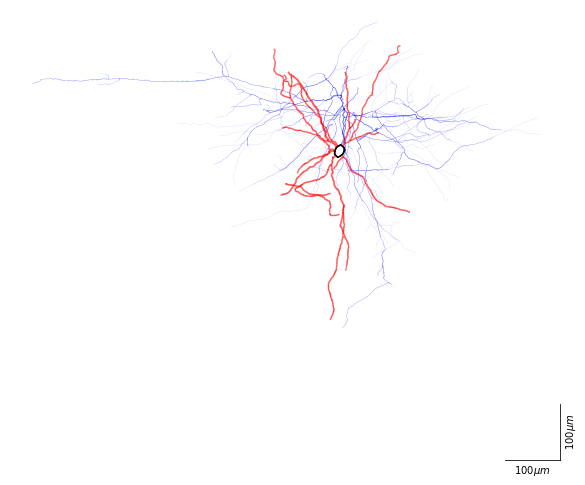

In [41]:
%matplotlib inline
plot_swc(test_swc)

Save traces

In [10]:
fig_path=Path('morpho_figs')
fig_path.mkdir(exist_ok=True)

%matplotlib auto

In [12]:
for swc in tqdm(downloaded_swc):
    to_save = fig_path/(swc.stem+'.pdf')
    if not to_save.exists():
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            try:
                plot_swc(swc)
                plt.savefig(to_save, dpi=600, transparent=True)
            except:
                continue

100%|██████████| 371/371 [21:01<00:00,  3.40s/it] 


Cluster morphology

In [4]:
morpho_cluster_df = pd.read_csv('Scala_cluster_morpho.csv')
morpho_cluster_df

,Cell,cluster
0,20180215_sample_1,1
1,20180327_sample_1,1
2,20180327_sample_4,1
3,20180327_sample_5,4
4,20180404_sample_5,5
...,...,...
121,20191105_sample_1,1
122,20191105_sample_4,3
123,20191107_sample_2,12
124,20191107_sample_4,6


In [33]:
for cl in set(morpho_cluster_df['cluster']):
    (fig_path/str(cl)).mkdir(exist_ok=True)

In [43]:
morpho_cluster_df['current_path']=morpho_cluster_df['Cell'].map(
    lambda c: fig_path/(c+'.pdf')
)
morpho_cluster_df['target_path'] = morpho_cluster_df.apply(
    lambda row: fig_path/str(row['cluster'])/(row['Cell']+'.pdf'),
    axis=1
)
morpho_cluster_df

,Cell,cluster,current_path,target_path
0,20180215_sample_1,1,morpho_figs/20180215_sample_1.pdf,morpho_figs/1/20180215_sample_1.pdf
1,20180327_sample_1,1,morpho_figs/20180327_sample_1.pdf,morpho_figs/1/20180327_sample_1.pdf
2,20180327_sample_4,1,morpho_figs/20180327_sample_4.pdf,morpho_figs/1/20180327_sample_4.pdf
3,20180327_sample_5,4,morpho_figs/20180327_sample_5.pdf,morpho_figs/4/20180327_sample_5.pdf
4,20180404_sample_5,5,morpho_figs/20180404_sample_5.pdf,morpho_figs/5/20180404_sample_5.pdf
...,...,...,...,...
121,20191105_sample_1,1,morpho_figs/20191105_sample_1.pdf,morpho_figs/1/20191105_sample_1.pdf
122,20191105_sample_4,3,morpho_figs/20191105_sample_4.pdf,morpho_figs/3/20191105_sample_4.pdf
123,20191107_sample_2,12,morpho_figs/20191107_sample_2.pdf,morpho_figs/12/20191107_sample_2.pdf
124,20191107_sample_4,6,morpho_figs/20191107_sample_4.pdf,morpho_figs/6/20191107_sample_4.pdf


In [37]:
for cur_p, tar_p in zip(morpho_cluster_df['current_path'], 
                       morpho_cluster_df['target_path']):
    cur_p.replace(tar_p)

In [39]:
other_cluster = fig_path/'other'
other_cluster.mkdir(exist_ok=True)
for p in fig_path.iterdir():
    if p.is_file():
        p.replace(other_cluster/p.name)

# Extract layer features

In [22]:
from Nature.morpho_utils import layer_features
from Cell.morpho_utils import updown_and_move_soma_to_depth, distribution_features, across_cortex_distribution_features
from neuron_morphology.feature_extractor.feature_writer import FeatureWriter
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.features.layer.reference_layer_depths import ReferenceLayerDepths
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor

In [17]:
boundary_df = pd.read_csv('m1_nissl_layer_boundaries.csv', sep='\t')
selected_ids = pd.read_csv('Scala_morpho_extrac_L5IN.csv')['cell.id']
avg_boundary = boundary_df.drop(columns='slice').mean()
percent_boundary = avg_boundary/avg_boundary.max()
selected_meta_df = meta_df[meta_df['Cell'].isin(selected_ids)]

In [18]:
for layer_name, layer_percent in percent_boundary.iteritems():
    selected_meta_df[layer_name] = layer_percent*selected_meta_df['Cortical thickness (µm)']

In [20]:
layer_dist_extractor = FeatureExtractor()
layer_dist_extractor.register_features(layer_features+distribution_features)
writer = FeatureWriter("me_layer_distribution_features.h5")
logging.getLogger().setLevel(logging.WARNING)

for _, sample in tqdm(selected_meta_df.iterrows(), total=selected_meta_df.shape[0], desc='Extracting'):
    swc = Path('swc')/(sample['Cell']+'.SWC')
    ref = {'L1': ReferenceLayerDepths(0, sample['L1'], scale=True),
           'L2/3': ReferenceLayerDepths(sample['L1'], sample['L2/3'], scale=True),
           'L5': ReferenceLayerDepths(sample['L2/3'], sample['L5'], scale=True),
           'L6': ReferenceLayerDepths(sample['L5'], sample['L6/total'], scale=True),
           'wm': ReferenceLayerDepths(sample['L6/total'], sample['L6/total'] + 1500, scale=False)}
    morpho = morphology_from_swc(swc)
    updown_and_move_soma_to_depth(morpho, sample['Soma depth (µm)'])
    data = Data(morpho, reference_layer_depths=ref)
    extract_run = layer_dist_extractor.extract(data)
    writer.add_run(swc, extract_run.serialize())
res_layer_df = writer.build_output_table()

Extracting:   0%|          | 0/154 [00:00<?, ?it/s]

In [21]:
res_layer_df.drop(columns=['axon.nodes_distribution', 'axon.length_distribution']).to_csv('me_layer_features_0728.csv')
with open('me_layer_features_0728.pkl', 'wb') as f:
    pickle.dump(res_layer_df, f)
res_length_dist_df = pd.DataFrame(np.stack(res_layer_df['axon.length_distribution'].values), index=res_layer_df.index)
res_length_dist_df.to_csv('me_axon.length_distribution_20bins_0728.csv')
res_node_dist_df = pd.DataFrame(np.stack(res_layer_df['axon.nodes_distribution'].values), index=res_layer_df.index)
res_node_dist_df.to_csv('me_axon.nodes_distribution_20bins_0728.csv')

Extract dimension info:

In [9]:
from neuron_morphology.feature_extractor.marked_feature import specialize
from neuron_morphology.feature_extractor.feature_specialization import AxonSpec
from neuron_morphology.features.dimension import dimension

dimension_feature = [specialize(dimension, {AxonSpec})]
dimension_extractor = FeatureExtractor()
dimension_extractor.register_features(dimension_feature)
writer = FeatureWriter("me_dimensions.h5")
for _, sample in tqdm(selected_meta_df.iterrows(), total=selected_meta_df.shape[0], desc='Extracting'):
    swc = Path('swc') / (sample['Cell'] + '.SWC')
    morpho=morphology_from_swc(swc)
    data = Data(morpho)
    extract_run = dimension_extractor.extract(data)
    writer.add_run(swc, extract_run.serialize())

Extracting:   0%|          | 0/126 [00:00<?, ?it/s]

2021-07-26 14:39:33,060 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x7f39756d8430>>
2021-07-26 14:39:33,063 root         INFO     selected features: ['axon.dimension']
2021-07-26 14:39:37,442 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x7f39756d80a0>>
2021-07-26 14:39:37,444 root         INFO     selected features: ['axon.dimension']
2021-07-26 14:39:41,164 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x7f397d8405e0>>
2021-07-26 14:39:41,165 root         INFO     selected features: ['axon.dimension']
2021-07-26 14:39:44,610 root         INFO     selected marks: <bound method FeatureEx

In [10]:
dimension_res_df = writer.build_output_table()

y_lims_df = pd.DataFrame({'Cell': swc,
                          'axon.dimension.height': row['axon.dimension.height'],
                          'axon.dimension.min_y': row['axon.dimension.min_xyz'][1],
                          'axon.dimension.max_y': row['axon.dimension.max_xyz'][1]
                         }
                         for swc, (_, row) in zip(selected_meta_df['Cell'], dimension_res_df.iterrows()))
y_lims_df.head()

,Cell,axon.dimension.height,axon.dimension.min_y,axon.dimension.max_y
0,20180215_sample_1,697.79,-238.28,459.51
1,20180327_sample_1,658.83,-246.67,412.16
2,20180327_sample_4,719.21,-237.56,481.65
3,20180327_sample_5,331.95,-66.89,265.06
4,20180404_sample_5,570.17,-330.30,239.87


In [11]:
y_lims_df.to_csv('me_axon_height.csv')

Extract histogram features across cortex depth:

In [23]:
cortex_dist_extractor = FeatureExtractor()
cortex_dist_extractor.register_features(across_cortex_distribution_features)
writer = FeatureWriter("me_layer_distribution_features.h5")
logging.getLogger().setLevel(logging.WARNING)
for _, sample in tqdm(selected_meta_df.iterrows(), total=selected_meta_df.shape[0],
                      desc='Extracting cortex depth histogram'):
    swc = Path('swc') / (sample['Cell'] + '.SWC')
    depth_range = (0, sample['L6/total'])
    morpho = morphology_from_swc(swc)
    updown_and_move_soma_to_depth(morpho, sample['Soma depth (µm)'])
    data = Data(morpho, cortex_depth_range=depth_range)
    extract_run = cortex_dist_extractor.extract(data)
    writer.add_run(swc, extract_run.serialize())
res_cortex_dist_df = writer.build_output_table()

Extracting cortex depth histogram:   0%|          | 0/154 [00:00<?, ?it/s]

In [24]:
res_cortex_length_dist_df = pd.DataFrame(np.stack(res_cortex_dist_df['axon.across_cortex.length_distribution'].values), index=res_cortex_dist_df.index)
res_cortex_nodes_dist_df = pd.DataFrame(np.stack(res_cortex_dist_df['axon.across_cortex.nodes_distribution'].values), index=res_cortex_dist_df.index)
res_cortex_length_dist_df.to_csv('axon.across_cortex.length_distribution-0801.csv')
res_cortex_nodes_dist_df.to_csv('axon.across_cortex.nodes_distribution-0801.csv')